In [34]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pandas as pd
import os,io,sys,glob, h5py, csv, time
import matplotlib.pyplot as plt
import json

from dlab import generalephys as ephys
from dlab import generalephys_mua as ephys_mua

from dlab import utils_pipeline as utils
#from dlab import utils_mua

from dlab.continuous_traces import gaussian_filter1d
from scipy.signal import find_peaks
from scipy.stats import pearsonr, spearmanr, zscore
from itertools import combinations 
from dlab import sorting_quality_editing as sq
from sklearn.manifold import TSNE
from scipy.cluster.vq import kmeans2
from dlab import preprocessing_pipeline as preprocessing
from dlab import depth_estimation as depth

import seaborn as sns
sns.set_style('white')
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

load sorted data from kilosort outputs 

check documentation for proper file organization

In [36]:
data_path = r'H:\Neuropixels Recordings\Sorted Data'
dfs = [preprocessing.df_from_phy_multimouse(folder) for folder in glob.glob(data_path+'/*')]
df = pd.concat(dfs,ignore_index=True)

loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCC_011\2020-02-26_10-47-30\experiment1\recording1\continuous\Neuropix-PXI-100.0
loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCC_012\2020-02-26_14-15-05\experiment1\recording1\continuous\Neuropix-PXI-100.0
loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCD_019\2020-03-04_10-49-54\experiment1\recording1\continuous\Neuropix-PXI-100.0
loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCD_020\2020-03-04_14-17-36\experiment1\recording1\continuous\Neuropix-PXI-100.0
loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCD_022\2020-03-02_14-14-04\experiment1\recording1\continuous\Neuropix-PXI-100.0
loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCD_024\2020-03-03_11-29-13\experiment1\recording1\continuous\Neuropix-PXI-100.0
loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCE_026\20

In [37]:
df = df[df.group!='noise'][df.group!='unsorted']

# Unit information

get firing rates and waveform shapes

In [38]:
df = preprocessing.get_unit_info(df)

classify units as fast spiking or regular spiking

No handles with labels found to put in legend.


KeyError: 6

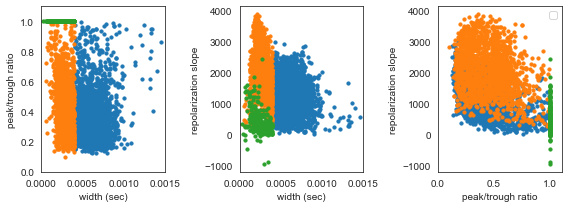

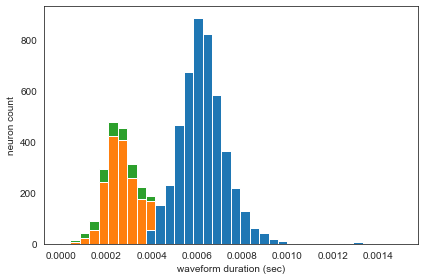

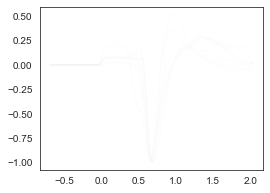

In [39]:
# plotting error, but ignore it
df = utils.classify_waveform_shape(df,plots=True,kmeans=0)

In [ ]:
# show df
df

# Depth adjustment and laminar specifity 

Computing surface channel...
surface channel from power difference threshold: channel 171.0
surface channel from power threshold: 197.5


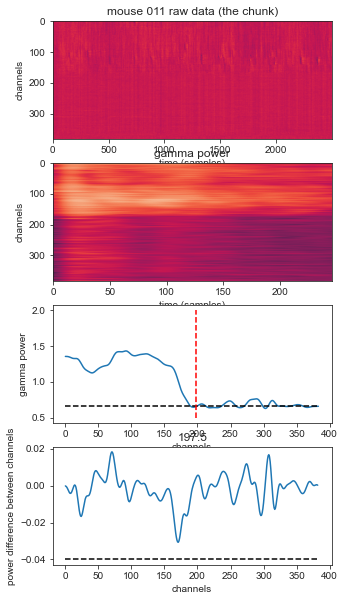

mouse: 011  surface channel: 197.5
Computing surface channel...
surface channel from power difference threshold: channel 192.0
surface channel from power threshold: 250.0


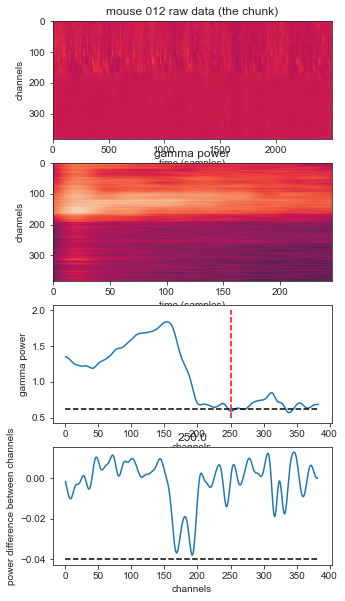

mouse: 012  surface channel: 250.0
Computing surface channel...
surface channel from power difference threshold: channel 192.0
surface channel from power threshold: 231.0


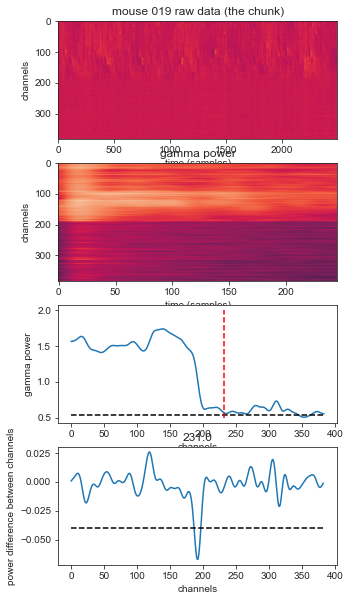

mouse: 019  surface channel: 231.0
Computing surface channel...
surface channel from power difference threshold: channel 193.0
surface channel from power threshold: 229.5


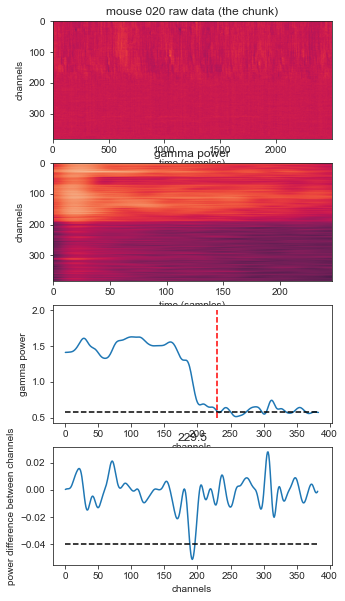

mouse: 020  surface channel: 229.5
Computing surface channel...
surface channel from power difference threshold: channel 159.0
surface channel from power threshold: 224.5


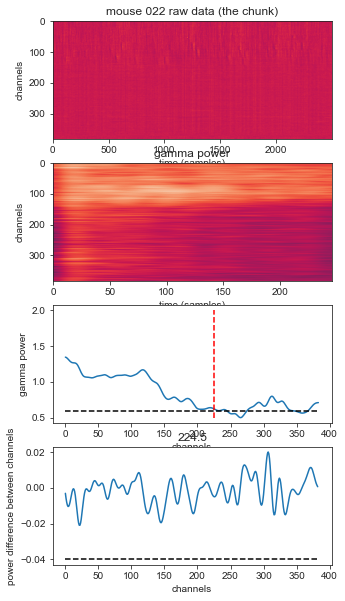

mouse: 022  surface channel: 224.5
Computing surface channel...
surface channel from power difference threshold: channel 193.0
surface channel from power threshold: 213.0


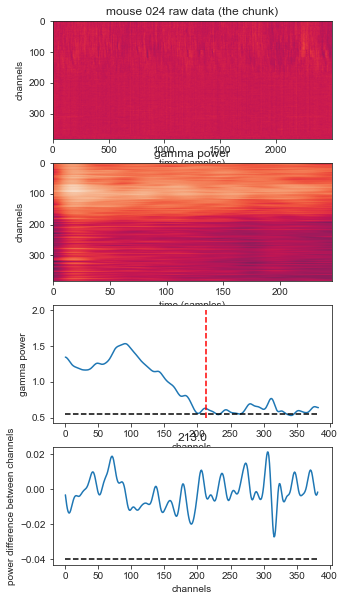

mouse: 024  surface channel: 213.0
Computing surface channel...
surface channel from power difference threshold: channel 195.0
surface channel from power threshold: 238.0


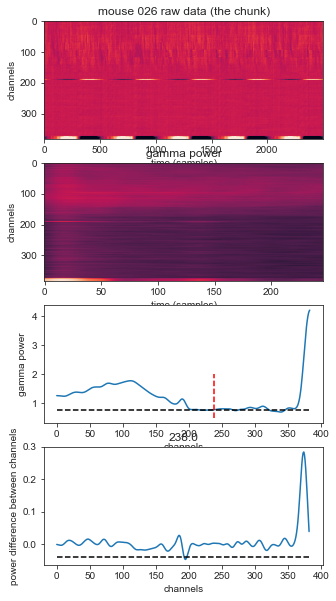

mouse: 026  surface channel: 238.0
Computing surface channel...
surface channel from power difference threshold: channel 316.0
surface channel from power threshold: 335.0


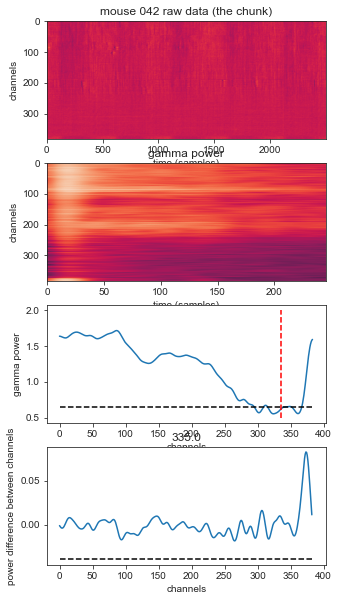

mouse: 042  surface channel: 335.0
Computing surface channel...
surface channel from power difference threshold: channel 221.0
surface channel from power threshold: 225.0


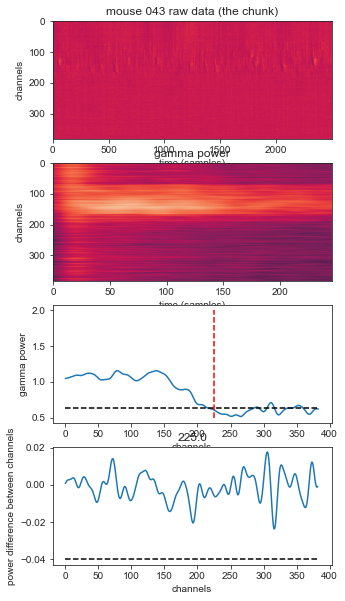

mouse: 043  surface channel: 225.0
Computing surface channel...
surface channel from power difference threshold: channel 213.5
surface channel from power threshold: 226.5


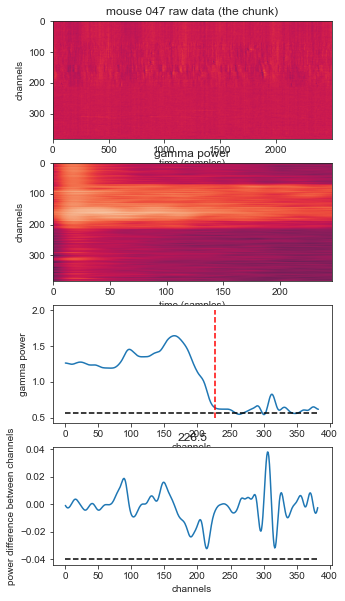

mouse: 047  surface channel: 226.5
Computing surface channel...
surface channel from power difference threshold: channel 189.5
surface channel from power threshold: 230.5


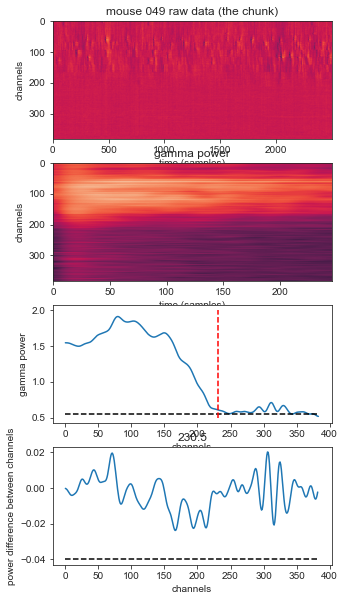

mouse: 049  surface channel: 230.5
Computing surface channel...
surface channel from power difference threshold: channel 168.5
surface channel from power threshold: 224.5


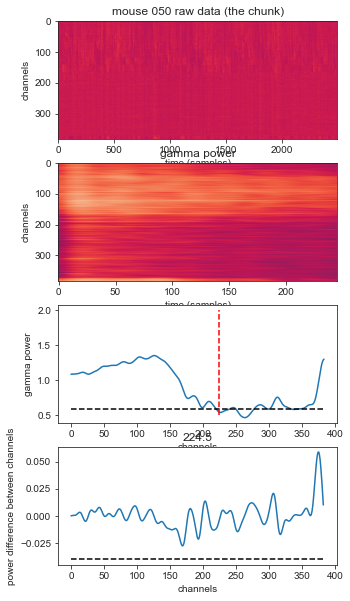

mouse: 050  surface channel: 224.5
Computing surface channel...
surface channel from power difference threshold: channel 180.0
surface channel from power threshold: 209.0


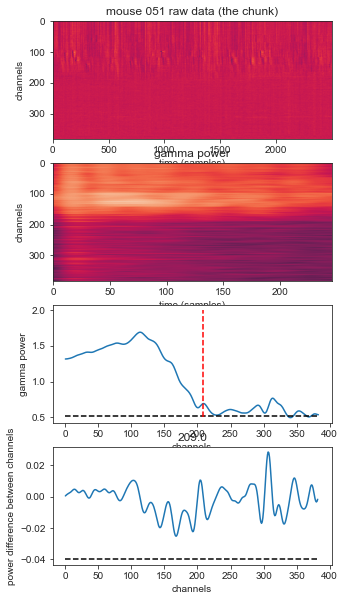

mouse: 051  surface channel: 209.0
Computing surface channel...
surface channel from power difference threshold: channel 193.0
surface channel from power threshold: 235.5


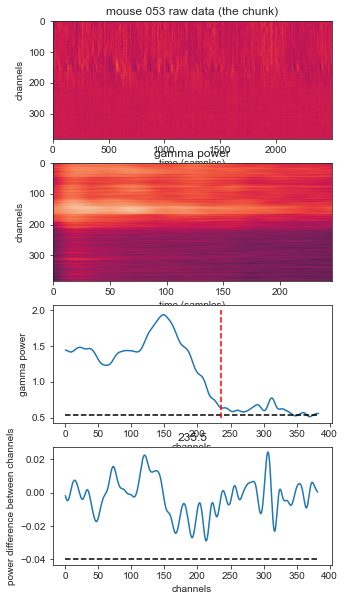

mouse: 053  surface channel: 235.5
Computing surface channel...
surface channel from power difference threshold: channel 214.5
surface channel from power threshold: 248.5


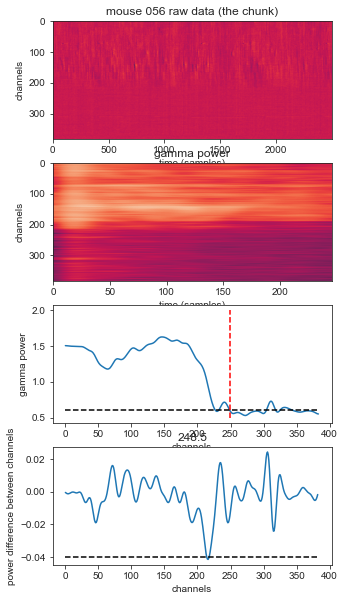

mouse: 056  surface channel: 248.5
Computing surface channel...
surface channel from power difference threshold: channel 188.5
surface channel from power threshold: 229.0


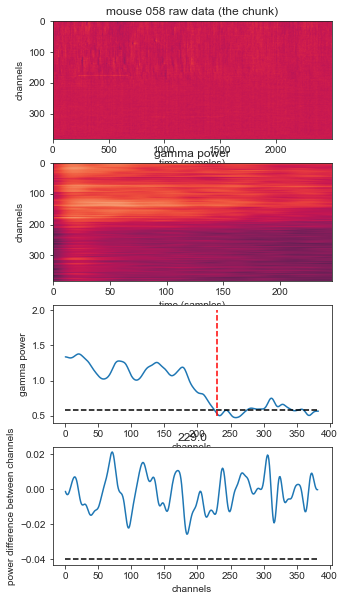

mouse: 058  surface channel: 229.0
Computing surface channel...
surface channel from power difference threshold: channel 192.0
surface channel from power threshold: 223.0


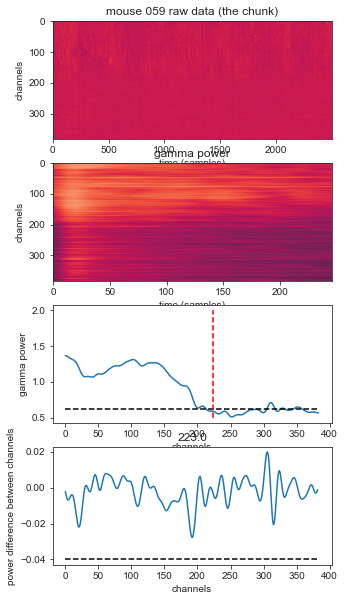

mouse: 059  surface channel: 223.0
Computing surface channel...
surface channel from power difference threshold: channel 193.0
surface channel from power threshold: 330.0


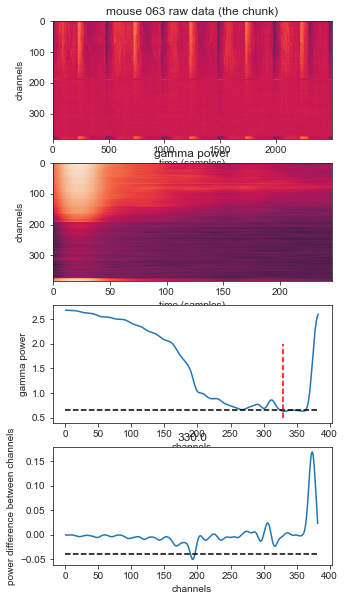

mouse: 063  surface channel: 330.0
Computing surface channel...
surface channel from power difference threshold: channel 192.0
surface channel from power threshold: 300.0


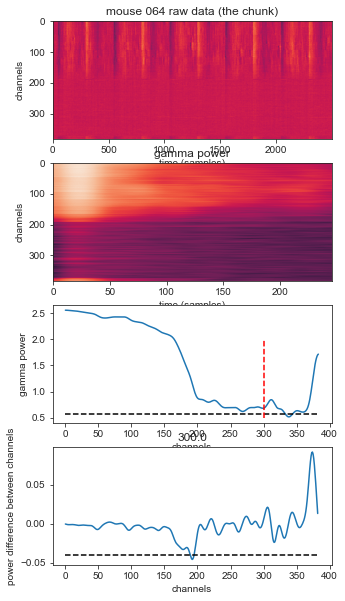

mouse: 064  surface channel: 300.0
Computing surface channel...
surface channel from power difference threshold: channel 193.0
surface channel from power threshold: 252.5


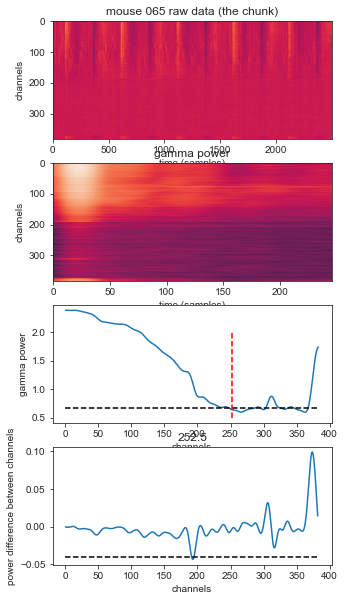

mouse: 065  surface channel: 252.5
Computing surface channel...
surface channel from power difference threshold: channel 192.0
surface channel from power threshold: 256.0


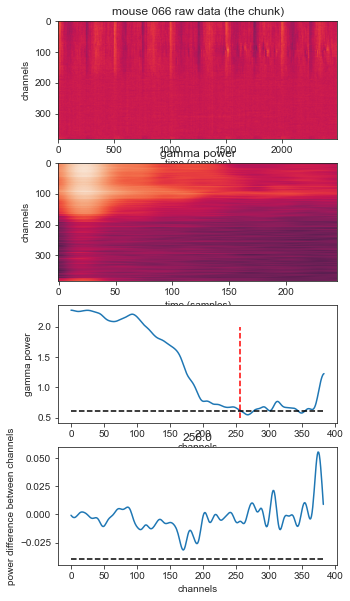

mouse: 066  surface channel: 256.0
Computing surface channel...
surface channel from power difference threshold: channel 192.0
surface channel from power threshold: 266.5


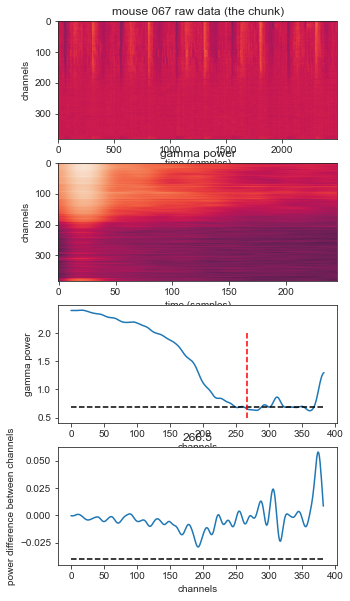

mouse: 067  surface channel: 266.5
Computing surface channel...
surface channel from power difference threshold: channel 190.5
surface channel from power threshold: 258.0


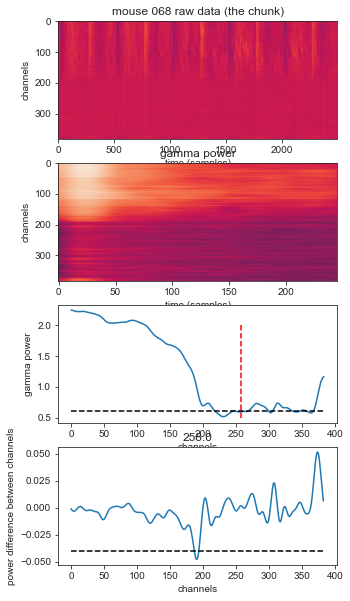

mouse: 068  surface channel: 258.0
Computing surface channel...
surface channel from power difference threshold: channel 192.5
surface channel from power threshold: 346.0


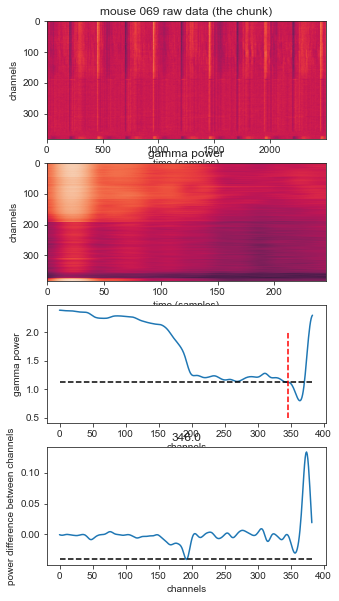

mouse: 069  surface channel: 346.0
Computing surface channel...
surface channel from power difference threshold: channel 214.0
surface channel from power threshold: 325.0


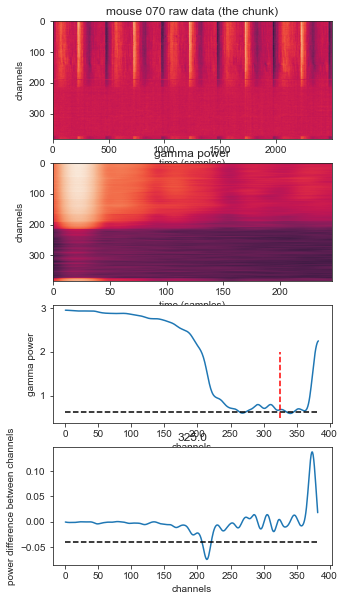

mouse: 070  surface channel: 325.0
Computing surface channel...
surface channel from power difference threshold: channel 192.0
surface channel from power threshold: 329.5


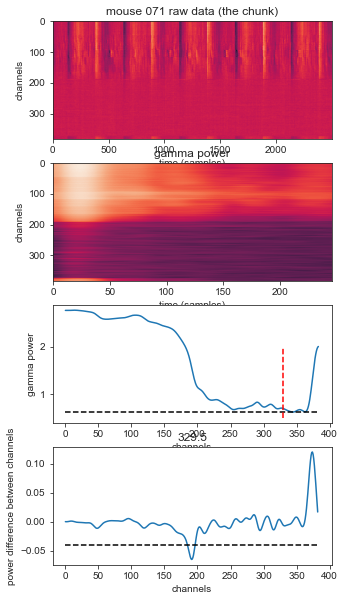

mouse: 071  surface channel: 329.5


In [133]:
data_path = r'H:\Neuropixels Recordings\Sorted Data'
list_depth = [preprocessing.depth_estimation_multimouse(folder,mouseid,power_cutoff=1.2) for folder in glob.glob(data_path+'/*')]
df_surfchan = pd.DataFrame(list_depth,columns=['mouse','surf_chan'])
mouse = []
for i in df_surfchan.mouse:
    mouse.append(int(i))
df_surfchan['mouse'] = mouse

In [113]:
# if necessary: edit surface channels for individual mouse if you disagree with plots
df_surfchan['surf_chan'][df_surfchan.mouse== 71] = 200

In [128]:
# save it
df_surfchan.to_json(r'C:\Users\16623\Desktop\kim_analysis\kimcode_02.2020\PIPELINE\df_surfchan_092321.json')

subtract y-position of surface channel from unit y-positions to get proper depth 

In [32]:
# load any channel_positions.npy file
positions_path = r'H:\Neuropixels Recordings\Additional Sorted Data\open-ephys-neuropix_NPCE_028\2020-08-06_11-26-35\experiment1\recording1\continuous\Neuropix-PXI-100.0\channel_positions.npy'
positions = np.load(positions_path)

In [100]:
# this function will assign the surface channel as 0 um 
# for cortex only!!
layer_thresh = -600 
dfs = [preprocessing.adjust_depth(df[df.mouse==mouseid],df_surfchan.surf_chan[i],layer_thresh,positions,mouseid) for i,mouseid in enumerate(df_surfchan.mouse.unique())]
df = pd.concat(dfs,ignore_index=True)

mouse 11 surface channel: 175
y-position of surface channel: 2100.0
mouse 12 surface channel: 200
y-position of surface channel: 1840.0
mouse 19 surface channel: 200
y-position of surface channel: 1840.0
mouse 20 surface channel: 200
y-position of surface channel: 1840.0
mouse 22 surface channel: 190
y-position of surface channel: 1960.0
mouse 24 surface channel: 165
y-position of surface channel: 2200.0
mouse 26 surface channel: 170
y-position of surface channel: 2160.0
mouse 42 surface channel: 350
y-position of surface channel: 340.0
mouse 43 surface channel: 200
y-position of surface channel: 1840.0
mouse 47 surface channel: 210
y-position of surface channel: 1740.0
mouse 49 surface channel: 190
y-position of surface channel: 1960.0
mouse 50 surface channel: 172
y-position of surface channel: 2140.0
mouse 51 surface channel: 190
y-position of surface channel: 1960.0
mouse 53 surface channel: 180
y-position of surface channel: 2060.0
mouse 56 surface channel: 200
y-position of surfa

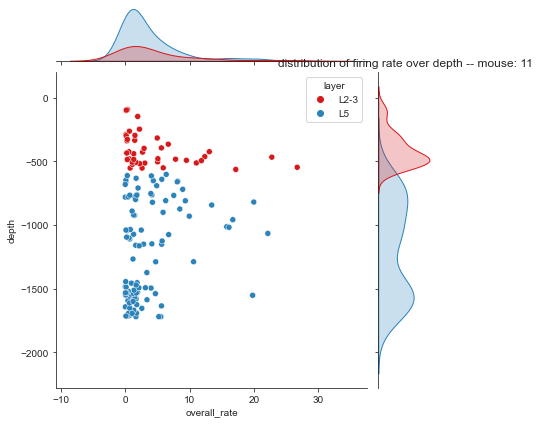

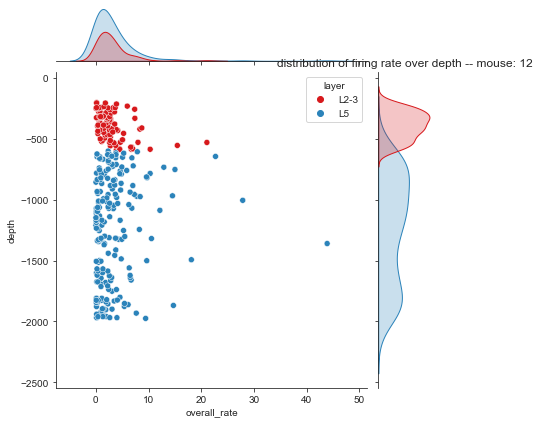

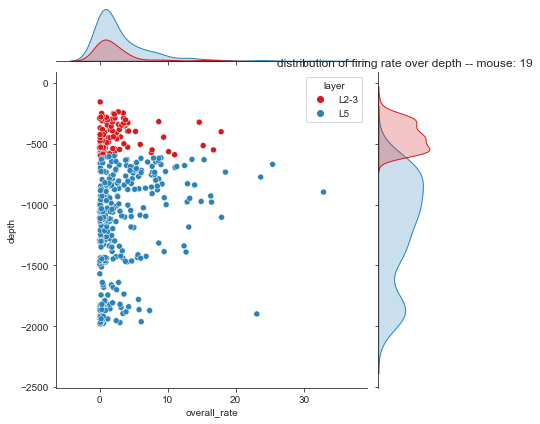

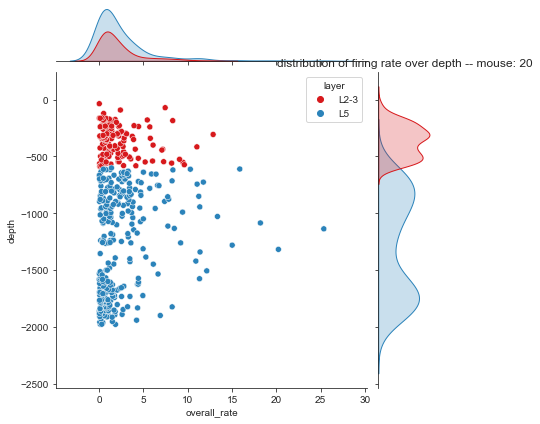

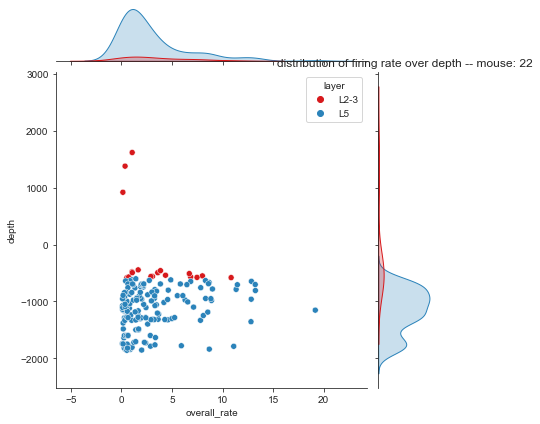

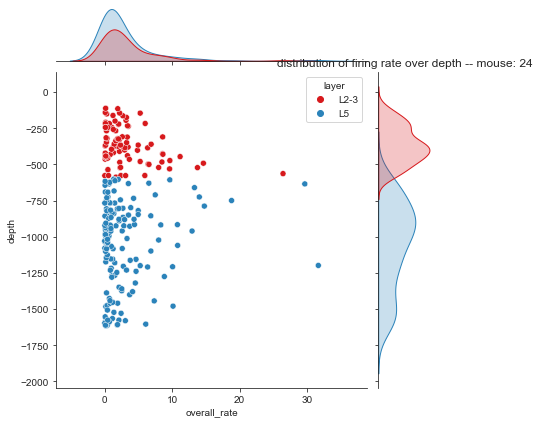

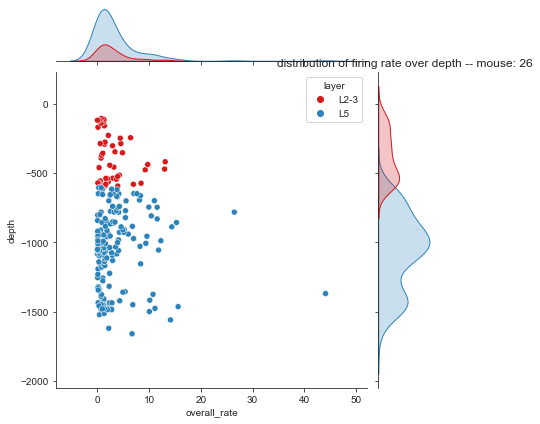

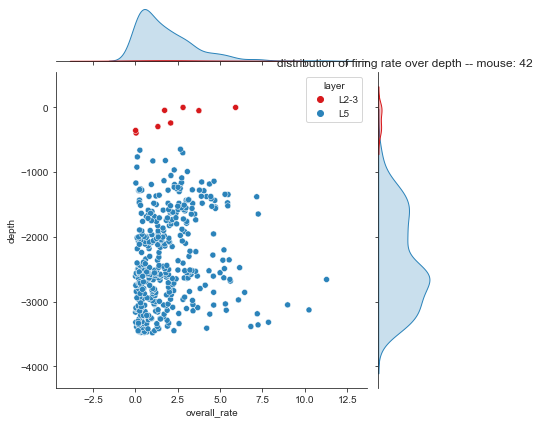

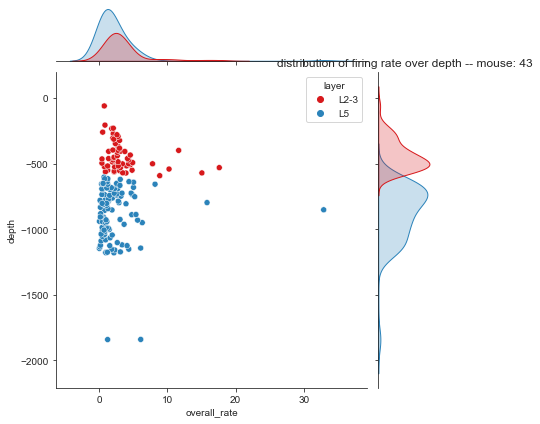

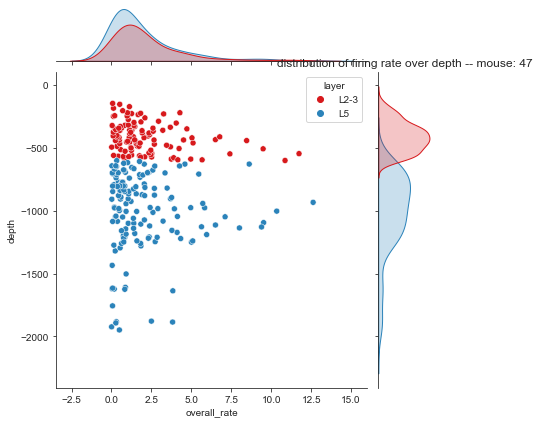

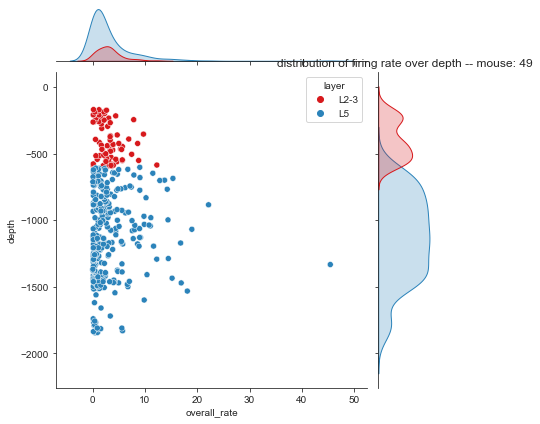

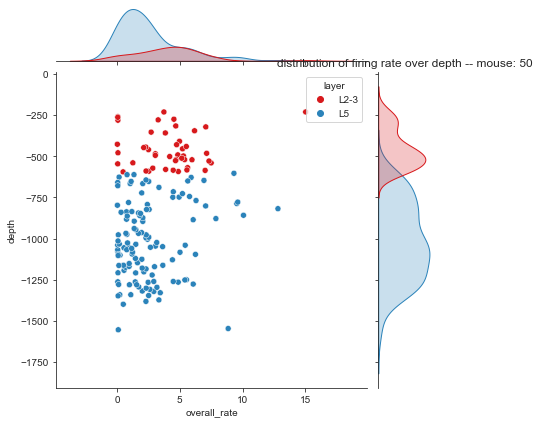

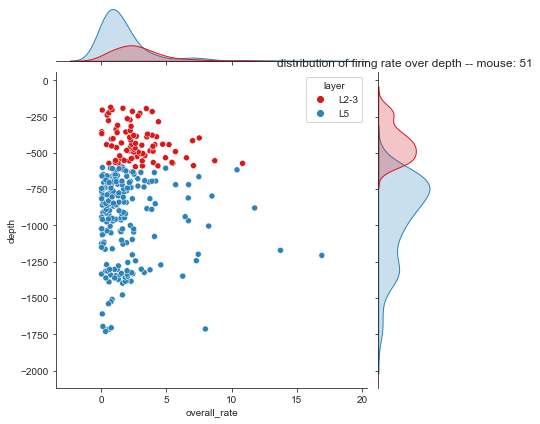

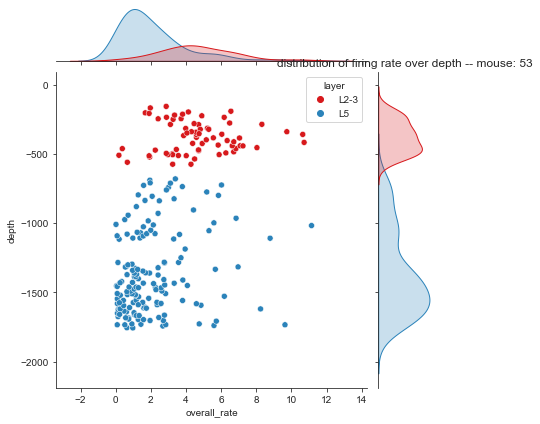

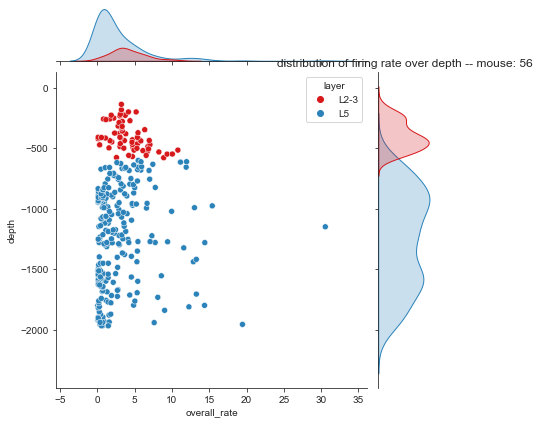

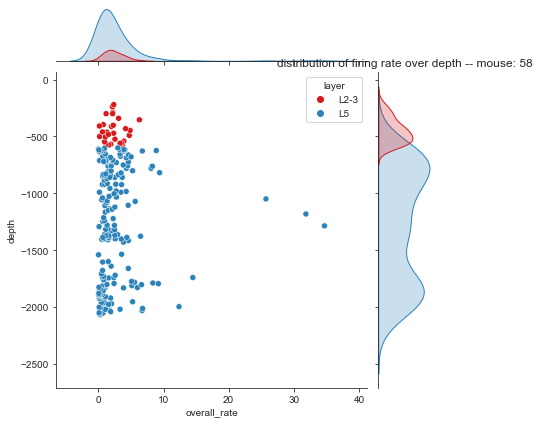

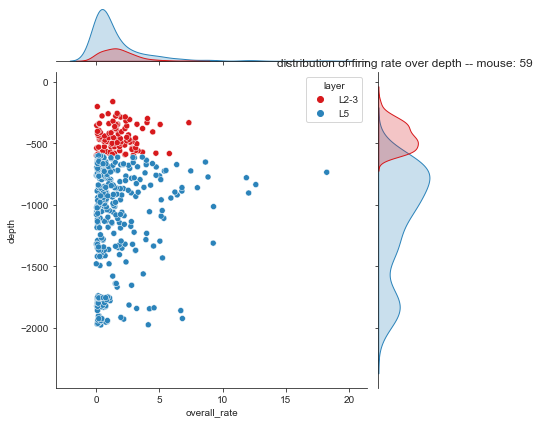

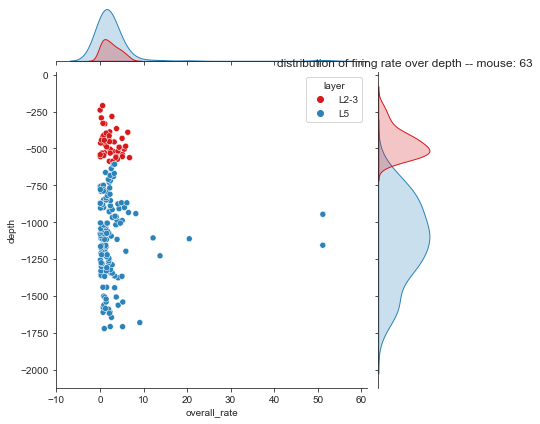

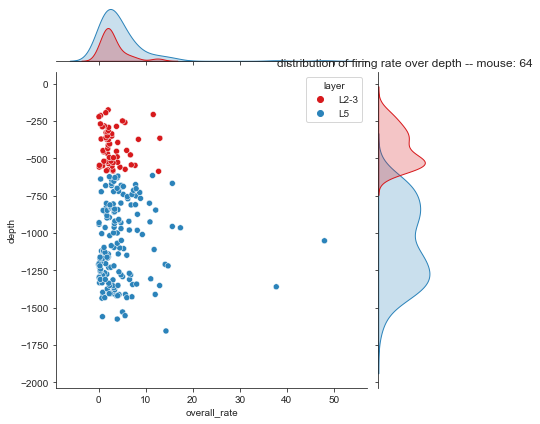

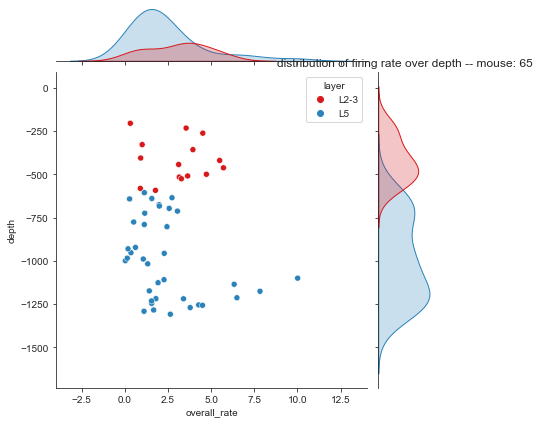

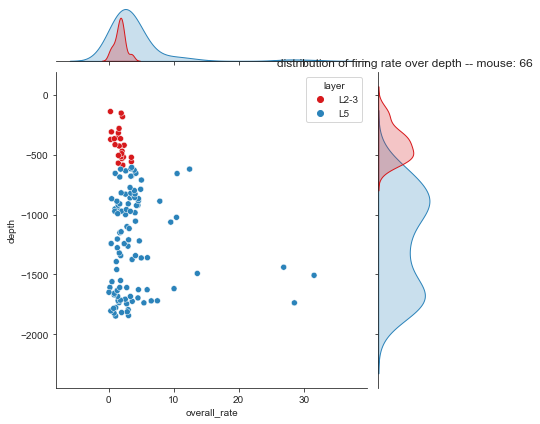

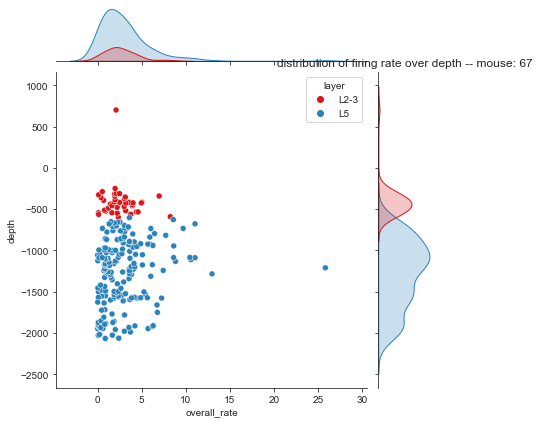

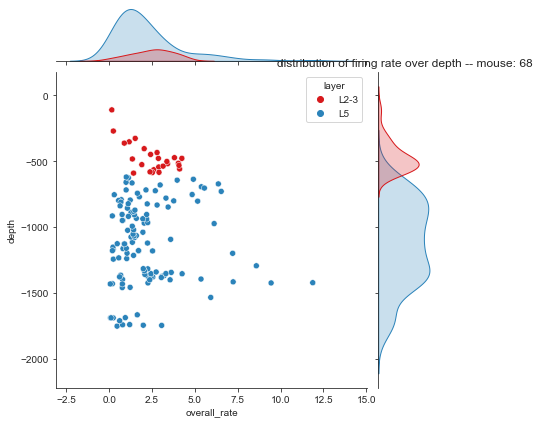

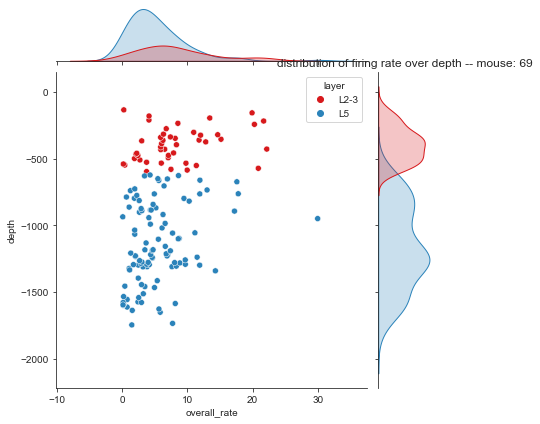

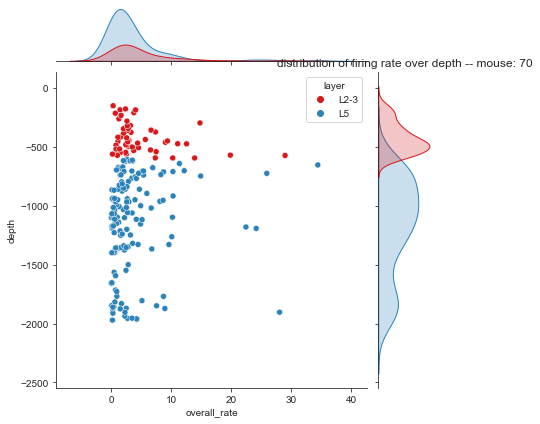

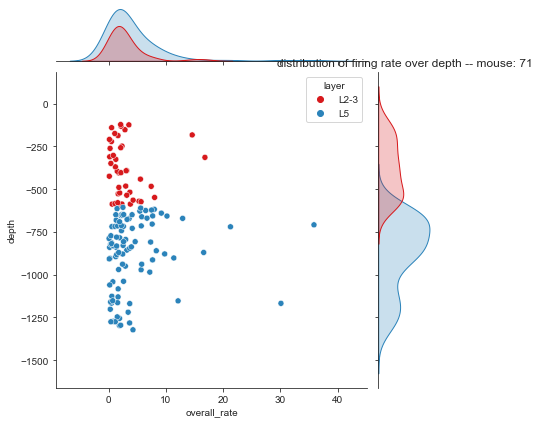

In [102]:
# plot depth distribution

for mouseid in df.mouse.unique():
    df_ = df[df.mouse==mouseid]
    df_ = df_[df_.waveform_class!='up'][df_.waveform_class!='axon']
    
    ylim = np.max(df_.depth)+100
    
    g = sns.jointplot(x = df_.overall_rate,
                        y = df_.depth,
                        hue = df_.layer, 
                        palette={'L2-3': '#d7191c','L5': '#2b83ba'})  
    plt.title('distribution of firing rate over depth -- mouse: ' + str(mouseid))
    plt.show()
    plt.close()
    
#    g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
#g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
#g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

#kind = "reg"
    

In [25]:
df[df.depth>0][df.group=='good']

Empty DataFrame
Columns: [group, times, template, waveform_weights, xpos, ypos, mouse, experiment, probe, cell, cohort, waveform, overall_rate, waveform_duration, waveform_PTratio, waveform_repolarizationslope, waveform_class, depth, layer]
Index: []

# Sorting Quality - time intensive

running signal to noise computation on multiple mice with hour-long recordings will take several hours 


if you don't care about signal to noise, comment out lines 441 and 442 in preprocessing_pipeline.npy

In [21]:
data_path = r'H:\Neuropixels Recordings\Sorted Data'
dfs_sq = [preprocessing.sorting_quality_multimouse(folder) for folder in glob.glob(data_path+'/*')]
df_sq = pd.concat(dfs_sq,ignore_index=True)

loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCB_018\2020-02-14_13-13-13\experiment1\recording1\continuous\Neuropix-PXI-100.0
all
building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 602
cluster 0: # spikes:965  iso. distance:3.2579520764345493  contamination:0.8341968911917098  1/602
cluster 1: # spikes:3367  iso. distance:2.8369012988142717  contamination:0.9367389367389367  2/602
cluster 2: # spikes:1  iso. distance:0.0  contamination:nan  3/602
cluster 3: # spikes:1021  iso. distance:4.749487737584666  contamination:0.138099902056807  4/602
cluster 4: # spikes:319  iso. distance:5.846049380976789  contamination:0.15047021943573669  5/602
cluster 6: # spikes:1927  iso. distance:6.921085483800883  contamination:0.07887908666320709  6/602
cluster 8: # spikes:2029  iso. distance:3.3662322002734677  contamination:0.8220798422868408  7/602
cluster 9: # spikes:453  iso. distance:8.76870175855268  contamination:0.0

cluster 97: # spikes:9028  iso. distance:6.958785027801324  contamination:0.03788214443952154  81/602
cluster 99: # spikes:43656  iso. distance:13.05461424513506  contamination:0.00721550302363938  82/602
cluster 104: # spikes:1106  iso. distance:2.4996279797651337  contamination:0.9792043399638336  83/602
cluster 105: # spikes:21991  iso. distance:2.2779291231470444  contamination:0.9857669046428085  84/602
cluster 106: # spikes:347  iso. distance:4.775704642424754  contamination:0.33429394812680113  85/602
cluster 108: # spikes:8  iso. distance:0.0  contamination:nan  86/602
cluster 109: # spikes:36  iso. distance:3.1859822278652583  contamination:0.9444444444444444  87/602
cluster 110: # spikes:14432  iso. distance:10.789952197293552  contamination:0.00796840354767181  88/602
cluster 113: # spikes:3382  iso. distance:4.536072345925483  contamination:0.320816085156712  89/602
cluster 114: # spikes:591  iso. distance:6.755465176091805  contamination:0.07783417935702197  90/602
cluster

cluster 202: # spikes:175  iso. distance:2.59230148245125  contamination:0.8628571428571429  162/602
cluster 203: # spikes:3171  iso. distance:1.5663216386041172  contamination:0.9996846420687481  163/602
cluster 204: # spikes:3020  iso. distance:21.75955595578998  contamination:0.0  164/602
cluster 205: # spikes:2136  iso. distance:1.8249439854937495  contamination:0.9985955056179775  165/602
cluster 206: # spikes:4679  iso. distance:4.348942583109172  contamination:0.30733062620218  166/602
cluster 207: # spikes:40670  iso. distance:9.368181289234853  contamination:0.0053110400786821055  167/602
cluster 208: # spikes:4882  iso. distance:2.726727869828569  contamination:0.943260958623515  168/602
cluster 209: # spikes:14565  iso. distance:4.996469343222827  contamination:0.32097493992447645  169/602
cluster 212: # spikes:14222  iso. distance:7.683661163412937  contamination:0.047883560680635595  170/602
cluster 213: # spikes:1803  iso. distance:5.6587663925243055  contamination:0.2457

cluster 320: # spikes:8536  iso. distance:3.5212576407669736  contamination:0.6569821930646673  242/602
cluster 321: # spikes:6452  iso. distance:10.205886739266829  contamination:0.011314321140731609  243/602
cluster 323: # spikes:8893  iso. distance:8.219123487470952  contamination:0.021814910603845772  244/602
cluster 324: # spikes:24945  iso. distance:3.046975596481875  contamination:0.8950891962317098  245/602
cluster 325: # spikes:33205  iso. distance:4.4808885329235055  contamination:0.4023189278723084  246/602
cluster 326: # spikes:4063  iso. distance:12.834535795849574  contamination:0.007875953728771812  247/602
cluster 327: # spikes:660  iso. distance:13.583798291409504  contamination:0.0  248/602
cluster 328: # spikes:2964  iso. distance:3.691835055514264  contamination:0.5101214574898785  249/602
cluster 329: # spikes:1749  iso. distance:13.546067457504519  contamination:0.0005717552887364308  250/602
cluster 330: # spikes:5338  iso. distance:4.261865349729766  contaminati

cluster 411: # spikes:362  iso. distance:7.719619429197757  contamination:0.04972375690607733  322/602
cluster 413: # spikes:15689  iso. distance:11.768456672623685  contamination:0.007266237491235894  323/602
cluster 414: # spikes:1696  iso. distance:3.2235655781515864  contamination:0.7606132075471699  324/602
cluster 415: # spikes:3243  iso. distance:5.179954339919215  contamination:0.24699352451433854  325/602
cluster 416: # spikes:1167  iso. distance:3.250094004199139  contamination:0.803770351328192  326/602
cluster 418: # spikes:704  iso. distance:4.851747087291879  contamination:0.31534090909090906  327/602
cluster 419: # spikes:7046  iso. distance:3.8133150271040113  contamination:0.6569684927618507  328/602
cluster 420: # spikes:16366  iso. distance:3.850873992798494  contamination:0.6246486618599536  329/602
cluster 421: # spikes:6364  iso. distance:6.995086906676242  contamination:0.0796668761785041  330/602
cluster 422: # spikes:1689  iso. distance:13.110674005692587  cont

cluster 495: # spikes:235  iso. distance:3.4399132415457134  contamination:0.7531914893617021  402/602
cluster 496: # spikes:6960  iso. distance:3.3360245006055522  contamination:0.7650862068965517  403/602
cluster 497: # spikes:10287  iso. distance:1.772634351947061  contamination:0.9999027899290367  404/602
cluster 498: # spikes:3428  iso. distance:3.5274310432321947  contamination:0.7004084014002334  405/602
cluster 499: # spikes:256  iso. distance:2.8258126733069964  contamination:0.96875  406/602
cluster 500: # spikes:1316  iso. distance:4.0653932829852595  contamination:0.4521276595744681  407/602
cluster 501: # spikes:8999  iso. distance:1.8022925639105096  contamination:0.9996666296255139  408/602
cluster 502: # spikes:11811  iso. distance:2.16986975100047  contamination:0.9950893235119803  409/602
cluster 503: # spikes:11642  iso. distance:2.6208203606999625  contamination:0.9780965469850541  410/602
cluster 504: # spikes:4337  iso. distance:9.47207235392009  contamination:0.0

cluster 585: # spikes:407  iso. distance:5.682076595772566  contamination:0.1253071253071253  483/602
cluster 586: # spikes:6439  iso. distance:2.563033820851399  contamination:0.9580680229849355  484/602
cluster 587: # spikes:1349  iso. distance:2.6355909684802206  contamination:0.9510748702742773  485/602
cluster 588: # spikes:831  iso. distance:12.699077500682753  contamination:0.03128760529482555  486/602
cluster 589: # spikes:321  iso. distance:3.8037023889053616  contamination:0.6822429906542056  487/602
cluster 590: # spikes:437  iso. distance:3.581610587372653  contamination:0.7139588100686498  488/602
cluster 591: # spikes:424  iso. distance:6.205536943143291  contamination:0.09433962264150941  489/602
cluster 592: # spikes:9321  iso. distance:3.3669870992107023  contamination:0.7348996888745842  490/602
cluster 593: # spikes:317  iso. distance:2.248063976394823  contamination:0.9905362776025236  491/602
cluster 594: # spikes:393  iso. distance:3.9835234657905825  contaminatio

cluster 701: # spikes:585  iso. distance:3.514312546103358  contamination:0.717948717948718  563/602
cluster 702: # spikes:2271  iso. distance:4.8706800926113525  contamination:0.265962131219727  564/602
cluster 703: # spikes:136  iso. distance:3.644672143726695  contamination:0.6397058823529411  565/602
cluster 706: # spikes:3336  iso. distance:6.527774329863519  contamination:0.19724220623501199  566/602
cluster 708: # spikes:1637  iso. distance:3.8631664976191074  contamination:0.6157605375687233  567/602
cluster 709: # spikes:6225  iso. distance:2.7574839261875717  contamination:0.954859437751004  568/602
cluster 710: # spikes:7646  iso. distance:6.292032652526888  contamination:0.12411718545644779  569/602
cluster 711: # spikes:1860  iso. distance:8.171930959509597  contamination:0.023655913978494647  570/602
cluster 712: # spikes:4809  iso. distance:3.8141177060089384  contamination:0.5747556664587232  571/602
cluster 713: # spikes:5839  iso. distance:10.408132370101725  contamin

cluster 88: 30 violations (3130 spikes), 1.0 estimated FP rate
cluster 89: 0 violations (578 spikes), 0.0 estimated FP rate
cluster 90: 0 violations (537 spikes), 0.0 estimated FP rate
cluster 91: 18 violations (21818 spikes), 0.04099299221021787 estimated FP rate
cluster 92: 16 violations (51144 spikes), 0.006635497950011646 estimated FP rate
cluster 93: 2 violations (852 spikes), 1.0 estimated FP rate
cluster 94: 6 violations (5751 spikes), 0.1963997622583773 estimated FP rate
cluster 95: 1 violations (290 spikes), 1.0 estimated FP rate
cluster 96: 0 violations (1650 spikes), 0.0 estimated FP rate
cluster 97: 891 violations (9027 spikes), 1.0 estimated FP rate
cluster 99: 2290 violations (43655 spikes), 1.0 estimated FP rate
cluster 104: 3 violations (1105 spikes), 1.0 estimated FP rate
cluster 105: 947 violations (21990 spikes), 1.0 estimated FP rate
cluster 106: 2 violations (346 spikes), 1.0 estimated FP rate
cluster 108: 0 violations (7 spikes), 0.0 estimated FP rate
cluster 109:

cluster 261: 27 violations (22227 spikes), 0.05929303563885472 estimated FP rate
cluster 262: 72 violations (19575 spikes), 0.19145876386625757 estimated FP rate
cluster 263: 78 violations (64272 spikes), 0.020486106705280872 estimated FP rate
cluster 264: 2 violations (2137 spikes), 0.4734262378208021 estimated FP rate
cluster 266: 9 violations (819 spikes), 1.0 estimated FP rate
cluster 267: 14 violations (7341 spikes), 0.2809015137833687 estimated FP rate
cluster 268: 256 violations (4318 spikes), 1.0 estimated FP rate
cluster 270: 2698 violations (21047 spikes), 1.0 estimated FP rate
cluster 273: 0 violations (85 spikes), 0.0 estimated FP rate
cluster 275: 31 violations (19763 spikes), 0.08588298586133146 estimated FP rate
cluster 276: 0 violations (934 spikes), 0.0 estimated FP rate
cluster 278: 1 violations (1473 spikes), 0.4922958120576348 estimated FP rate
cluster 280: 0 violations (59 spikes), 0.0 estimated FP rate
cluster 283: 6 violations (3804 spikes), 0.4487067038478138 es

cluster 398: 2 violations (5393 spikes), 0.07451561409252681 estimated FP rate
cluster 399: 16 violations (3081 spikes), 1.0 estimated FP rate
cluster 400: 0 violations (4642 spikes), 0.0 estimated FP rate
cluster 401: 8 violations (8488 spikes), 0.12002009280175893 estimated FP rate
cluster 404: 1 violations (325 spikes), 1.0 estimated FP rate
cluster 406: 0 violations (356 spikes), 0.0 estimated FP rate
cluster 410: 26 violations (5406 spikes), 0.9353364005570849 estimated FP rate
cluster 411: 0 violations (361 spikes), 0.0 estimated FP rate
cluster 413: 12 violations (15688 spikes), 0.05113080093698617 estimated FP rate
cluster 414: 4 violations (1695 spikes), 1.0 estimated FP rate
cluster 415: 3 violations (3242 spikes), 0.28630216545309395 estimated FP rate
cluster 416: 1 violations (1166 spikes), 0.7955016768546332 estimated FP rate
cluster 418: 5 violations (703 spikes), 1.0 estimated FP rate
cluster 419: 22 violations (7045 spikes), 0.4798878394432716 estimated FP rate
cluster 

cluster 552: 165 violations (275 spikes), 1.0 estimated FP rate
cluster 553: 320 violations (10011 spikes), 1.0 estimated FP rate
cluster 554: 641 violations (15918 spikes), 1.0 estimated FP rate
cluster 555: 333 violations (413 spikes), 1.0 estimated FP rate
cluster 556: 512 violations (913 spikes), 1.0 estimated FP rate
cluster 557: 190 violations (310 spikes), 1.0 estimated FP rate
cluster 558: 134 violations (248 spikes), 1.0 estimated FP rate
cluster 559: 206 violations (344 spikes), 1.0 estimated FP rate
cluster 560: 3 violations (557 spikes), 1.0 estimated FP rate
cluster 561: 2 violations (2419 spikes), 0.37065753907376164 estimated FP rate
cluster 562: 0 violations (377 spikes), 0.0 estimated FP rate
cluster 563: 16 violations (413 spikes), 1.0 estimated FP rate
cluster 564: 3 violations (1981 spikes), 0.8264051990459933 estimated FP rate
cluster 565: 1 violations (427 spikes), 1.0 estimated FP rate
cluster 566: 10 violations (24190 spikes), 0.01853827570303225 estimated FP ra

cluster 765: 5 violations (4826 spikes), 0.21174955400080084 estimated FP rate
cluster 766: 4 violations (2152 spikes), 0.9363513514032268 estimated FP rate
cluster 767: 0 violations (2759 spikes), 0.0 estimated FP rate
cluster 768: 0 violations (3339 spikes), 0.0 estimated FP rate
cluster 769: 3 violations (2185 spikes), 0.6252355862295277 estimated FP rate
ISI quality took 7.889956474304199 sec
[]
[  0   1   2   3   4   6   8   9  11  13  15  17  18  19  21  22  23  24
  25  28  29  30  33  34  35  37  38  39  40  41  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  61  62  63  64  65  67  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  99 104 105 106 108 109 110 113 114
 118 120 121 122 123 124 126 127 128 131 132 134 135 136 137 138 139 140
 141 142 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 161
 162 163 164 165 166 167 168 170 171 172 174 176 177 178 179 180 181 182
 183 184 185 

cluster 57: # spikes:2020  iso. distance:6.367941901922664  contamination:0.06782178217821777  52/246
cluster 58: # spikes:2631  iso. distance:9.338335629699472  contamination:0.028126187761307486  53/246
cluster 59: # spikes:120  iso. distance:8.115606827392352  contamination:0.050000000000000044  54/246
cluster 60: # spikes:288  iso. distance:6.263421304512446  contamination:0.13888888888888884  55/246
cluster 61: # spikes:1481  iso. distance:3.40096478773633  contamination:0.8183659689399054  56/246
cluster 62: # spikes:4872  iso. distance:5.513134570066032  contamination:0.16892446633825942  57/246
cluster 63: # spikes:28268  iso. distance:4.506207202289595  contamination:0.340597141644262  58/246
cluster 64: # spikes:11510  iso. distance:3.4845652017557267  contamination:0.7814943527367506  59/246
cluster 65: # spikes:209  iso. distance:3.4287485624929332  contamination:0.6363636363636364  60/246
cluster 66: # spikes:7889  iso. distance:3.5198602715269414  contamination:0.77310178

cluster 146: # spikes:323  iso. distance:9.468117837619777  contamination:0.018575851393188847  132/246
cluster 147: # spikes:8044  iso. distance:2.98945290344116  contamination:0.9394579811039284  133/246
cluster 149: # spikes:22055  iso. distance:5.589522922110391  contamination:0.1454545454545455  134/246
cluster 150: # spikes:25832  iso. distance:2.5217291415372562  contamination:0.9898188293589346  135/246
cluster 151: # spikes:6368  iso. distance:6.215050036446473  contamination:0.09798994974874375  136/246
cluster 152: # spikes:25460  iso. distance:5.620024151460131  contamination:0.1349960722702278  137/246
cluster 153: # spikes:7810  iso. distance:5.54961895364389  contamination:0.19398207426376446  138/246
cluster 154: # spikes:3921  iso. distance:4.281492603694914  contamination:0.5070135169599592  139/246
cluster 155: # spikes:6998  iso. distance:3.4494486159547266  contamination:0.7886539011146042  140/246
cluster 156: # spikes:32593  iso. distance:7.6513221692943985  cont

cluster 231: # spikes:5521  iso. distance:6.25735718866596  contamination:0.18058322767614565  212/246
cluster 232: # spikes:741  iso. distance:4.495177622731779  contamination:0.3616734143049932  213/246
cluster 233: # spikes:3763  iso. distance:3.9590488092544827  contamination:0.5777305341482859  214/246
cluster 234: # spikes:4015  iso. distance:4.263622893173211  contamination:0.4313823163138232  215/246
cluster 235: # spikes:749  iso. distance:5.276140072573624  contamination:0.28037383177570097  216/246
cluster 236: # spikes:1115  iso. distance:2.207849421902742  contamination:0.9973094170403587  217/246
cluster 237: # spikes:8248  iso. distance:5.9812440645406415  contamination:0.09190106692531519  218/246
cluster 238: # spikes:644  iso. distance:2.8998746421719086  contamination:0.9549689440993789  219/246
cluster 243: # spikes:11323  iso. distance:1.714898383258439  contamination:0.9998233683652742  220/246
cluster 244: # spikes:9094  iso. distance:3.721308254867709  contamina

cluster 83: 127 violations (1432 spikes), 1.0 estimated FP rate
cluster 84: 1 violations (2191 spikes), 0.2477670605646948 estimated FP rate
cluster 85: 292 violations (4100 spikes), 1.0 estimated FP rate
cluster 86: 3 violations (6192 spikes), 0.09311618364503559 estimated FP rate
cluster 87: 31 violations (2975 spikes), 1.0 estimated FP rate
cluster 88: 16 violations (30355 spikes), 0.020878353347283996 estimated FP rate
cluster 89: 2 violations (62910 spikes), 0.0006090913934338702 estimated FP rate
cluster 90: 9 violations (44961 spikes), 0.005325999633515158 estimated FP rate
cluster 91: 15 violations (18940 spikes), 0.04976600182796262 estimated FP rate
cluster 92: 204 violations (132109 spikes), 0.014095590126386028 estimated FP rate
cluster 93: 15 violations (41336 spikes), 0.010586542671813241 estimated FP rate
cluster 94: 2 violations (2388 spikes), 0.41674817414823984 estimated FP rate
cluster 95: 13 violations (12454 spikes), 0.10027707065224337 estimated FP rate
cluster 96

cluster 220: 37 violations (137 spikes), 1.0 estimated FP rate
cluster 221: 80 violations (196 spikes), 1.0 estimated FP rate
cluster 222: 2 violations (499 spikes), 1.0 estimated FP rate
cluster 223: 1 violations (1643 spikes), 0.44041102050414316 estimated FP rate
cluster 224: 68 violations (677 spikes), 1.0 estimated FP rate
cluster 225: 0 violations (566 spikes), 0.0 estimated FP rate
cluster 226: 11 violations (12027 spikes), 0.0916295850142666 estimated FP rate
cluster 227: 458 violations (1444 spikes), 1.0 estimated FP rate
cluster 228: 4 violations (1751 spikes), 1.0 estimated FP rate
cluster 229: 20 violations (648 spikes), 1.0 estimated FP rate
cluster 230: 118 violations (12126 spikes), 0.8010124527943245 estimated FP rate
cluster 231: 31 violations (5520 spikes), 1.0 estimated FP rate
cluster 232: 1 violations (740 spikes), 1.0 estimated FP rate
cluster 233: 55 violations (3762 spikes), 1.0 estimated FP rate
cluster 234: 1 violations (4014 spikes), 0.06657025384856154 estim

cluster 42: # spikes:14654  iso. distance:5.123539006874921  contamination:0.28210727446431005  38/402
cluster 43: # spikes:11429  iso. distance:4.476891152163091  contamination:0.4550704348586928  39/402
cluster 44: # spikes:32  iso. distance:4.7703927134652355  contamination:0.40625  40/402
cluster 45: # spikes:16863  iso. distance:5.469098074049116  contamination:0.14226412856549842  41/402
cluster 46: # spikes:203  iso. distance:3.017351780296731  contamination:0.812807881773399  42/402
cluster 49: # spikes:1129  iso. distance:7.036261842184363  contamination:0.023029229406554497  43/402
cluster 50: # spikes:7763  iso. distance:6.6257795006681794  contamination:0.07883550173901843  44/402
cluster 51: # spikes:1768  iso. distance:3.148969013117605  contamination:0.8003393665158371  45/402
cluster 52: # spikes:37  iso. distance:4.5000476736725945  contamination:0.45945945945945943  46/402
cluster 54: # spikes:6729  iso. distance:4.908047778224374  contamination:0.2536781096745431  47

cluster 131: # spikes:3894  iso. distance:3.8503118412172737  contamination:0.6566512583461737  119/402
cluster 132: # spikes:7127  iso. distance:3.8084898702464742  contamination:0.6851410130489687  120/402
cluster 133: # spikes:56865  iso. distance:3.468111549613321  contamination:0.777842257979425  121/402
cluster 134: # spikes:22782  iso. distance:3.3434885144372575  contamination:0.8511105258537441  122/402
cluster 135: # spikes:56247  iso. distance:4.237015254693803  contamination:0.527174782655075  123/402
cluster 136: # spikes:49028  iso. distance:6.3361256769229  contamination:0.07997470832993392  124/402
cluster 137: # spikes:34115  iso. distance:4.995329148872033  contamination:0.256456104352924  125/402
cluster 138: # spikes:15439  iso. distance:4.414744929982437  contamination:0.42198328907312654  126/402
cluster 139: # spikes:8561  iso. distance:4.0021209321353775  contamination:0.5801892302301133  127/402
cluster 140: # spikes:6713  iso. distance:3.5518319854103684  cont

cluster 216: # spikes:35211  iso. distance:2.5859344717455657  contamination:0.9704353753088524  199/402
cluster 217: # spikes:5105  iso. distance:5.313060942816482  contamination:0.17943192948090103  200/402
cluster 218: # spikes:24259  iso. distance:2.514154885016088  contamination:0.9753081330640174  201/402
cluster 219: # spikes:2392  iso. distance:3.4634675545451326  contamination:0.7023411371237458  202/402
cluster 221: # spikes:6385  iso. distance:1.9807913277231124  contamination:0.9990602975724354  203/402
cluster 222: # spikes:4535  iso. distance:6.524555792601015  contamination:0.07078280044101437  204/402
cluster 223: # spikes:6063  iso. distance:2.6788702696892277  contamination:0.9567870691077025  205/402
cluster 224: # spikes:3991  iso. distance:2.7101005982341704  contamination:0.9433725883237284  206/402
cluster 225: # spikes:4818  iso. distance:3.2140314223510615  contamination:0.840390203403902  207/402
cluster 226: # spikes:45080  iso. distance:7.507402715432417  co

cluster 299: # spikes:2311  iso. distance:2.8860221299175017  contamination:0.9407183037646041  279/402
cluster 300: # spikes:12630  iso. distance:3.9417141282988126  contamination:0.533095803642122  280/402
cluster 301: # spikes:4055  iso. distance:4.736733466895607  contamination:0.34056720098643645  281/402
cluster 302: # spikes:823  iso. distance:7.109650164861597  contamination:0.051032806804374276  282/402
cluster 303: # spikes:3574  iso. distance:6.266665359337986  contamination:0.10240626748740911  283/402
cluster 304: # spikes:14003  iso. distance:3.301878825325926  contamination:0.8088266799971435  284/402
cluster 305: # spikes:10684  iso. distance:6.2373493375221125  contamination:0.07796705353800071  285/402
cluster 306: # spikes:8799  iso. distance:3.326896541358345  contamination:0.8152062734401637  286/402
cluster 307: # spikes:3817  iso. distance:3.192564336361182  contamination:0.8496201205134923  287/402
cluster 308: # spikes:6260  iso. distance:3.25664340094923  cont

cluster 383: # spikes:4712  iso. distance:3.200237629164554  contamination:0.8762733446519525  360/402
cluster 384: # spikes:1884  iso. distance:6.175725560422054  contamination:0.19320594479830144  361/402
cluster 385: # spikes:136  iso. distance:2.45802396671455  contamination:0.9264705882352942  362/402
cluster 386: # spikes:821  iso. distance:5.909841017134858  contamination:0.16443361753958585  363/402
cluster 387: # spikes:3807  iso. distance:5.337651570783737  contamination:0.3877068557919622  364/402
cluster 388: # spikes:3923  iso. distance:4.085119056671605  contamination:0.5689523323986745  365/402
cluster 395: # spikes:61  iso. distance:14.35915072162075  contamination:0.0  366/402
cluster 396: # spikes:431  iso. distance:4.572634062669685  contamination:0.4338747099767981  367/402
cluster 401: # spikes:111  iso. distance:5.307775542012339  contamination:0.23423423423423428  368/402
cluster 402: # spikes:213  iso. distance:6.438148398866269  contamination:0.07981220657277  

cluster 64: 80 violations (12259 spikes), 0.6472125021770673 estimated FP rate
cluster 65: 73 violations (158 spikes), 1.0 estimated FP rate
cluster 66: 70 violations (7138 spikes), 1.0 estimated FP rate
cluster 67: 57 violations (1657 spikes), 1.0 estimated FP rate
cluster 68: 28 violations (58962 spikes), 0.009678204661795258 estimated FP rate
cluster 69: 57 violations (38787 spikes), 0.04614335929869858 estimated FP rate
cluster 71: 12 violations (4402 spikes), 0.7530360994751123 estimated FP rate
cluster 72: 113 violations (1839 spikes), 1.0 estimated FP rate
cluster 73: 36 violations (29230 spikes), 0.0513027104977113 estimated FP rate
cluster 74: 117 violations (43308 spikes), 0.07596081822594429 estimated FP rate
cluster 75: 7 violations (17621 spikes), 0.027354914182761755 estimated FP rate
cluster 76: 178 violations (28874 spikes), 0.26001729043679245 estimated FP rate
cluster 77: 166 violations (2268 spikes), 1.0 estimated FP rate
cluster 78: 28 violations (3722 spikes), 1.0 

cluster 185: 25 violations (28529 spikes), 0.03738516301924882 estimated FP rate
cluster 187: 11 violations (43515 spikes), 0.007065309237137365 estimated FP rate
cluster 188: 50 violations (29553 spikes), 0.06970355334961849 estimated FP rate
cluster 189: 11 violations (62739 spikes), 0.003403449608829723 estimated FP rate
cluster 191: 8 violations (23227 spikes), 0.018040184253380855 estimated FP rate
cluster 192: 8 violations (6476 spikes), 0.23203707568262052 estimated FP rate
cluster 193: 11 violations (10464 spikes), 0.1219372044987211 estimated FP rate
cluster 194: 25 violations (20664 spikes), 0.07130513661081923 estimated FP rate
cluster 195: 24 violations (4108 spikes), 1.0 estimated FP rate
cluster 196: 3 violations (172 spikes), 1.0 estimated FP rate
cluster 197: 9 violations (9082 spikes), 0.13249569934184036 estimated FP rate
cluster 198: 28 violations (19279 spikes), 0.0916056151909753 estimated FP rate
cluster 199: 0 violations (2773 spikes), 0.0 estimated FP rate
clust

cluster 310: 0 violations (28 spikes), 0.0 estimated FP rate
cluster 311: 1 violations (696 spikes), 1.0 estimated FP rate
cluster 312: 9 violations (2105 spikes), 1.0 estimated FP rate
cluster 313: 2 violations (1709 spikes), 0.807547737439773 estimated FP rate
cluster 314: 21 violations (8446 spikes), 0.35781813308179494 estimated FP rate
cluster 315: 35 violations (5812 spikes), 1.0 estimated FP rate
cluster 316: 160 violations (3621 spikes), 1.0 estimated FP rate
cluster 317: 3 violations (2235 spikes), 0.7279408768707448 estimated FP rate
cluster 318: 0 violations (660 spikes), 0.0 estimated FP rate
cluster 319: 1 violations (6633 spikes), 0.027612875343617078 estimated FP rate
cluster 320: 0 violations (84 spikes), 0.0 estimated FP rate
cluster 321: 10 violations (5365 spikes), 0.4198978475213331 estimated FP rate
cluster 322: 16 violations (4916 spikes), 0.8057780034660958 estimated FP rate
cluster 323: 13 violations (7048 spikes), 0.317317387409528 estimated FP rate
cluster 324

building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 397
cluster 0: # spikes:22407  iso. distance:3.3745803650196002  contamination:0.858347837729281  1/397
cluster 1: # spikes:577  iso. distance:2.525707183205145  contamination:0.9792027729636048  2/397
cluster 2: # spikes:537  iso. distance:4.315766208632929  contamination:0.3966480446927374  3/397
cluster 3: # spikes:14151  iso. distance:2.7863882579402115  contamination:0.9609214896473748  4/397
cluster 4: # spikes:7151  iso. distance:2.5700459334066528  contamination:0.972031883652636  5/397
cluster 6: # spikes:27888  iso. distance:9.179729846940209  contamination:0.013303212851405677  6/397
cluster 7: # spikes:553  iso. distance:3.4862657257742335  contamination:0.7703435804701627  7/397
cluster 8: # spikes:4376  iso. distance:16.608856877374116  contamination:0.0  8/397
cluster 9: # spikes:3328  iso. distance:4.217831012381842  contamination:0.4783653846153846  9/397
cluster 10: #

cluster 93: # spikes:20068  iso. distance:5.926553232485984  contamination:0.126470001993223  82/397
cluster 94: # spikes:6062  iso. distance:3.3661522344868957  contamination:0.8073243154074563  83/397
cluster 95: # spikes:17910  iso. distance:3.7028863679297994  contamination:0.635678391959799  84/397
cluster 96: # spikes:171  iso. distance:9.117868345327746  contamination:0.0  85/397
cluster 98: # spikes:19055  iso. distance:12.26031924798892  contamination:0.0244030438205195  86/397
cluster 99: # spikes:1733  iso. distance:4.811080290265106  contamination:0.30929024812463934  87/397
cluster 100: # spikes:2322  iso. distance:4.9491379266996365  contamination:0.289405684754522  88/397
cluster 101: # spikes:30117  iso. distance:4.944466478755569  contamination:0.2385363748049274  89/397
cluster 102: # spikes:1426  iso. distance:4.8006601982569  contamination:0.3674614305750351  90/397
cluster 103: # spikes:4180  iso. distance:5.475105677372366  contamination:0.1906698564593301  91/397

cluster 185: # spikes:10496  iso. distance:2.62833175406728  contamination:0.9790396341463414  163/397
cluster 186: # spikes:8489  iso. distance:1.7209623758037291  contamination:1.0  164/397
cluster 187: # spikes:18017  iso. distance:5.340202876675847  contamination:0.16562135760670482  165/397
cluster 188: # spikes:25858  iso. distance:7.389491459339955  contamination:0.0390594786913141  166/397
cluster 189: # spikes:14100  iso. distance:4.193037344214717  contamination:0.4900709219858156  167/397
cluster 190: # spikes:11246  iso. distance:2.632156094173363  contamination:0.9866619242397296  168/397
cluster 191: # spikes:4668  iso. distance:4.4181461674976426  contamination:0.44194515852613536  169/397
cluster 192: # spikes:8131  iso. distance:14.531989820476888  contamination:0.0  170/397
cluster 193: # spikes:2962  iso. distance:3.8255337057948977  contamination:0.6363943281566509  171/397
cluster 194: # spikes:12277  iso. distance:2.524679553359664  contamination:0.991691781379816

cluster 266: # spikes:13058  iso. distance:3.368835671563008  contamination:0.839561954357482  243/397
cluster 267: # spikes:1713  iso. distance:6.841881599435407  contamination:0.0525394045534151  244/397
cluster 268: # spikes:1783  iso. distance:6.013778915340111  contamination:0.15311273135165449  245/397
cluster 269: # spikes:10168  iso. distance:3.670839013931501  contamination:0.702006294256491  246/397
cluster 270: # spikes:9388  iso. distance:2.8083296609510406  contamination:0.9582445675330209  247/397
cluster 271: # spikes:7782  iso. distance:3.717140217675237  contamination:0.6592135697764071  248/397
cluster 272: # spikes:5705  iso. distance:2.4085145257988936  contamination:0.9910604732690622  249/397
cluster 273: # spikes:2081  iso. distance:5.59617179727298  contamination:0.2883229216722729  250/397
cluster 275: # spikes:8221  iso. distance:3.3790666531624725  contamination:0.7940639824838828  251/397
cluster 276: # spikes:7527  iso. distance:5.581104513146497  contamina

cluster 349: # spikes:341  iso. distance:2.0855178297039467  contamination:0.9970674486803519  324/397
cluster 350: # spikes:8124  iso. distance:3.5483935372982716  contamination:0.7567700640078778  325/397
cluster 351: # spikes:722  iso. distance:3.0593320195864107  contamination:0.9058171745152355  326/397
cluster 352: # spikes:8732  iso. distance:3.3407379352290363  contamination:0.7924874026568942  327/397
cluster 353: # spikes:3043  iso. distance:4.988367519224816  contamination:0.36082813013473547  328/397
cluster 355: # spikes:1624  iso. distance:2.7644802067969945  contamination:0.9692118226600985  329/397
cluster 356: # spikes:199  iso. distance:2.612683217237958  contamination:0.9798994974874372  330/397
cluster 357: # spikes:248  iso. distance:5.225883679230933  contamination:0.25806451612903225  331/397
cluster 358: # spikes:461  iso. distance:4.418172245142726  contamination:0.42082429501084595  332/397
cluster 359: # spikes:6599  iso. distance:5.865783111417323  contamina

cluster 18: 28 violations (53505 spikes), 0.011847499974648327 estimated FP rate
cluster 19: 1 violations (470 spikes), 1.0 estimated FP rate
cluster 20: 0 violations (88 spikes), 0.0 estimated FP rate
cluster 21: 585 violations (3394 spikes), 1.0 estimated FP rate
cluster 22: 79 violations (22373 spikes), 0.19208380324675636 estimated FP rate
cluster 23: 1 violations (1016 spikes), 1.0 estimated FP rate
cluster 24: 7 violations (8338 spikes), 0.12234878651052876 estimated FP rate
cluster 25: 0 violations (233 spikes), 0.0 estimated FP rate
cluster 26: 16 violations (19763 spikes), 0.04961268773956127 estimated FP rate
cluster 27: 20 violations (3960 spikes), 1.0 estimated FP rate
cluster 28: 1132 violations (9898 spikes), 1.0 estimated FP rate
cluster 29: 15 violations (7079 spikes), 0.3638559688440195 estimated FP rate
cluster 30: 0 violations (308 spikes), 0.0 estimated FP rate
cluster 31: 7 violations (12734 spikes), 0.05253073592652853 estimated FP rate
cluster 32: 15 violations (

cluster 153: 196 violations (11250 spikes), 1.0 estimated FP rate
cluster 154: 436 violations (10035 spikes), 1.0 estimated FP rate
cluster 155: 168 violations (9494 spikes), 1.0 estimated FP rate
cluster 156: 102 violations (13103 spikes), 0.7228582730261389 estimated FP rate
cluster 157: 18 violations (16212 spikes), 0.07720733908210657 estimated FP rate
cluster 158: 3 violations (4099 spikes), 0.21723920548755457 estimated FP rate
cluster 159: 0 violations (75 spikes), 0.0 estimated FP rate
cluster 160: 16 violations (81088 spikes), 0.0029618421814459027 estimated FP rate
cluster 161: 0 violations (13191 spikes), 0.0 estimated FP rate
cluster 162: 0 violations (2961 spikes), 0.0 estimated FP rate
cluster 163: 24 violations (35510 spikes), 0.023160923384226564 estimated FP rate
cluster 164: 0 violations (497 spikes), 0.0 estimated FP rate
cluster 165: 0 violations (728 spikes), 0.0 estimated FP rate
cluster 166: 3 violations (3436 spikes), 0.3081642766019634 estimated FP rate
cluster

cluster 278: 5 violations (4020 spikes), 0.37452953584757254 estimated FP rate
cluster 279: 0 violations (144 spikes), 0.0 estimated FP rate
cluster 280: 32 violations (9791 spikes), 0.40616867380439703 estimated FP rate
cluster 281: 18 violations (4585 spikes), 1.0 estimated FP rate
cluster 282: 91 violations (9659 spikes), 1.0 estimated FP rate
cluster 283: 25 violations (26916 spikes), 0.041782464406847346 estimated FP rate
cluster 284: 664 violations (11571 spikes), 1.0 estimated FP rate
cluster 285: 48 violations (7588 spikes), 1.0 estimated FP rate
cluster 286: 55 violations (5183 spikes), 1.0 estimated FP rate
cluster 287: 4 violations (2628 spikes), 0.7019279939642317 estimated FP rate
cluster 288: 25 violations (10639 spikes), 0.26879112721257603 estimated FP rate
cluster 289: 3 violations (2021 spikes), 0.888542805898449 estimated FP rate
cluster 290: 6 violations (620 spikes), 1.0 estimated FP rate
cluster 291: 282 violations (12912 spikes), 1.0 estimated FP rate
cluster 292

cluster 465: 6 violations (3043 spikes), 0.7827051823415264 estimated FP rate
cluster 466: 1 violations (773 spikes), 1.0 estimated FP rate
cluster 467: 1 violations (960 spikes), 0.259123951099537 estimated FP rate
cluster 468: 0 violations (755 spikes), 0.0 estimated FP rate
cluster 481: 18 violations (2533 spikes), 1.0 estimated FP rate
cluster 482: 20 violations (126 spikes), 1.0 estimated FP rate
cluster 489: 4 violations (9956 spikes), 0.04878803685459357 estimated FP rate
cluster 490: 16 violations (276 spikes), 1.0 estimated FP rate
cluster 493: 0 violations (1133 spikes), 0.0 estimated FP rate
cluster 494: 10 violations (4090 spikes), 0.5171886028100422 estimated FP rate
cluster 495: 12 violations (2653 spikes), 1.0 estimated FP rate
cluster 496: 1 violations (3297 spikes), 0.11128484793213779 estimated FP rate
ISI quality took 7.56079626083374 sec
[]
[  0   1   2   3   4   6   7   8   9  10  11  12  13  15  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  

cluster 59: # spikes:168  iso. distance:17.39658009289852  contamination:0.0  56/586
cluster 60: # spikes:8517  iso. distance:2.265100148000985  contamination:0.9926030292356464  57/586
cluster 62: # spikes:47454  iso. distance:8.093788410413469  contamination:0.02562481561090746  58/586
cluster 63: # spikes:4456  iso. distance:3.44234254366288  contamination:0.7879263913824057  59/586
cluster 64: # spikes:20347  iso. distance:6.866525653980404  contamination:0.060008846512999425  60/586
cluster 66: # spikes:272  iso. distance:1.6189730791532848  contamination:1.0  61/586
cluster 67: # spikes:341  iso. distance:4.821342384737076  contamination:0.281524926686217  62/586
cluster 68: # spikes:13109  iso. distance:22.824166558981588  contamination:0.0  63/586
cluster 69: # spikes:272  iso. distance:4.220096479958187  contamination:0.5330882352941176  64/586
cluster 70: # spikes:6115  iso. distance:5.087263477407585  contamination:0.23941128372853637  65/586
cluster 72: # spikes:2244  iso. 

cluster 156: # spikes:2143  iso. distance:8.867699657325293  contamination:0.0158656089594027  138/586
cluster 157: # spikes:47888  iso. distance:29.458260154001426  contamination:2.0882058135662795e-05  139/586
cluster 158: # spikes:867  iso. distance:7.466608057331708  contamination:0.025374855824682796  140/586
cluster 159: # spikes:3385  iso. distance:2.362766969834351  contamination:0.9949778434268833  141/586
cluster 160: # spikes:1853  iso. distance:2.7089944417135357  contamination:0.9794927145169995  142/586
cluster 161: # spikes:8799  iso. distance:1.6603820593401364  contamination:1.0  143/586
cluster 162: # spikes:16871  iso. distance:5.774857717057659  contamination:0.1429079485507676  144/586
cluster 163: # spikes:323  iso. distance:3.209939458761149  contamination:0.8390092879256966  145/586
cluster 164: # spikes:1886  iso. distance:3.5683433478018025  contamination:0.7550371155885471  146/586
cluster 165: # spikes:288  iso. distance:2.760521019994948  contamination:0.95

cluster 241: # spikes:27882  iso. distance:4.4813990468320055  contamination:0.38124955168208885  218/586
cluster 242: # spikes:3802  iso. distance:8.020661636441742  contamination:0.03156233561283539  219/586
cluster 244: # spikes:6684  iso. distance:3.6701312704975892  contamination:0.6454219030520647  220/586
cluster 245: # spikes:3788  iso. distance:1.9028028900728622  contamination:0.9997360084477297  221/586
cluster 247: # spikes:47199  iso. distance:6.376004205392018  contamination:0.1020572469755715  222/586
cluster 248: # spikes:5097  iso. distance:2.5409747576631903  contamination:0.9899941141848146  223/586
cluster 249: # spikes:33552  iso. distance:4.700198730343545  contamination:0.3130960896518836  224/586
cluster 250: # spikes:13201  iso. distance:13.67485292508815  contamination:0.0510567381258995  225/586
cluster 251: # spikes:4130  iso. distance:5.605934929599586  contamination:0.1430992736077482  226/586
cluster 252: # spikes:37745  iso. distance:4.37784600403597  co

cluster 325: # spikes:14200  iso. distance:13.296867687906438  contamination:0.0015492957746479075  298/586
cluster 326: # spikes:40318  iso. distance:7.447794726836474  contamination:0.018527704747259288  299/586
cluster 327: # spikes:8207  iso. distance:4.156766001351444  contamination:0.5110271719264043  300/586
cluster 328: # spikes:4051  iso. distance:7.034384921795693  contamination:0.04591458899037271  301/586
cluster 329: # spikes:61509  iso. distance:3.396932157227141  contamination:0.8316669105334179  302/586
cluster 330: # spikes:7310  iso. distance:5.170398919328591  contamination:0.2529411764705882  303/586
cluster 331: # spikes:332  iso. distance:2.6275051377368333  contamination:0.9698795180722891  304/586
cluster 332: # spikes:6  iso. distance:0.0  contamination:nan  305/586
cluster 333: # spikes:5278  iso. distance:14.447451379767148  contamination:0.0005683971201212445  306/586
cluster 334: # spikes:345  iso. distance:6.549729479740002  contamination:0.055072463768115

cluster 409: # spikes:402  iso. distance:4.624261926943094  contamination:0.4402985074626866  380/586
cluster 410: # spikes:3525  iso. distance:2.0416740687304236  contamination:0.9991489361702127  381/586
cluster 411: # spikes:67  iso. distance:7.004568968365169  contamination:0.014925373134328401  382/586
cluster 412: # spikes:1660  iso. distance:3.504400184435348  contamination:0.7939759036144578  383/586
cluster 413: # spikes:1151  iso. distance:11.345577052812972  contamination:0.0026064291920069316  384/586
cluster 415: # spikes:2680  iso. distance:2.339355481875221  contamination:0.994776119402985  385/586
cluster 416: # spikes:12007  iso. distance:2.5070361914147465  contamination:0.9846756058965603  386/586
cluster 417: # spikes:7428  iso. distance:5.148614989013742  contamination:0.20193861066235863  387/586
cluster 418: # spikes:10104  iso. distance:6.806196447925769  contamination:0.0439429928741093  388/586
cluster 419: # spikes:3649  iso. distance:2.962938646253166  conta

cluster 495: # spikes:563  iso. distance:8.001302320470042  contamination:0.047957371225577305  462/586
cluster 496: # spikes:446  iso. distance:5.983267963455255  contamination:0.15022421524663676  463/586
cluster 497: # spikes:311  iso. distance:4.160808135161068  contamination:0.5112540192926045  464/586
cluster 498: # spikes:1991  iso. distance:4.553884909442868  contamination:0.3214465092918132  465/586
cluster 499: # spikes:272  iso. distance:3.4842341271075394  contamination:0.6911764705882353  466/586
cluster 500: # spikes:53  iso. distance:3.8151476508160913  contamination:0.679245283018868  467/586
cluster 501: # spikes:482  iso. distance:6.043402017327881  contamination:0.1639004149377593  468/586
cluster 502: # spikes:87  iso. distance:2.9965275654582286  contamination:0.9885057471264368  469/586
cluster 503: # spikes:7259  iso. distance:6.84401049907643  contamination:0.13280066124810574  470/586
cluster 504: # spikes:48  iso. distance:2.4233755240472004  contamination:1.0

cluster 580: # spikes:2374  iso. distance:7.176246678205211  contamination:0.054338668913226584  543/586
cluster 581: # spikes:3095  iso. distance:2.6838822382932124  contamination:0.9537964458804523  544/586
cluster 584: # spikes:1282  iso. distance:5.462002119792723  contamination:0.16848673946957882  545/586
cluster 585: # spikes:1415  iso. distance:3.579857599710599  contamination:0.7759717314487633  546/586
cluster 586: # spikes:1196  iso. distance:4.058138038510839  contamination:0.4816053511705686  547/586
cluster 587: # spikes:12188  iso. distance:4.56434290080848  contamination:0.40794223826714804  548/586
cluster 588: # spikes:1425  iso. distance:1.6404209445505797  contamination:1.0  549/586
cluster 607: # spikes:4466  iso. distance:4.952808612365548  contamination:0.26309896999552174  550/586
cluster 608: # spikes:837  iso. distance:2.723769100269873  contamination:0.9545997610513739  551/586
cluster 614: # spikes:918  iso. distance:1.9617779132146898  contamination:1.0  55

cluster 62: 4 violations (47453 spikes), 0.0021639675081552324 estimated FP rate
cluster 63: 16 violations (4455 spikes), 0.7798843313908367 estimated FP rate
cluster 64: 35 violations (20346 spikes), 0.10021348684941979 estimated FP rate
cluster 66: 40 violations (271 spikes), 1.0 estimated FP rate
cluster 67: 115 violations (340 spikes), 1.0 estimated FP rate
cluster 68: 0 violations (13108 spikes), 0.0 estimated FP rate
cluster 69: 128 violations (271 spikes), 1.0 estimated FP rate
cluster 70: 3 violations (6114 spikes), 0.07641008281320275 estimated FP rate
cluster 72: 0 violations (2243 spikes), 0.0 estimated FP rate
cluster 73: 8 violations (29251 spikes), 0.011388838528780131 estimated FP rate
cluster 74: 578 violations (3031 spikes), 1.0 estimated FP rate
cluster 75: 912 violations (2730 spikes), 1.0 estimated FP rate
cluster 79: 186 violations (2893 spikes), 1.0 estimated FP rate
cluster 80: 303 violations (912 spikes), 1.0 estimated FP rate
cluster 81: 0 violations (25 spikes

cluster 205: 1 violations (54523 spikes), 0.0004097955365624663 estimated FP rate
cluster 206: 61 violations (35746 spikes), 0.05815294554650866 estimated FP rate
cluster 207: 0 violations (6225 spikes), 0.0 estimated FP rate
cluster 208: 635 violations (3532 spikes), 1.0 estimated FP rate
cluster 209: 505 violations (46914 spikes), 0.2790408475089981 estimated FP rate
cluster 210: 40 violations (8996 spikes), 0.5207215316441768 estimated FP rate
cluster 211: 139 violations (48418 spikes), 0.07222867988746624 estimated FP rate
cluster 212: 34 violations (211 spikes), 1.0 estimated FP rate
cluster 213: 0 violations (712 spikes), 0.0 estimated FP rate
cluster 214: 30 violations (9642 spikes), 0.3924485554718137 estimated FP rate
cluster 215: 0 violations (527 spikes), 0.0 estimated FP rate
cluster 216: 0 violations (880 spikes), 0.0 estimated FP rate
cluster 217: 0 violations (30 spikes), 0.0 estimated FP rate
cluster 218: 0 violations (3736 spikes), 0.0 estimated FP rate
cluster 219: 42

cluster 326: 1 violations (40317 spikes), 0.0007494640834395302 estimated FP rate
cluster 327: 26 violations (8206 spikes), 0.4699776335761644 estimated FP rate
cluster 328: 0 violations (4050 spikes), 0.0 estimated FP rate
cluster 329: 64 violations (61508 spikes), 0.02060830785188941 estimated FP rate
cluster 330: 1 violations (7309 spikes), 0.022783771818930543 estimated FP rate
cluster 331: 1 violations (331 spikes), 1.0 estimated FP rate
cluster 332: 0 violations (5 spikes), 0.0 estimated FP rate
cluster 333: 0 violations (5277 spikes), 0.0 estimated FP rate
cluster 334: 0 violations (344 spikes), 0.0 estimated FP rate
cluster 335: 0 violations (892 spikes), 0.0 estimated FP rate
cluster 336: 0 violations (669 spikes), 0.0 estimated FP rate
cluster 337: 0 violations (342 spikes), 0.0 estimated FP rate
cluster 338: 15 violations (37073 spikes), 0.013292814981295352 estimated FP rate
cluster 339: 0 violations (399 spikes), 0.0 estimated FP rate
cluster 340: 0 violations (614 spikes)

cluster 455: 54 violations (184 spikes), 1.0 estimated FP rate
cluster 456: 39 violations (149 spikes), 1.0 estimated FP rate
cluster 457: 37 violations (143 spikes), 1.0 estimated FP rate
cluster 458: 155 violations (439 spikes), 1.0 estimated FP rate
cluster 459: 93 violations (297 spikes), 1.0 estimated FP rate
cluster 460: 283 violations (1271 spikes), 1.0 estimated FP rate
cluster 461: 1774 violations (2685 spikes), 1.0 estimated FP rate
cluster 462: 1518 violations (4598 spikes), 1.0 estimated FP rate
cluster 463: 72 violations (431 spikes), 1.0 estimated FP rate
cluster 464: 205 violations (573 spikes), 1.0 estimated FP rate
cluster 465: 644 violations (1479 spikes), 1.0 estimated FP rate
cluster 466: 725 violations (4181 spikes), 1.0 estimated FP rate
cluster 467: 96 violations (309 spikes), 1.0 estimated FP rate
cluster 468: 31 violations (128 spikes), 1.0 estimated FP rate
cluster 470: 71 violations (234 spikes), 1.0 estimated FP rate
cluster 471: 89 violations (241 spikes), 

cluster 585: 0 violations (1414 spikes), 0.0 estimated FP rate
cluster 586: 31 violations (1195 spikes), 1.0 estimated FP rate
cluster 587: 2 violations (12187 spikes), 0.0125696427915245 estimated FP rate
cluster 588: 347 violations (1424 spikes), 1.0 estimated FP rate
cluster 607: 30 violations (4465 spikes), 1.0 estimated FP rate
cluster 608: 0 violations (836 spikes), 0.0 estimated FP rate
cluster 614: 62 violations (917 spikes), 1.0 estimated FP rate
cluster 615: 12 violations (6701 spikes), 0.2378993846516585 estimated FP rate
cluster 616: 364 violations (537 spikes), 1.0 estimated FP rate
cluster 621: 25 violations (1394 spikes), 1.0 estimated FP rate
cluster 622: 130 violations (539 spikes), 1.0 estimated FP rate
cluster 625: 0 violations (5306 spikes), 0.0 estimated FP rate
cluster 626: 6 violations (93 spikes), 1.0 estimated FP rate
cluster 627: 0 violations (987 spikes), 0.0 estimated FP rate
cluster 628: 8 violations (131 spikes), 1.0 estimated FP rate
cluster 635: 1143 vio

cluster 30: # spikes:3728  iso. distance:4.496785870375472  contamination:0.37660944206008584  30/585
cluster 31: # spikes:709  iso. distance:4.556418963197131  contamination:0.33850493653032443  31/585
cluster 32: # spikes:15395  iso. distance:3.746982259727893  contamination:0.6882754140954855  32/585
cluster 33: # spikes:108  iso. distance:25.426889223560426  contamination:0.0  33/585
cluster 34: # spikes:5976  iso. distance:3.234743842142926  contamination:0.8207831325301205  34/585
cluster 35: # spikes:6  iso. distance:0.0  contamination:nan  35/585
cluster 36: # spikes:3455  iso. distance:1.6638068994041333  contamination:0.9994211287988423  36/585
cluster 37: # spikes:9573  iso. distance:6.550088019830488  contamination:0.06957066750235041  37/585
cluster 38: # spikes:734  iso. distance:8.22175461781228  contamination:0.008174386920980936  38/585
cluster 39: # spikes:1151  iso. distance:5.5978985659560045  contamination:0.1642050390964379  39/585
cluster 40: # spikes:29175  iso.

cluster 116: # spikes:1648  iso. distance:5.318285025464317  contamination:0.20145631067961167  112/585
cluster 117: # spikes:15677  iso. distance:19.264539594336483  contamination:0.0007016648593480834  113/585
cluster 118: # spikes:1495  iso. distance:2.723297955058432  contamination:0.9752508361204013  114/585
cluster 119: # spikes:380  iso. distance:25.31040644002906  contamination:0.0  115/585
cluster 120: # spikes:446  iso. distance:4.6899129805101145  contamination:0.31390134529147984  116/585
cluster 121: # spikes:65  iso. distance:10.483621486567905  contamination:0.0  117/585
cluster 122: # spikes:499  iso. distance:3.531800240796187  contamination:0.719438877755511  118/585
cluster 123: # spikes:40064  iso. distance:5.915658517046922  contamination:0.10603035143769968  119/585
cluster 124: # spikes:2719  iso. distance:5.498427703747101  contamination:0.15336520779698415  120/585
cluster 125: # spikes:721  iso. distance:2.726679574886205  contamination:0.9736477115117892  121

cluster 205: # spikes:3657  iso. distance:3.245882865695069  contamination:0.8446814328684714  194/585
cluster 206: # spikes:13488  iso. distance:3.730648774988072  contamination:0.7041814946619217  195/585
cluster 207: # spikes:1924  iso. distance:10.564816798253965  contamination:0.0015592515592515177  196/585
cluster 208: # spikes:4690  iso. distance:7.650274871801614  contamination:0.017484008528784623  197/585
cluster 209: # spikes:17638  iso. distance:6.068151109596153  contamination:0.09916090259666632  198/585
cluster 210: # spikes:4173  iso. distance:4.024389629326755  contamination:0.5303139228372873  199/585
cluster 211: # spikes:47241  iso. distance:8.487522493282649  contamination:0.006477424271289722  200/585
cluster 213: # spikes:9193  iso. distance:5.110673454434612  contamination:0.28554334819971716  201/585
cluster 214: # spikes:33245  iso. distance:4.136927741808629  contamination:0.5212813956986013  202/585
cluster 215: # spikes:3385  iso. distance:6.30298891962175 

cluster 287: # spikes:10233  iso. distance:3.5769720292296836  contamination:0.6838659239714648  274/585
cluster 288: # spikes:41622  iso. distance:4.143074119631507  contamination:0.5221517466724328  275/585
cluster 289: # spikes:15670  iso. distance:4.011798396879546  contamination:0.5805360561582642  276/585
cluster 290: # spikes:644  iso. distance:4.351682054151744  contamination:0.422360248447205  277/585
cluster 291: # spikes:16378  iso. distance:3.9560408567097918  contamination:0.6000732690194163  278/585
cluster 292: # spikes:645  iso. distance:2.9775752041796997  contamination:0.9503875968992248  279/585
cluster 293: # spikes:4358  iso. distance:4.137713734618475  contamination:0.5906379072969252  280/585
cluster 294: # spikes:2000  iso. distance:3.883162807296776  contamination:0.6575  281/585
cluster 295: # spikes:3975  iso. distance:4.058673496424559  contamination:0.560503144654088  282/585
cluster 296: # spikes:7849  iso. distance:4.603237015624228  contamination:0.36565

cluster 378: # spikes:25027  iso. distance:5.53910903101913  contamination:0.15830902625164822  355/585
cluster 379: # spikes:21570  iso. distance:4.305890650868279  contamination:0.48275382475660644  356/585
cluster 380: # spikes:7281  iso. distance:7.5061908226888585  contamination:0.07155610493064135  357/585
cluster 381: # spikes:9586  iso. distance:4.30909317535872  contamination:0.42436887127060297  358/585
cluster 382: # spikes:1983  iso. distance:4.115497312375685  contamination:0.470499243570348  359/585
cluster 383: # spikes:388  iso. distance:0.9322112269307843  contamination:1.0  360/585
cluster 384: # spikes:4317  iso. distance:5.962838366873787  contamination:0.1762798239518184  361/585
cluster 385: # spikes:1163  iso. distance:1.5977382817061436  contamination:1.0  362/585
cluster 386: # spikes:1476  iso. distance:4.793196419483534  contamination:0.2947154471544715  363/585
cluster 387: # spikes:6331  iso. distance:4.135021087209758  contamination:0.5206128573685043  364

cluster 465: # spikes:382  iso. distance:5.919080866329829  contamination:0.1413612565445026  436/585
cluster 466: # spikes:27  iso. distance:7.032855439887946  contamination:0.03703703703703709  437/585
cluster 467: # spikes:2527  iso. distance:6.415127739151523  contamination:0.07795805302730507  438/585
cluster 468: # spikes:98  iso. distance:3.511192705760138  contamination:0.6326530612244898  439/585
cluster 469: # spikes:1582  iso. distance:3.2789233136617693  contamination:0.8426042983565107  440/585
cluster 470: # spikes:1865  iso. distance:4.479443358648119  contamination:0.4048257372654156  441/585
cluster 471: # spikes:25219  iso. distance:5.724261042207984  contamination:0.13144851104326105  442/585
cluster 472: # spikes:8544  iso. distance:6.496660976294082  contamination:0.04786985018726597  443/585
cluster 473: # spikes:52  iso. distance:13.68259596045535  contamination:0.0  444/585
cluster 474: # spikes:12  iso. distance:0.0  contamination:nan  445/585
cluster 475: # sp

cluster 551: # spikes:1721  iso. distance:7.98860646011684  contamination:0.04125508425334112  520/585
cluster 552: # spikes:1420  iso. distance:4.277174456511396  contamination:0.45563380281690136  521/585
cluster 553: # spikes:235  iso. distance:3.4296466441050546  contamination:0.8340425531914893  522/585
cluster 554: # spikes:11228  iso. distance:3.6772119788097437  contamination:0.7129497684360527  523/585
cluster 555: # spikes:36425  iso. distance:4.286499148986409  contamination:0.4679752916952642  524/585
cluster 556: # spikes:1030  iso. distance:4.282773120153712  contamination:0.5174757281553398  525/585
cluster 557: # spikes:2287  iso. distance:2.7208544543387956  contamination:0.9575863576738085  526/585
cluster 558: # spikes:1201  iso. distance:6.168129818688824  contamination:0.07826810990840971  527/585
cluster 559: # spikes:3082  iso. distance:5.044887107292655  contamination:0.32706035042180404  528/585
cluster 560: # spikes:3984  iso. distance:7.575940551019122  conta

cluster 28: 4 violations (3734 spikes), 0.3365890677886384 estimated FP rate
cluster 29: 7 violations (2484 spikes), 1.0 estimated FP rate
cluster 30: 17 violations (3727 spikes), 1.0 estimated FP rate
cluster 31: 0 violations (708 spikes), 0.0 estimated FP rate
cluster 32: 15 violations (15394 spikes), 0.07463175392723315 estimated FP rate
cluster 33: 0 violations (107 spikes), 0.0 estimated FP rate
cluster 34: 47 violations (5975 spikes), 1.0 estimated FP rate
cluster 35: 0 violations (5 spikes), 0.0 estimated FP rate
cluster 36: 85 violations (3454 spikes), 1.0 estimated FP rate
cluster 37: 101 violations (9572 spikes), 1.0 estimated FP rate
cluster 38: 0 violations (733 spikes), 0.0 estimated FP rate
cluster 39: 9 violations (1150 spikes), 1.0 estimated FP rate
cluster 40: 32 violations (29174 spikes), 0.044335986128298935 estimated FP rate
cluster 41: 4 violations (11402 spikes), 0.03625812861967943 estimated FP rate
cluster 42: 0 violations (1264 spikes), 0.0 estimated FP rate
cl

cluster 156: 0 violations (71535 spikes), 0.0 estimated FP rate
cluster 157: 0 violations (28 spikes), 0.0 estimated FP rate
cluster 158: 170 violations (12220 spikes), 1.0 estimated FP rate
cluster 160: 3 violations (21580 spikes), 0.0075231896431523495 estimated FP rate
cluster 161: 4 violations (17550 spikes), 0.015273907913806613 estimated FP rate
cluster 162: 42 violations (154 spikes), 1.0 estimated FP rate
cluster 163: 0 violations (13794 spikes), 0.0 estimated FP rate
cluster 164: 13 violations (52982 spikes), 0.005447918067438985 estimated FP rate
cluster 165: 34 violations (127 spikes), 1.0 estimated FP rate
cluster 166: 39 violations (127 spikes), 1.0 estimated FP rate
cluster 168: 0 violations (2653 spikes), 0.0 estimated FP rate
cluster 169: 4 violations (5638 spikes), 0.14371827297519912 estimated FP rate
cluster 170: 102 violations (12290 spikes), 0.761546109601986 estimated FP rate
cluster 171: 0 violations (680 spikes), 0.0 estimated FP rate
cluster 172: 5 violations (

cluster 285: 7 violations (39061 spikes), 0.005400655421942592 estimated FP rate
cluster 286: 7 violations (9098 spikes), 0.09898341330595627 estimated FP rate
cluster 287: 14 violations (10232 spikes), 0.15725940391245574 estimated FP rate
cluster 288: 62 violations (41621 spikes), 0.042204583067663864 estimated FP rate
cluster 289: 21 violations (15669 spikes), 0.10084748126564086 estimated FP rate
cluster 290: 3 violations (643 spikes), 1.0 estimated FP rate
cluster 291: 21 violations (16377 spikes), 0.08987886912407833 estimated FP rate
cluster 292: 1 violations (644 spikes), 1.0 estimated FP rate
cluster 293: 2 violations (4357 spikes), 0.12340252231767203 estimated FP rate
cluster 294: 1 violations (1999 spikes), 0.2940711587520735 estimated FP rate
cluster 295: 8 violations (3974 spikes), 0.595575304794591 estimated FP rate
cluster 296: 9 violations (7848 spikes), 0.1703153656735882 estimated FP rate
cluster 297: 83 violations (29147 spikes), 0.11521509175623167 estimated FP rat

cluster 413: 18 violations (7876 spikes), 0.342137910982339 estimated FP rate
cluster 414: 15 violations (2371 spikes), 1.0 estimated FP rate
cluster 415: 70 violations (7304 spikes), 1.0 estimated FP rate
cluster 416: 6 violations (2593 spikes), 1.0 estimated FP rate
cluster 417: 6 violations (3460 spikes), 0.5422368104514016 estimated FP rate
cluster 418: 9 violations (5554 spikes), 0.3157310474732709 estimated FP rate
cluster 419: 8 violations (1307 spikes), 1.0 estimated FP rate
cluster 420: 29 violations (7242 spikes), 0.6279134843694325 estimated FP rate
cluster 421: 20 violations (10639 spikes), 0.20830618303023601 estimated FP rate
cluster 422: 43 violations (45437 spikes), 0.024522606144573383 estimated FP rate
cluster 423: 14 violations (1910 spikes), 1.0 estimated FP rate
cluster 424: 6 violations (11004 spikes), 0.058419496002533114 estimated FP rate
cluster 427: 6 violations (5320 spikes), 0.24612550643526107 estimated FP rate
cluster 428: 0 violations (50 spikes), 0.0 est

cluster 555: 17 violations (36424 spikes), 0.015111009159831407 estimated FP rate
cluster 556: 0 violations (1029 spikes), 0.0 estimated FP rate
cluster 557: 3 violations (2286 spikes), 0.6671180811497425 estimated FP rate
cluster 558: 0 violations (1200 spikes), 0.0 estimated FP rate
cluster 559: 0 violations (3081 spikes), 0.0 estimated FP rate
cluster 560: 0 violations (3983 spikes), 0.0 estimated FP rate
cluster 561: 2 violations (1539 spikes), 0.9852702640639923 estimated FP rate
cluster 562: 0 violations (406 spikes), 0.0 estimated FP rate
cluster 563: 0 violations (310 spikes), 0.0 estimated FP rate
cluster 564: 0 violations (1021 spikes), 0.0 estimated FP rate
cluster 565: 10 violations (4117 spikes), 0.6918165414257583 estimated FP rate
cluster 566: 228 violations (446 spikes), 1.0 estimated FP rate
cluster 567: 7 violations (1191 spikes), 1.0 estimated FP rate
cluster 568: 0 violations (174 spikes), 0.0 estimated FP rate
cluster 569: 0 violations (242 spikes), 0.0 estimated F

cluster 19: # spikes:1  iso. distance:0.0  contamination:nan  20/226
cluster 20: # spikes:988  iso. distance:7.8720993099929535  contamination:0.02631578947368418  21/226
cluster 21: # spikes:1049  iso. distance:9.324084101768474  contamination:0.006673021925643452  22/226
cluster 22: # spikes:8  iso. distance:0.0  contamination:nan  23/226
cluster 23: # spikes:11  iso. distance:0.0  contamination:nan  24/226
cluster 24: # spikes:28  iso. distance:5.4084872786278915  contamination:0.5357142857142857  25/226
cluster 25: # spikes:6  iso. distance:0.0  contamination:nan  26/226
cluster 26: # spikes:4  iso. distance:0.0  contamination:nan  27/226
cluster 27: # spikes:1  iso. distance:0.0  contamination:nan  28/226
cluster 28: # spikes:3  iso. distance:0.0  contamination:nan  29/226
cluster 29: # spikes:1  iso. distance:0.0  contamination:nan  30/226
cluster 30: # spikes:4  iso. distance:0.0  contamination:nan  31/226
cluster 31: # spikes:4  iso. distance:0.0  contamination:nan  32/226
clus

cluster 123: # spikes:1298  iso. distance:4.676150542065844  contamination:0.33667180277349773  121/226
cluster 124: # spikes:2  iso. distance:0.0  contamination:nan  122/226
cluster 125: # spikes:69  iso. distance:8.018092817194175  contamination:0.13043478260869568  123/226
cluster 126: # spikes:45  iso. distance:5.286542831464355  contamination:0.2666666666666667  124/226
cluster 127: # spikes:239  iso. distance:7.599380509674992  contamination:0.07531380753138073  125/226
cluster 128: # spikes:31  iso. distance:4.43999484935485  contamination:0.6129032258064516  126/226
cluster 129: # spikes:156  iso. distance:31.94096198839832  contamination:0.0  127/226
cluster 130: # spikes:5  iso. distance:0.0  contamination:nan  128/226
cluster 131: # spikes:321  iso. distance:3.1299216958007383  contamination:0.8317757009345794  129/226
cluster 132: # spikes:3  iso. distance:0.0  contamination:nan  130/226
cluster 133: # spikes:398  iso. distance:8.920861768042043  contamination:0.01005025125

cluster 226: # spikes:116  iso. distance:2.825924629415822  contamination:0.9827586206896551  222/226
cluster 227: # spikes:1018  iso. distance:4.637620638300052  contamination:0.3349705304518664  223/226
cluster 228: # spikes:378  iso. distance:3.758400468983156  contamination:0.6296296296296297  224/226
cluster 229: # spikes:437  iso. distance:5.5949848221317176  contamination:0.18306636155606404  225/226
cluster 230: # spikes:751  iso. distance:5.216232290075669  contamination:0.2490013315579228  226/226
PCA quality took 11.100337505340576 sec
 
loading data for ISI computation...
computing ISI violations...
cluster 1: 12 violations (718 spikes), 0.23805681209798188 estimated FP rate
cluster 2: 0 violations (6 spikes), 0.0 estimated FP rate
cluster 3: 0 violations (250 spikes), 0.0 estimated FP rate
cluster 4: 0 violations (249 spikes), 0.0 estimated FP rate
cluster 8: 1 violations (187 spikes), 0.2664868248385077 estimated FP rate
cluster 9: 0 violations (5 spikes), 0.0 estimated F

cluster 185: 0 violations (42 spikes), 0.0 estimated FP rate
cluster 186: 0 violations (325 spikes), 0.0 estimated FP rate
cluster 187: 0 violations (4 spikes), 0.0 estimated FP rate
cluster 188: 0 violations (6 spikes), 0.0 estimated FP rate
cluster 189: 0 violations (89 spikes), 0.0 estimated FP rate
cluster 190: 0 violations (45 spikes), 0.0 estimated FP rate
cluster 191: 0 violations (11 spikes), 0.0 estimated FP rate
cluster 192: 0 violations (2 spikes), 0.0 estimated FP rate
cluster 193: 0 violations (187 spikes), 0.0 estimated FP rate
cluster 194: 0 violations (38 spikes), 0.0 estimated FP rate
cluster 195: 0 violations (9 spikes), 0.0 estimated FP rate
cluster 196: 0 violations (12 spikes), 0.0 estimated FP rate
cluster 198: 1 violations (273 spikes), 0.1373527977923582 estimated FP rate
cluster 200: 1 violations (440 spikes), 0.053003673094582184 estimated FP rate
cluster 201: 0 violations (5 spikes), 0.0 estimated FP rate
cluster 202: 0 violations (6 spikes), 0.0 estimated FP

cluster 49: # spikes:52  iso. distance:8.609809982344036  contamination:0.0  49/396
cluster 50: # spikes:50  iso. distance:10.059274859815693  contamination:0.0  50/396
cluster 51: # spikes:42  iso. distance:3.2705116299570705  contamination:0.9761904761904762  51/396
cluster 52: # spikes:12  iso. distance:0.0  contamination:nan  52/396
cluster 53: # spikes:30  iso. distance:4.897811803420774  contamination:0.33333333333333337  53/396
cluster 54: # spikes:2288  iso. distance:14.045291495138299  contamination:0.0  54/396
cluster 55: # spikes:7825  iso. distance:9.052544126890794  contamination:0.005495207667731594  55/396
cluster 56: # spikes:8  iso. distance:0.0  contamination:nan  56/396
cluster 57: # spikes:11227  iso. distance:16.21193681617979  contamination:0.0  57/396
cluster 58: # spikes:7  iso. distance:0.0  contamination:nan  58/396
cluster 59: # spikes:14  iso. distance:0.0  contamination:nan  59/396
cluster 60: # spikes:55  iso. distance:2.8367967079483827  contamination:0.9

cluster 141: # spikes:45  iso. distance:13.039777845721293  contamination:0.0  135/396
cluster 142: # spikes:255  iso. distance:2.206332127123962  contamination:0.9882352941176471  136/396
cluster 143: # spikes:202  iso. distance:3.3115638421977938  contamination:0.8712871287128713  137/396
cluster 144: # spikes:4032  iso. distance:3.5458904761028367  contamination:0.7715773809523809  138/396
cluster 145: # spikes:475  iso. distance:7.7396910505164875  contamination:0.027368421052631597  139/396
cluster 146: # spikes:1581  iso. distance:4.381268811682795  contamination:0.41113219481340924  140/396
cluster 147: # spikes:265  iso. distance:7.005302089928166  contamination:0.026415094339622636  141/396
cluster 149: # spikes:607  iso. distance:13.879896250806809  contamination:0.0  142/396
cluster 150: # spikes:669  iso. distance:4.97541621230096  contamination:0.23318385650224216  143/396
cluster 151: # spikes:175  iso. distance:4.449138940958975  contamination:0.4228571428571428  144/396

cluster 234: # spikes:32  iso. distance:4.815666702836133  contamination:0.40625  220/396
cluster 235: # spikes:9  iso. distance:0.0  contamination:nan  221/396
cluster 236: # spikes:44  iso. distance:12.762655824178982  contamination:0.0  222/396
cluster 237: # spikes:62  iso. distance:17.424149725880586  contamination:0.0  223/396
cluster 238: # spikes:30  iso. distance:5.120195567799824  contamination:0.16666666666666663  224/396
cluster 239: # spikes:11  iso. distance:0.0  contamination:nan  225/396
cluster 240: # spikes:6  iso. distance:0.0  contamination:nan  226/396
cluster 241: # spikes:189  iso. distance:4.953369817262056  contamination:0.13227513227513232  227/396
cluster 242: # spikes:190  iso. distance:5.130564458325655  contamination:0.0736842105263158  228/396
cluster 243: # spikes:9  iso. distance:0.0  contamination:nan  229/396
cluster 244: # spikes:1  iso. distance:0.0  contamination:nan  230/396
cluster 245: # spikes:211  iso. distance:3.0023313081323297  contaminatio

cluster 354: # spikes:1540  iso. distance:5.227912483306105  contamination:0.25844155844155847  310/396
cluster 355: # spikes:2569  iso. distance:3.9501236035817353  contamination:0.7952510704554301  311/396
cluster 356: # spikes:37  iso. distance:7.5372871690787395  contamination:0.05405405405405406  312/396
cluster 357: # spikes:506  iso. distance:3.6796370767107263  contamination:0.7885375494071146  313/396
cluster 358: # spikes:101  iso. distance:3.1672061863385967  contamination:0.7821782178217822  314/396
cluster 359: # spikes:49  iso. distance:5.161237911364223  contamination:0.22448979591836737  315/396
cluster 360: # spikes:88  iso. distance:3.628664122322046  contamination:0.6136363636363636  316/396
cluster 361: # spikes:217  iso. distance:2.985611410632984  contamination:0.8755760368663594  317/396
cluster 362: # spikes:461  iso. distance:3.902470702555578  contamination:0.683297180043384  318/396
cluster 363: # spikes:202  iso. distance:3.3325852644899827  contamination:0.

cluster 436: # spikes:579  iso. distance:3.507234692057847  contamination:0.8583765112262521  392/396
cluster 437: # spikes:644  iso. distance:2.451145394248946  contamination:0.9984472049689441  393/396
cluster 438: # spikes:386  iso. distance:4.527204138579679  contamination:0.5284974093264249  394/396
cluster 439: # spikes:1345  iso. distance:5.215166098038455  contamination:0.25799256505576207  395/396
cluster 440: # spikes:636  iso. distance:6.780756138460535  contamination:0.04245283018867929  396/396
PCA quality took 243.17219400405884 sec
 
loading data for ISI computation...
computing ISI violations...
cluster 0: 20 violations (529 spikes), 1.0 estimated FP rate
cluster 1: 0 violations (5304 spikes), 0.0 estimated FP rate
cluster 2: 9 violations (1217 spikes), 1.0 estimated FP rate
cluster 3: 7 violations (263 spikes), 1.0 estimated FP rate
cluster 4: 3 violations (502 spikes), 1.0 estimated FP rate
cluster 5: 4 violations (279 spikes), 1.0 estimated FP rate
cluster 6: 0 viola

cluster 178: 66 violations (1227 spikes), 1.0 estimated FP rate
cluster 180: 1 violations (59 spikes), 1.0 estimated FP rate
cluster 181: 0 violations (1334 spikes), 0.0 estimated FP rate
cluster 183: 7 violations (22 spikes), 1.0 estimated FP rate
cluster 185: 15 violations (7849 spikes), 0.04959119150930539 estimated FP rate
cluster 186: 21 violations (5294 spikes), 0.1525757217221626 estimated FP rate
cluster 187: 8 violations (39 spikes), 1.0 estimated FP rate
cluster 188: 0 violations (24 spikes), 0.0 estimated FP rate
cluster 189: 0 violations (34 spikes), 0.0 estimated FP rate
cluster 190: 0 violations (127 spikes), 0.0 estimated FP rate
cluster 191: 0 violations (5 spikes), 0.0 estimated FP rate
cluster 192: 10 violations (5074 spikes), 0.07911378294190405 estimated FP rate
cluster 193: 0 violations (625 spikes), 0.0 estimated FP rate
cluster 194: 0 violations (1672 spikes), 0.0 estimated FP rate
cluster 195: 6 violations (2974 spikes), 0.13801162793677613 estimated FP rate
clu

cluster 364: 5 violations (324 spikes), 1.0 estimated FP rate
cluster 365: 4 violations (361 spikes), 1.0 estimated FP rate
cluster 366: 2 violations (2023 spikes), 0.09953920098468859 estimated FP rate
cluster 367: 0 violations (19 spikes), 0.0 estimated FP rate
cluster 368: 0 violations (2048 spikes), 0.0 estimated FP rate
cluster 369: 0 violations (40 spikes), 0.0 estimated FP rate
cluster 370: 1 violations (1024 spikes), 0.19325869878133137 estimated FP rate
cluster 371: 0 violations (1251 spikes), 0.0 estimated FP rate
cluster 372: 0 violations (1581 spikes), 0.0 estimated FP rate
cluster 373: 0 violations (94 spikes), 0.0 estimated FP rate
cluster 374: 0 violations (32 spikes), 0.0 estimated FP rate
cluster 375: 0 violations (195 spikes), 0.0 estimated FP rate
cluster 376: 0 violations (614 spikes), 0.0 estimated FP rate
cluster 377: 0 violations (1765 spikes), 0.0 estimated FP rate
cluster 378: 0 violations (949 spikes), 0.0 estimated FP rate
cluster 379: 0 violations (326 spike

cluster 16: # spikes:336  iso. distance:10.806469241904695  contamination:0.008928571428571397  13/491
cluster 17: # spikes:344  iso. distance:9.559096414976171  contamination:0.026162790697674465  14/491
cluster 18: # spikes:619  iso. distance:3.659939411244682  contamination:0.4894991922455574  15/491
cluster 19: # spikes:8800  iso. distance:6.96190539255893  contamination:0.048181818181818215  16/491
cluster 20: # spikes:387  iso. distance:2.729010666416213  contamination:0.979328165374677  17/491
cluster 21: # spikes:333  iso. distance:3.9232808996339643  contamination:0.6216216216216216  18/491
cluster 22: # spikes:1444  iso. distance:4.400883507614483  contamination:0.3919667590027701  19/491
cluster 28: # spikes:26633  iso. distance:7.363139712706439  contamination:0.025870161078361487  20/491
cluster 31: # spikes:2426  iso. distance:1.7866546781768953  contamination:1.0  21/491
cluster 33: # spikes:13401  iso. distance:6.394948304966324  contamination:0.05477203193791513  22/49

cluster 116: # spikes:338  iso. distance:7.282544420927165  contamination:0.07692307692307687  95/491
cluster 117: # spikes:2186  iso. distance:1.8913534294042431  contamination:0.9986276303751144  96/491
cluster 118: # spikes:276  iso. distance:6.170589190866578  contamination:0.08695652173913049  97/491
cluster 119: # spikes:3274  iso. distance:5.749085630253381  contamination:0.12217470983506418  98/491
cluster 120: # spikes:6085  iso. distance:3.273142728105364  contamination:0.8517666392769104  99/491
cluster 121: # spikes:3302  iso. distance:10.519392617055313  contamination:0.006359781950333154  100/491
cluster 122: # spikes:9408  iso. distance:7.0827640774702445  contamination:0.032419217687074786  101/491
cluster 123: # spikes:46957  iso. distance:4.19439564981893  contamination:0.4669804289030389  102/491
cluster 124: # spikes:477  iso. distance:7.910549853643082  contamination:0.04402515723270439  103/491
cluster 125: # spikes:1259  iso. distance:3.499173007853326  contamina

cluster 213: # spikes:8230  iso. distance:1.7264771230829488  contamination:0.9998784933171324  175/491
cluster 214: # spikes:1191  iso. distance:2.9645697367511468  contamination:0.9286314021830395  176/491
cluster 215: # spikes:34874  iso. distance:3.497231380397158  contamination:0.7332396627860297  177/491
cluster 216: # spikes:29019  iso. distance:4.103247026332467  contamination:0.5481925634928839  178/491
cluster 217: # spikes:1749  iso. distance:9.644324618068284  contamination:0.005145797598627766  179/491
cluster 218: # spikes:23327  iso. distance:2.9447936193318913  contamination:0.9229219359540447  180/491
cluster 219: # spikes:13250  iso. distance:3.0444347326816894  contamination:0.9124528301886793  181/491
cluster 220: # spikes:30996  iso. distance:2.794750954872193  contamination:0.9658020389727707  182/491
cluster 221: # spikes:18736  iso. distance:3.3765064814309547  contamination:0.814101195559351  183/491
cluster 222: # spikes:8117  iso. distance:8.289949809053487  

cluster 298: # spikes:1043  iso. distance:3.181773718238156  contamination:0.8561840843720039  256/491
cluster 299: # spikes:5870  iso. distance:1.6187658294475678  contamination:0.9998296422487223  257/491
cluster 300: # spikes:336  iso. distance:1.4464200930137137  contamination:1.0  258/491
cluster 301: # spikes:316  iso. distance:3.336283470082887  contamination:0.6677215189873418  259/491
cluster 302: # spikes:6933  iso. distance:1.8904129462316837  contamination:0.9991345737775854  260/491
cluster 303: # spikes:7972  iso. distance:2.8449730040978345  contamination:0.9434269944806823  261/491
cluster 304: # spikes:8265  iso. distance:2.119824675803761  contamination:0.9990320629159105  262/491
cluster 305: # spikes:421  iso. distance:3.579655297229979  contamination:0.501187648456057  263/491
cluster 306: # spikes:187  iso. distance:3.209362060388267  contamination:0.9090909090909091  264/491
cluster 307: # spikes:790  iso. distance:4.942925824147121  contamination:0.1405063291139

cluster 384: # spikes:211  iso. distance:9.85730572528929  contamination:0.028436018957345932  339/491
cluster 385: # spikes:166  iso. distance:2.762497866887565  contamination:0.9759036144578314  340/491
cluster 387: # spikes:149  iso. distance:3.3052035769688874  contamination:0.785234899328859  341/491
cluster 388: # spikes:1034  iso. distance:4.32475163237717  contamination:0.4206963249516441  342/491
cluster 389: # spikes:653  iso. distance:4.050940897190572  contamination:0.656967840735069  343/491
cluster 390: # spikes:1327  iso. distance:3.3392135078863467  contamination:0.7912584777694047  344/491
cluster 391: # spikes:256  iso. distance:4.797110639566725  contamination:0.3203125  345/491
cluster 392: # spikes:775  iso. distance:2.375285457876891  contamination:0.9909677419354839  346/491
cluster 393: # spikes:382  iso. distance:2.084105321537686  contamination:0.9842931937172775  347/491
cluster 394: # spikes:254  iso. distance:1.1674520898177905  contamination:1.0  348/491
c

cluster 470: # spikes:525  iso. distance:4.788428594246841  contamination:0.31047619047619046  422/491
cluster 471: # spikes:1187  iso. distance:3.038137930610363  contamination:0.9022746419545071  423/491
cluster 472: # spikes:5627  iso. distance:3.272445493763348  contamination:0.9047449795628221  424/491
cluster 473: # spikes:3941  iso. distance:3.34087981279956  contamination:0.8662775945191575  425/491
cluster 474: # spikes:314  iso. distance:3.995244710603146  contamination:0.5859872611464968  426/491
cluster 475: # spikes:288  iso. distance:2.028190107240155  contamination:1.0  427/491
cluster 476: # spikes:474  iso. distance:4.754649900461443  contamination:0.18354430379746833  428/491
cluster 477: # spikes:891  iso. distance:6.850889465747032  contamination:0.0505050505050505  429/491
cluster 478: # spikes:437  iso. distance:4.735627375912975  contamination:0.3180778032036613  430/491
cluster 479: # spikes:412  iso. distance:5.318087258769474  contamination:0.15048543689320393

cluster 35: 46 violations (1009 spikes), 1.0 estimated FP rate
cluster 36: 1 violations (55 spikes), 1.0 estimated FP rate
cluster 38: 8 violations (7581 spikes), 0.16485682254799605 estimated FP rate
cluster 39: 28 violations (132 spikes), 1.0 estimated FP rate
cluster 40: 13 violations (36754 spikes), 0.011621128292930985 estimated FP rate
cluster 41: 25 violations (23613 spikes), 0.05414294237440077 estimated FP rate
cluster 42: 220 violations (552 spikes), 1.0 estimated FP rate
cluster 43: 69 violations (4080 spikes), 1.0 estimated FP rate
cluster 44: 98 violations (16443 spikes), 0.43636389448139457 estimated FP rate
cluster 45: 44 violations (16641 spikes), 0.19118729721563005 estimated FP rate
cluster 46: 0 violations (46 spikes), 0.0 estimated FP rate
cluster 47: 0 violations (2913 spikes), 0.0 estimated FP rate
cluster 48: 1 violations (26 spikes), 1.0 estimated FP rate
cluster 50: 528 violations (64534 spikes), 0.1528578663688671 estimated FP rate
cluster 52: 2 violations (32

cluster 173: 0 violations (416 spikes), 0.0 estimated FP rate
cluster 175: 196 violations (68165 spikes), 0.05093365272676478 estimated FP rate
cluster 177: 494 violations (826 spikes), 1.0 estimated FP rate
cluster 178: 340 violations (1715 spikes), 1.0 estimated FP rate
cluster 180: 5 violations (77 spikes), 1.0 estimated FP rate
cluster 182: 1 violations (50817 spikes), 0.0004672809241158576 estimated FP rate
cluster 183: 14 violations (15535 spikes), 0.06994855690092386 estimated FP rate
cluster 184: 75 violations (349 spikes), 1.0 estimated FP rate
cluster 185: 47 violations (600 spikes), 1.0 estimated FP rate
cluster 186: 504 violations (1724 spikes), 1.0 estimated FP rate
cluster 187: 21 violations (27059 spikes), 0.03448248837470893 estimated FP rate
cluster 188: 40 violations (5048 spikes), 1.0 estimated FP rate
cluster 190: 259 violations (48249 spikes), 0.13434870230974458 estimated FP rate
cluster 191: 44 violations (23742 spikes), 0.09424559261139198 estimated FP rate
clus

cluster 310: 49 violations (293 spikes), 1.0 estimated FP rate
cluster 311: 138 violations (25046 spikes), 0.26120447615387926 estimated FP rate
cluster 312: 80 violations (298 spikes), 1.0 estimated FP rate
cluster 313: 98 violations (231 spikes), 1.0 estimated FP rate
cluster 314: 527 violations (784 spikes), 1.0 estimated FP rate
cluster 316: 54 violations (170 spikes), 1.0 estimated FP rate
cluster 317: 988 violations (1719 spikes), 1.0 estimated FP rate
cluster 318: 88 violations (277 spikes), 1.0 estimated FP rate
cluster 319: 665 violations (893 spikes), 1.0 estimated FP rate
cluster 320: 242 violations (7227 spikes), 1.0 estimated FP rate
cluster 321: 315 violations (720 spikes), 1.0 estimated FP rate
cluster 322: 127 violations (1358 spikes), 1.0 estimated FP rate
cluster 323: 335 violations (1633 spikes), 1.0 estimated FP rate
cluster 324: 12 violations (45 spikes), 1.0 estimated FP rate
cluster 325: 727 violations (964 spikes), 1.0 estimated FP rate
cluster 326: 21 violation

cluster 449: 0 violations (23 spikes), 0.0 estimated FP rate
cluster 450: 1 violations (3047 spikes), 0.12869669229644537 estimated FP rate
cluster 451: 15 violations (180 spikes), 1.0 estimated FP rate
cluster 452: 14 violations (13704 spikes), 0.08981322517720164 estimated FP rate
cluster 453: 0 violations (442 spikes), 0.0 estimated FP rate
cluster 454: 46 violations (3280 spikes), 1.0 estimated FP rate
cluster 455: 117 violations (30134 spikes), 0.15549917586978335 estimated FP rate
cluster 456: 68 violations (305 spikes), 1.0 estimated FP rate
cluster 457: 14 violations (186 spikes), 1.0 estimated FP rate
cluster 458: 0 violations (270 spikes), 0.0 estimated FP rate
cluster 459: 26 violations (5454 spikes), 1.0 estimated FP rate
cluster 460: 208 violations (439 spikes), 1.0 estimated FP rate
cluster 461: 7 violations (7446 spikes), 0.1524093559981986 estimated FP rate
cluster 462: 1 violations (443 spikes), 1.0 estimated FP rate
cluster 463: 74 violations (284 spikes), 1.0 estimat

computing cluster qualities...
number of clusters: 340
cluster 0: # spikes:4197  iso. distance:3.7245690905355824  contamination:0.6523707410054801  1/340
cluster 1: # spikes:2043  iso. distance:4.200928094688636  contamination:0.5364659813999021  2/340
cluster 2: # spikes:1703  iso. distance:2.331372405606248  contamination:0.9823840281855549  3/340
cluster 3: # spikes:4637  iso. distance:2.1854843270381212  contamination:0.997412119905111  4/340
cluster 4: # spikes:1711  iso. distance:12.054652814929957  contamination:0.0029222676797194813  5/340
cluster 5: # spikes:2776  iso. distance:4.922968778207829  contamination:0.2669308357348703  6/340
cluster 6: # spikes:1508  iso. distance:2.535520200111806  contamination:0.9714854111405835  7/340
cluster 7: # spikes:900  iso. distance:3.931109556146528  contamination:0.6  8/340
cluster 8: # spikes:3003  iso. distance:4.883306376840622  contamination:0.2873792873792874  9/340
cluster 9: # spikes:8417  iso. distance:9.366881995733124  contam

cluster 84: # spikes:16011  iso. distance:6.588569095121614  contamination:0.0545874711136094  83/340
cluster 85: # spikes:1231  iso. distance:3.929855575553281  contamination:0.554021121039805  84/340
cluster 86: # spikes:160  iso. distance:7.846746821905972  contamination:0.043749999999999956  85/340
cluster 87: # spikes:630  iso. distance:2.5063022885255513  contamination:0.9952380952380953  86/340
cluster 88: # spikes:487  iso. distance:3.6152271355290346  contamination:0.7268993839835729  87/340
cluster 90: # spikes:3954  iso. distance:3.7232369007860853  contamination:0.644663631765301  88/340
cluster 91: # spikes:5440  iso. distance:5.90136410513845  contamination:0.12058823529411766  89/340
cluster 92: # spikes:7295  iso. distance:7.720037901353535  contamination:0.02316655243317345  90/340
cluster 93: # spikes:16532  iso. distance:6.845285236409574  contamination:0.030062908299056335  91/340
cluster 94: # spikes:2704  iso. distance:8.431313691490656  contamination:0.0122041420

cluster 171: # spikes:4955  iso. distance:3.0434758939546005  contamination:0.8974772956609486  164/340
cluster 172: # spikes:3124  iso. distance:5.367716964795109  contamination:0.20902688860435337  165/340
cluster 173: # spikes:22284  iso. distance:3.4213046082203813  contamination:0.8439238915814037  166/340
cluster 174: # spikes:16926  iso. distance:2.478910457444418  contamination:0.9911969750679428  167/340
cluster 175: # spikes:7806  iso. distance:4.3471517850682275  contamination:0.4181398923904689  168/340
cluster 176: # spikes:31113  iso. distance:4.145987351059484  contamination:0.48378491305884996  169/340
cluster 177: # spikes:2048  iso. distance:3.904727883348356  contamination:0.611328125  170/340
cluster 178: # spikes:25934  iso. distance:5.157906768824987  contamination:0.25588031156011415  171/340
cluster 179: # spikes:10199  iso. distance:2.8529444428275097  contamination:0.9510736346700657  172/340
cluster 180: # spikes:5121  iso. distance:6.116827080147207  contami

cluster 255: # spikes:414  iso. distance:6.525641932838866  contamination:0.10869565217391308  245/340
cluster 256: # spikes:305  iso. distance:3.0755031032762776  contamination:0.8655737704918033  246/340
cluster 257: # spikes:111  iso. distance:21.495171438955406  contamination:0.0  247/340
cluster 258: # spikes:77  iso. distance:12.926424764085816  contamination:0.0  248/340
cluster 259: # spikes:70  iso. distance:19.294226301942018  contamination:0.0  249/340
cluster 260: # spikes:370  iso. distance:1.1196114958241148  contamination:1.0  250/340
cluster 261: # spikes:159  iso. distance:3.019390770045259  contamination:0.49056603773584906  251/340
cluster 262: # spikes:108  iso. distance:10.854876886715433  contamination:0.0  252/340
cluster 263: # spikes:196  iso. distance:2.911256661643437  contamination:0.5306122448979591  253/340
cluster 264: # spikes:239  iso. distance:6.934274302672036  contamination:0.11715481171548114  254/340
cluster 265: # spikes:291  iso. distance:2.28166

cluster 341: # spikes:379  iso. distance:6.420225215184275  contamination:0.21108179419525064  329/340
cluster 342: # spikes:214  iso. distance:5.304051966722067  contamination:0.19158878504672894  330/340
cluster 343: # spikes:713  iso. distance:5.088017162176699  contamination:0.2510518934081346  331/340
cluster 344: # spikes:557  iso. distance:7.13144392641962  contamination:0.10233393177737882  332/340
cluster 345: # spikes:441  iso. distance:4.298059229610408  contamination:0.36961451247165533  333/340
cluster 346: # spikes:356  iso. distance:2.0208422793734577  contamination:1.0  334/340
cluster 347: # spikes:329  iso. distance:1.2451772339794334  contamination:1.0  335/340
cluster 348: # spikes:9761  iso. distance:4.495284740549904  contamination:0.47915172625755553  336/340
cluster 357: # spikes:3897  iso. distance:3.006615013715841  contamination:0.9214780600461894  337/340
cluster 358: # spikes:3376  iso. distance:8.898988373624844  contamination:0.09656398104265407  338/340


cluster 119: 9 violations (2178 spikes), 1.0 estimated FP rate
cluster 120: 25 violations (426 spikes), 1.0 estimated FP rate
cluster 121: 33 violations (9681 spikes), 0.25815435115437063 estimated FP rate
cluster 122: 160 violations (832 spikes), 1.0 estimated FP rate
cluster 123: 0 violations (9 spikes), 0.0 estimated FP rate
cluster 124: 13 violations (3916 spikes), 0.6211976474758952 estimated FP rate
cluster 125: 295 violations (4061 spikes), 1.0 estimated FP rate
cluster 126: 32 violations (301 spikes), 1.0 estimated FP rate
cluster 127: 1 violations (2138 spikes), 0.15971889815786308 estimated FP rate
cluster 128: 332 violations (6259 spikes), 1.0 estimated FP rate
cluster 129: 824 violations (7790 spikes), 1.0 estimated FP rate
cluster 130: 143 violations (257 spikes), 1.0 estimated FP rate
cluster 131: 0 violations (269 spikes), 0.0 estimated FP rate
cluster 132: 78 violations (1483 spikes), 1.0 estimated FP rate
cluster 133: 187 violations (7830 spikes), 1.0 estimated FP rate

cluster 244: 164 violations (21562 spikes), 0.25715141449438994 estimated FP rate
cluster 245: 77 violations (5264 spikes), 1.0 estimated FP rate
cluster 246: 14 violations (3083 spikes), 1.0 estimated FP rate
cluster 247: 14 violations (3656 spikes), 0.7675602365691108 estimated FP rate
cluster 248: 487 violations (2334 spikes), 1.0 estimated FP rate
cluster 249: 4 violations (4293 spikes), 0.1345984187571658 estimated FP rate
cluster 250: 0 violations (431 spikes), 0.0 estimated FP rate
cluster 251: 72 violations (4441 spikes), 1.0 estimated FP rate
cluster 252: 116 violations (2270 spikes), 1.0 estimated FP rate
cluster 253: 1 violations (174 spikes), 1.0 estimated FP rate
cluster 254: 69 violations (3469 spikes), 1.0 estimated FP rate
cluster 255: 3 violations (413 spikes), 1.0 estimated FP rate
cluster 256: 43 violations (304 spikes), 1.0 estimated FP rate
cluster 257: 38 violations (110 spikes), 1.0 estimated FP rate
cluster 258: 26 violations (76 spikes), 1.0 estimated FP rate
c

building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 603
cluster 0: # spikes:1020  iso. distance:43.19917401070496  contamination:0.0  1/603
cluster 1: # spikes:24244  iso. distance:10.233466377548874  contamination:0.002516086454380506  2/603
cluster 3: # spikes:617  iso. distance:7.588988830046837  contamination:0.06807131280388978  3/603
cluster 4: # spikes:652  iso. distance:5.573067683219746  contamination:0.2070552147239264  4/603
cluster 5: # spikes:642  iso. distance:4.263710730813729  contamination:0.4127725856697819  5/603
cluster 6: # spikes:7612  iso. distance:12.08882677085752  contamination:0.012611665790856597  6/603
cluster 7: # spikes:3538  iso. distance:2.7913340568483553  contamination:0.8493499152063313  7/603
cluster 8: # spikes:7296  iso. distance:2.802250808464512  contamination:0.8817160087719298  8/603
cluster 9: # spikes:51166  iso. distance:11.07924843360543  contamination:0.0011921979439472041  9/603
cluster 1

cluster 89: # spikes:30362  iso. distance:8.504746275324582  contamination:0.012845003622949713  82/603
cluster 90: # spikes:3477  iso. distance:3.042720771615291  contamination:0.91458153580673  83/603
cluster 91: # spikes:1600  iso. distance:5.597594429745527  contamination:0.13812500000000005  84/603
cluster 92: # spikes:6093  iso. distance:2.511693856534028  contamination:0.983259478089611  85/603
cluster 93: # spikes:40  iso. distance:3.7599763141795823  contamination:0.775  86/603
cluster 94: # spikes:10712  iso. distance:7.6658528122102165  contamination:0.0251120238984317  87/603
cluster 95: # spikes:5298  iso. distance:5.646355125268538  contamination:0.18120045300113252  88/603
cluster 96: # spikes:4945  iso. distance:3.848179954267574  contamination:0.5670374115267948  89/603
cluster 97: # spikes:1393  iso. distance:3.179339281402578  contamination:0.8729361091170136  90/603
cluster 98: # spikes:5073  iso. distance:2.90125456193658  contamination:0.924896510940272  91/603
cl

cluster 172: # spikes:52178  iso. distance:6.954898542909858  contamination:0.04453984437885694  163/603
cluster 173: # spikes:6303  iso. distance:6.221133820290903  contamination:0.12914485165794065  164/603
cluster 174: # spikes:11058  iso. distance:7.118055482862786  contamination:0.05245071441490323  165/603
cluster 175: # spikes:273  iso. distance:4.005240276408735  contamination:0.5604395604395604  166/603
cluster 176: # spikes:3351  iso. distance:8.25838501162187  contamination:0.015219337511190645  167/603
cluster 177: # spikes:5655  iso. distance:3.311276776376286  contamination:0.7777188328912467  168/603
cluster 178: # spikes:599  iso. distance:5.981292029610427  contamination:0.1769616026711185  169/603
cluster 179: # spikes:9181  iso. distance:4.143290616505862  contamination:0.5278292125040845  170/603
cluster 180: # spikes:10864  iso. distance:13.54769638073943  contamination:0.006259204712812938  171/603
cluster 181: # spikes:12394  iso. distance:3.620955898714771  cont

cluster 256: # spikes:280  iso. distance:4.188132324628316  contamination:0.38928571428571423  242/603
cluster 257: # spikes:2728  iso. distance:4.898818758987182  contamination:0.23570381231671556  243/603
cluster 258: # spikes:12440  iso. distance:3.885414559233471  contamination:0.5546623794212219  244/603
cluster 259: # spikes:15437  iso. distance:2.3142271117451885  contamination:0.9937163956727343  245/603
cluster 260: # spikes:13864  iso. distance:4.712377975952705  contamination:0.31751298326601274  246/603
cluster 261: # spikes:849  iso. distance:8.396105115674642  contamination:0.04240282685512364  247/603
cluster 262: # spikes:1940  iso. distance:4.105596229922178  contamination:0.34484536082474226  248/603
cluster 263: # spikes:7252  iso. distance:2.6857626963450967  contamination:0.9237451737451737  249/603
cluster 264: # spikes:277  iso. distance:4.178276383351707  contamination:0.37545126353790614  250/603
cluster 265: # spikes:47118  iso. distance:5.7107660377477485  co

cluster 339: # spikes:2703  iso. distance:3.9663839595376285  contamination:0.5238623751387348  323/603
cluster 340: # spikes:300  iso. distance:1.4017609522546075  contamination:1.0  324/603
cluster 341: # spikes:213  iso. distance:4.164582619432667  contamination:0.4084507042253521  325/603
cluster 342: # spikes:484  iso. distance:2.6527638443984722  contamination:0.7665289256198347  326/603
cluster 343: # spikes:248  iso. distance:1.3758112544199288  contamination:0.9919354838709677  327/603
cluster 344: # spikes:707  iso. distance:6.010423258012546  contamination:0.132956152758133  328/603
cluster 345: # spikes:1320  iso. distance:0.8184270949320014  contamination:1.0  329/603
cluster 346: # spikes:704  iso. distance:2.2000303924240923  contamination:0.6150568181818181  330/603
cluster 347: # spikes:259  iso. distance:2.509553658742817  contamination:0.7992277992277992  331/603
cluster 348: # spikes:956  iso. distance:2.0577278213248418  contamination:0.7322175732217573  332/603
cl

cluster 421: # spikes:1532  iso. distance:1.419664675878702  contamination:1.0  405/603
cluster 422: # spikes:541  iso. distance:0.8284432050932237  contamination:1.0  406/603
cluster 423: # spikes:368  iso. distance:5.483046470358967  contamination:0.20380434782608692  407/603
cluster 424: # spikes:462  iso. distance:5.104686541006654  contamination:0.18181818181818177  408/603
cluster 425: # spikes:710  iso. distance:5.66126236499224  contamination:0.1338028169014085  409/603
cluster 426: # spikes:373  iso. distance:4.061509791699846  contamination:0.43163538873994634  410/603
cluster 427: # spikes:386  iso. distance:2.677260483990213  contamination:0.7253886010362695  411/603
cluster 428: # spikes:126  iso. distance:4.635368083189727  contamination:0.3015873015873016  412/603
cluster 429: # spikes:129  iso. distance:1.5334375604786177  contamination:1.0  413/603
cluster 430: # spikes:289  iso. distance:7.388843437980897  contamination:0.05882352941176472  414/603
cluster 431: # spik

cluster 518: # spikes:11691  iso. distance:3.0313865250125365  contamination:0.8279018048071166  490/603
cluster 519: # spikes:11576  iso. distance:2.946471977261803  contamination:0.9437629578438148  491/603
cluster 520: # spikes:8588  iso. distance:1.1595183388634676  contamination:1.0  492/603
cluster 521: # spikes:5195  iso. distance:2.2796302988713024  contamination:0.9332050048123195  493/603
cluster 522: # spikes:408  iso. distance:5.75609742185539  contamination:0.11274509803921573  494/603
cluster 523: # spikes:600  iso. distance:9.030763036812097  contamination:0.03500000000000003  495/603
cluster 524: # spikes:357  iso. distance:3.123973729306163  contamination:0.546218487394958  496/603
cluster 525: # spikes:416  iso. distance:1.160019005820726  contamination:0.9783653846153846  497/603
cluster 526: # spikes:409  iso. distance:8.863273600041136  contamination:0.03667481662591687  498/603
cluster 527: # spikes:690  iso. distance:2.921805886021023  contamination:0.52173913043

cluster 601: # spikes:2656  iso. distance:1.5690165674150052  contamination:1.0  572/603
cluster 602: # spikes:252  iso. distance:2.698209302061474  contamination:0.9246031746031746  573/603
cluster 603: # spikes:498  iso. distance:4.888693321834964  contamination:0.26104417670682734  574/603
cluster 604: # spikes:5998  iso. distance:3.417208429904703  contamination:0.7862620873624542  575/603
cluster 605: # spikes:140  iso. distance:0.7867136573453882  contamination:1.0  576/603
cluster 606: # spikes:386  iso. distance:1.815477600684382  contamination:0.917098445595855  577/603
cluster 607: # spikes:415  iso. distance:3.5055608384572987  contamination:0.708433734939759  578/603
cluster 608: # spikes:67  iso. distance:2.0875227022219547  contamination:1.0  579/603
cluster 609: # spikes:10331  iso. distance:6.190205020952535  contamination:0.1166392411189624  580/603
cluster 610: # spikes:7648  iso. distance:3.0398229410965456  contamination:0.8794456066945606  581/603
cluster 611: # sp

cluster 90: 13 violations (3476 spikes), 1.0 estimated FP rate
cluster 91: 2 violations (1599 spikes), 0.9376754172281865 estimated FP rate
cluster 92: 87 violations (6092 spikes), 1.0 estimated FP rate
cluster 93: 0 violations (39 spikes), 0.0 estimated FP rate
cluster 94: 3 violations (10711 spikes), 0.03136673457919329 estimated FP rate
cluster 95: 1 violations (5297 spikes), 0.04290779175851491 estimated FP rate
cluster 96: 7 violations (4944 spikes), 0.34379667840765876 estimated FP rate
cluster 97: 8 violations (1392 spikes), 1.0 estimated FP rate
cluster 98: 21 violations (5072 spikes), 0.9858036065618293 estimated FP rate
cluster 99: 15 violations (10458 spikes), 0.16508880370263943 estimated FP rate
cluster 100: 1 violations (5283 spikes), 0.04308944100226027 estimated FP rate
cluster 102: 4 violations (875 spikes), 1.0 estimated FP rate
cluster 103: 5 violations (5277 spikes), 0.21582863865666632 estimated FP rate
cluster 104: 9 violations (284 spikes), 1.0 estimated FP rate


cluster 213: 108 violations (20159 spikes), 0.32106150320931526 estimated FP rate
cluster 214: 50 violations (14108 spikes), 0.3033851985664461 estimated FP rate
cluster 215: 63 violations (9100 spikes), 0.918762857142857 estimated FP rate
cluster 216: 47 violations (12349 spikes), 0.3549445226280855 estimated FP rate
cluster 217: 60 violations (25609 spikes), 0.11051799370810213 estimated FP rate
cluster 218: 0 violations (15099 spikes), 0.0 estimated FP rate
cluster 219: 37 violations (13600 spikes), 0.2413653115388312 estimated FP rate
cluster 220: 37 violations (728 spikes), 1.0 estimated FP rate
cluster 221: 13 violations (428 spikes), 1.0 estimated FP rate
cluster 222: 8 violations (1033 spikes), 1.0 estimated FP rate
cluster 223: 23 violations (19867 spikes), 0.04626092846354506 estimated FP rate
cluster 224: 7 violations (11087 spikes), 0.06871690950620174 estimated FP rate
cluster 225: 8 violations (7035 spikes), 0.18244514075194362 estimated FP rate
cluster 226: 9 violations 

cluster 366: 22 violations (674 spikes), 1.0 estimated FP rate
cluster 367: 98 violations (573 spikes), 1.0 estimated FP rate
cluster 368: 38 violations (660 spikes), 1.0 estimated FP rate
cluster 369: 7 violations (802 spikes), 1.0 estimated FP rate
cluster 370: 10 violations (994 spikes), 1.0 estimated FP rate
cluster 371: 196 violations (1161 spikes), 1.0 estimated FP rate
cluster 372: 3 violations (25 spikes), 1.0 estimated FP rate
cluster 373: 116 violations (894 spikes), 1.0 estimated FP rate
cluster 374: 0 violations (243 spikes), 0.0 estimated FP rate
cluster 375: 7 violations (1676 spikes), 1.0 estimated FP rate
cluster 376: 55 violations (587 spikes), 1.0 estimated FP rate
cluster 377: 44 violations (894 spikes), 1.0 estimated FP rate
cluster 378: 45 violations (541 spikes), 1.0 estimated FP rate
cluster 379: 6 violations (608 spikes), 1.0 estimated FP rate
cluster 380: 11 violations (1034 spikes), 1.0 estimated FP rate
cluster 381: 19 violations (287 spikes), 1.0 estimated F

cluster 511: 26 violations (878 spikes), 1.0 estimated FP rate
cluster 512: 7 violations (658 spikes), 1.0 estimated FP rate
cluster 513: 516 violations (5527 spikes), 1.0 estimated FP rate
cluster 514: 214 violations (2630 spikes), 1.0 estimated FP rate
cluster 515: 12 violations (244 spikes), 1.0 estimated FP rate
cluster 516: 5 violations (246 spikes), 1.0 estimated FP rate
cluster 517: 0 violations (189 spikes), 0.0 estimated FP rate
cluster 518: 785 violations (11690 spikes), 1.0 estimated FP rate
cluster 519: 455 violations (11575 spikes), 1.0 estimated FP rate
cluster 520: 1114 violations (8587 spikes), 1.0 estimated FP rate
cluster 521: 105 violations (5194 spikes), 1.0 estimated FP rate
cluster 522: 11 violations (407 spikes), 1.0 estimated FP rate
cluster 523: 6 violations (599 spikes), 1.0 estimated FP rate
cluster 524: 22 violations (356 spikes), 1.0 estimated FP rate
cluster 525: 21 violations (415 spikes), 1.0 estimated FP rate
cluster 526: 15 violations (408 spikes), 1.0

building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 174
cluster 0: # spikes:2400  iso. distance:6.954265582092385  contamination:0.06208333333333338  1/174
cluster 1: # spikes:3848  iso. distance:6.231693916146999  contamination:0.06340956340956339  2/174
cluster 2: # spikes:13332  iso. distance:3.961189969407601  contamination:0.6509150915091508  3/174
cluster 3: # spikes:3195  iso. distance:6.367484943981832  contamination:0.08012519561815334  4/174
cluster 4: # spikes:4125  iso. distance:3.3217594365348795  contamination:0.8586666666666667  5/174
cluster 5: # spikes:1028  iso. distance:9.37900248420043  contamination:0.014591439688715901  6/174
cluster 6: # spikes:9534  iso. distance:4.845484622189077  contamination:0.29746171596391857  7/174
cluster 7: # spikes:3452  iso. distance:6.12689858451944  contamination:0.08198146002317497  8/174
cluster 8: # spikes:454  iso. distance:5.382427407702563  contamination:0.1806167400881057  9/1

cluster 81: # spikes:9674  iso. distance:3.036383718531086  contamination:0.8833988009096547  82/174
cluster 82: # spikes:10881  iso. distance:4.1132321249709  contamination:0.5478356768679349  83/174
cluster 83: # spikes:8169  iso. distance:3.5482529867345023  contamination:0.7600685518423308  84/174
cluster 84: # spikes:45150  iso. distance:7.656497480040193  contamination:0.03816168327796232  85/174
cluster 85: # spikes:238  iso. distance:3.449523961807075  contamination:0.7521008403361344  86/174
cluster 86: # spikes:11699  iso. distance:4.646417736130518  contamination:0.3761859988033165  87/174
cluster 87: # spikes:58022  iso. distance:3.8017470356246594  contamination:0.6686256937023887  88/174
cluster 88: # spikes:10968  iso. distance:2.663782867558872  contamination:0.9772064186725018  89/174
cluster 89: # spikes:8478  iso. distance:2.612745339968051  contamination:0.9748761500353857  90/174
cluster 90: # spikes:5932  iso. distance:3.9482443328766803  contamination:0.608226567

cluster 163: # spikes:4926  iso. distance:14.25896251145361  contamination:0.0022330491270807773  163/174
cluster 164: # spikes:33919  iso. distance:0.0  contamination:nan  164/174
cluster 165: # spikes:8956  iso. distance:5.353628495738197  contamination:0.24586869138008038  165/174
cluster 166: # spikes:19751  iso. distance:5.107108132986741  contamination:0.3256037668978786  166/174
cluster 167: # spikes:69  iso. distance:64.01231170170973  contamination:0.0  167/174
cluster 168: # spikes:91  iso. distance:0.0  contamination:nan  168/174
cluster 169: # spikes:267  iso. distance:4.720898954348697  contamination:0.39700374531835203  169/174
cluster 170: # spikes:342  iso. distance:4.773889097482547  contamination:0.2543859649122807  170/174
cluster 171: # spikes:2104  iso. distance:3.1166741557293136  contamination:0.9225285171102662  171/174
cluster 172: # spikes:504  iso. distance:4.30775573768003  contamination:0.4900793650793651  172/174
cluster 173: # spikes:4268  iso. distance:4

cluster 98: 390 violations (66173 spikes), 0.1074375941080185 estimated FP rate
cluster 99: 26 violations (36210 spikes), 0.02391129795779694 estimated FP rate
cluster 100: 83 violations (12503 spikes), 0.6404172321383188 estimated FP rate
cluster 101: 38 violations (11995 spikes), 0.318406250238311 estimated FP rate
cluster 102: 56 violations (13600 spikes), 0.3640884924067666 estimated FP rate
cluster 103: 5 violations (1943 spikes), 1.0 estimated FP rate
cluster 104: 103 violations (32258 spikes), 0.119351649240564 estimated FP rate
cluster 105: 12 violations (10154 spikes), 0.1381781144208873 estimated FP rate
cluster 106: 82 violations (23307 spikes), 0.1820453662869393 estimated FP rate
cluster 107: 21 violations (9699 spikes), 0.2691869276636881 estimated FP rate
cluster 108: 277 violations (4373 spikes), 1.0 estimated FP rate
cluster 109: 2 violations (8489 spikes), 0.03053887839369167 estimated FP rate
cluster 110: 8 violations (8140 spikes), 0.1442793590999979 estimated FP ra

cluster 19: # spikes:431  iso. distance:4.422254133827847  contamination:0.4477958236658933  20/562
cluster 20: # spikes:692  iso. distance:4.921433033441226  contamination:0.24710982658959535  21/562
cluster 21: # spikes:2307  iso. distance:5.600163300533781  contamination:0.13654096228868662  22/562
cluster 22: # spikes:1190  iso. distance:8.377386897419363  contamination:0.021008403361344574  23/562
cluster 23: # spikes:105  iso. distance:10.875575023261113  contamination:0.0  24/562
cluster 24: # spikes:3363  iso. distance:2.9652863348108034  contamination:0.9506393101397562  25/562
cluster 25: # spikes:5  iso. distance:0.0  contamination:nan  26/562
cluster 26: # spikes:15  iso. distance:0.0  contamination:nan  27/562
cluster 28: # spikes:12886  iso. distance:8.54391836209851  contamination:0.016296756169486226  28/562
cluster 29: # spikes:12130  iso. distance:3.100888687472198  contamination:0.9322341302555647  29/562
cluster 30: # spikes:338  iso. distance:4.113478089818739  con

cluster 106: # spikes:10826  iso. distance:3.8564999030071823  contamination:0.6783668945132089  104/562
cluster 107: # spikes:1783  iso. distance:4.3408079852312795  contamination:0.45485137408861465  105/562
cluster 108: # spikes:5000  iso. distance:2.634999873974984  contamination:0.9886  106/562
cluster 109: # spikes:707  iso. distance:4.362157012264315  contamination:0.4045261669024045  107/562
cluster 110: # spikes:3683  iso. distance:6.262867876489099  contamination:0.06625033939723057  108/562
cluster 111: # spikes:1450  iso. distance:6.478262843693894  contamination:0.07999999999999996  109/562
cluster 112: # spikes:10  iso. distance:0.0  contamination:nan  110/562
cluster 113: # spikes:1630  iso. distance:5.499474718838918  contamination:0.1736196319018405  111/562
cluster 114: # spikes:1220  iso. distance:5.089512200235299  contamination:0.2942622950819672  112/562
cluster 115: # spikes:5166  iso. distance:4.054991279066628  contamination:0.47464188927603557  113/562
cluster

cluster 191: # spikes:7352  iso. distance:3.3209575226225967  contamination:0.8026387377584331  187/562
cluster 192: # spikes:32  iso. distance:5.0556466872718815  contamination:0.1875  188/562
cluster 193: # spikes:1629  iso. distance:4.575938232369555  contamination:0.3462246777163904  189/562
cluster 194: # spikes:5100  iso. distance:4.254926119123439  contamination:0.45372549019607844  190/562
cluster 195: # spikes:4  iso. distance:0.0  contamination:nan  191/562
cluster 196: # spikes:2521  iso. distance:2.856239418575039  contamination:0.9397064656882189  192/562
cluster 197: # spikes:3270  iso. distance:3.6993965546423677  contamination:0.6963302752293579  193/562
cluster 198: # spikes:1164  iso. distance:8.598642765505076  contamination:0.0489690721649485  194/562
cluster 199: # spikes:2601  iso. distance:3.5190971752182163  contamination:0.669357939254133  195/562
cluster 200: # spikes:512  iso. distance:2.2628885346672454  contamination:0.99609375  196/562
cluster 201: # spike

cluster 281: # spikes:43  iso. distance:14.752612402348888  contamination:0.0  269/562
cluster 282: # spikes:6973  iso. distance:6.443356804472651  contamination:0.05736411874372582  270/562
cluster 283: # spikes:762  iso. distance:4.054639566509871  contamination:0.6115485564304461  271/562
cluster 284: # spikes:3139  iso. distance:7.538109617820916  contamination:0.021344377190188002  272/562
cluster 285: # spikes:9  iso. distance:0.0  contamination:nan  273/562
cluster 286: # spikes:641  iso. distance:5.922148042950344  contamination:0.0998439937597504  274/562
cluster 287: # spikes:4442  iso. distance:7.852824547858668  contamination:0.014182800540297191  275/562
cluster 288: # spikes:3692  iso. distance:6.597154608362083  contamination:0.0433369447453954  276/562
cluster 289: # spikes:1767  iso. distance:3.7275658789785897  contamination:0.7413695529145444  277/562
cluster 290: # spikes:6208  iso. distance:2.469239139357081  contamination:0.9888853092783505  278/562
cluster 291: #

cluster 368: # spikes:5007  iso. distance:1.878251311460614  contamination:1.0  352/562
cluster 369: # spikes:5530  iso. distance:4.336665830217741  contamination:0.4321880650994575  353/562
cluster 370: # spikes:2383  iso. distance:8.180877873235879  contamination:0.03441040704993703  354/562
cluster 371: # spikes:4986  iso. distance:4.683725350059034  contamination:0.3527878058563979  355/562
cluster 372: # spikes:2887  iso. distance:4.3023596438104095  contamination:0.4433668167648077  356/562
cluster 373: # spikes:15  iso. distance:0.0  contamination:nan  357/562
cluster 375: # spikes:618  iso. distance:2.977598612880616  contamination:0.9093851132686084  358/562
cluster 377: # spikes:4770  iso. distance:2.48565810260043  contamination:0.9876310272536688  359/562
cluster 379: # spikes:1537  iso. distance:2.381281390774584  contamination:0.9921925829538061  360/562
cluster 380: # spikes:382  iso. distance:0.8785966332549521  contamination:1.0  361/562
cluster 381: # spikes:41  iso. 

cluster 461: # spikes:12724  iso. distance:4.4056819853988545  contamination:0.39586607984910405  434/562
cluster 462: # spikes:6919  iso. distance:4.145355190890911  contamination:0.43647926000867177  435/562
cluster 463: # spikes:2451  iso. distance:5.396910821172017  contamination:0.13749490004079967  436/562
cluster 464: # spikes:459  iso. distance:1.6908326440665649  contamination:1.0  437/562
cluster 465: # spikes:9729  iso. distance:2.092190618295233  contamination:0.999280501593175  438/562
cluster 466: # spikes:1626  iso. distance:4.1798279333559725  contamination:0.4630996309963099  439/562
cluster 467: # spikes:9413  iso. distance:3.892722749761489  contamination:0.5375544459789652  440/562
cluster 468: # spikes:4594  iso. distance:3.218186893997233  contamination:0.8611232041793644  441/562
cluster 470: # spikes:1429  iso. distance:2.3083226594255764  contamination:0.9958012596221134  442/562
cluster 471: # spikes:1029  iso. distance:1.7901931021594633  contamination:1.0  4

cluster 545: # spikes:1907  iso. distance:3.578848718788585  contamination:0.7461982170949135  516/562
cluster 546: # spikes:16  iso. distance:0.0  contamination:nan  517/562
cluster 547: # spikes:77  iso. distance:11.295109193023345  contamination:0.038961038961038974  518/562
cluster 548: # spikes:286  iso. distance:4.153717771692961  contamination:0.5  519/562
cluster 549: # spikes:302  iso. distance:5.096697728744308  contamination:0.2483443708609272  520/562
cluster 550: # spikes:319  iso. distance:3.622430365378765  contamination:0.6614420062695925  521/562
cluster 551: # spikes:928  iso. distance:3.4715876566123858  contamination:0.7629310344827587  522/562
cluster 552: # spikes:2554  iso. distance:4.296533257036017  contamination:0.5129209083790134  523/562
cluster 553: # spikes:1638  iso. distance:3.974840966526919  contamination:0.5793650793650793  524/562
cluster 555: # spikes:441  iso. distance:6.765032101349778  contamination:0.108843537414966  525/562
cluster 556: # spike

cluster 61: 14 violations (12801 spikes), 0.05068646578105052 estimated FP rate
cluster 62: 12 violations (2899 spikes), 0.809993319610831 estimated FP rate
cluster 63: 39 violations (6025 spikes), 0.6346617025648089 estimated FP rate
cluster 64: 2 violations (767 spikes), 1.0 estimated FP rate
cluster 65: 0 violations (14 spikes), 0.0 estimated FP rate
cluster 66: 2 violations (2323 spikes), 0.218244287510598 estimated FP rate
cluster 67: 3 violations (2050 spikes), 0.4081694388260956 estimated FP rate
cluster 68: 2 violations (3326 spikes), 0.10692668388393935 estimated FP rate
cluster 69: 1 violations (2369 spikes), 0.10508428828831612 estimated FP rate
cluster 70: 2 violations (424 spikes), 1.0 estimated FP rate
cluster 71: 0 violations (216 spikes), 0.0 estimated FP rate
cluster 72: 2 violations (612 spikes), 1.0 estimated FP rate
cluster 73: 0 violations (85 spikes), 0.0 estimated FP rate
cluster 74: 0 violations (37 spikes), 0.0 estimated FP rate
cluster 75: 7 violations (18231 

cluster 197: 4 violations (3269 spikes), 0.22056291504033348 estimated FP rate
cluster 198: 6 violations (1163 spikes), 1.0 estimated FP rate
cluster 199: 9 violations (2600 spikes), 0.7872439644970414 estimated FP rate
cluster 200: 1 violations (511 spikes), 1.0 estimated FP rate
cluster 201: 0 violations (23 spikes), 0.0 estimated FP rate
cluster 202: 1 violations (395 spikes), 1.0 estimated FP rate
cluster 203: 1 violations (301 spikes), 1.0 estimated FP rate
cluster 204: 0 violations (98 spikes), 0.0 estimated FP rate
cluster 205: 1 violations (1508 spikes), 0.23510798288878415 estimated FP rate
cluster 206: 2 violations (885 spikes), 1.0 estimated FP rate
cluster 207: 16 violations (5244 spikes), 0.3097379453157965 estimated FP rate
cluster 208: 2 violations (2727 spikes), 0.1245513419858467 estimated FP rate
cluster 209: 5 violations (910 spikes), 1.0 estimated FP rate
cluster 210: 1 violations (418 spikes), 1.0 estimated FP rate
cluster 211: 9 violations (1943 spikes), 1.0 estim

cluster 359: 11 violations (4657 spikes), 0.2969903176995656 estimated FP rate
cluster 360: 1 violations (2846 spikes), 0.02430779603191574 estimated FP rate
cluster 361: 2 violations (1683 spikes), 0.4035753164246867 estimated FP rate
cluster 362: 2 violations (2832 spikes), 0.14625907372828154 estimated FP rate
cluster 363: 0 violations (661 spikes), 0.0 estimated FP rate
cluster 364: 37 violations (8754 spikes), 0.2849137036758072 estimated FP rate
cluster 365: 3 violations (2396 spikes), 0.3025317655190482 estimated FP rate
cluster 366: 22 violations (1144 spikes), 1.0 estimated FP rate
cluster 368: 7 violations (5006 spikes), 0.15855140786265784 estimated FP rate
cluster 369: 15 violations (5529 spikes), 0.29058336722566963 estimated FP rate
cluster 370: 20 violations (2382 spikes), 1.0 estimated FP rate
cluster 371: 1 violations (4985 spikes), 0.018092239048584518 estimated FP rate
cluster 372: 8 violations (2886 spikes), 0.5360267138506917 estimated FP rate
cluster 373: 0 violat

cluster 498: 32 violations (2266 spikes), 1.0 estimated FP rate
cluster 499: 86 violations (4019 spikes), 1.0 estimated FP rate
cluster 500: 37 violations (153 spikes), 1.0 estimated FP rate
cluster 501: 150 violations (4186 spikes), 1.0 estimated FP rate
cluster 502: 16 violations (34 spikes), 1.0 estimated FP rate
cluster 503: 123 violations (3116 spikes), 1.0 estimated FP rate
cluster 504: 86 violations (1803 spikes), 1.0 estimated FP rate
cluster 505: 50 violations (196 spikes), 1.0 estimated FP rate
cluster 506: 38 violations (195 spikes), 1.0 estimated FP rate
cluster 507: 51 violations (129 spikes), 1.0 estimated FP rate
cluster 508: 163 violations (4491 spikes), 1.0 estimated FP rate
cluster 509: 33 violations (740 spikes), 1.0 estimated FP rate
cluster 510: 77 violations (2014 spikes), 1.0 estimated FP rate
cluster 511: 98 violations (4978 spikes), 1.0 estimated FP rate
cluster 512: 279 violations (3446 spikes), 1.0 estimated FP rate
cluster 513: 15 violations (467 spikes), 1.

building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 284
cluster 0: # spikes:11510  iso. distance:4.895066618829179  contamination:0.4464813205907906  1/284
cluster 1: # spikes:2374  iso. distance:3.5657379555961044  contamination:0.7358887952822242  2/284
cluster 2: # spikes:116  iso. distance:4.0484353134065865  contamination:0.4913793103448276  3/284
cluster 3: # spikes:13285  iso. distance:7.434186070172531  contamination:0.12088821979676323  4/284
cluster 4: # spikes:5270  iso. distance:3.6895874889984737  contamination:0.7855787476280836  5/284
cluster 5: # spikes:36  iso. distance:11.416865173837794  contamination:0.0  6/284
cluster 6: # spikes:9920  iso. distance:4.538125868551313  contamination:0.46844758064516134  7/284
cluster 7: # spikes:13025  iso. distance:4.143928522873879  contamination:0.661957773512476  8/284
cluster 8: # spikes:187  iso. distance:6.216667694636508  contamination:0.17112299465240643  9/284
cluster 9: # 

cluster 88: # spikes:2597  iso. distance:4.7077034903939845  contamination:0.30804774740084717  83/284
cluster 89: # spikes:1775  iso. distance:4.026112675836906  contamination:0.5369014084507042  84/284
cluster 90: # spikes:2821  iso. distance:9.661874841714738  contamination:0.016660758596242498  85/284
cluster 91: # spikes:17  iso. distance:0.0  contamination:nan  86/284
cluster 92: # spikes:2968  iso. distance:5.675659542696818  contamination:0.15801886792452835  87/284
cluster 93: # spikes:2107  iso. distance:3.2210849024170494  contamination:0.8016136687233033  88/284
cluster 94: # spikes:5467  iso. distance:2.3677767522604882  contamination:0.9967075178342784  89/284
cluster 95: # spikes:3756  iso. distance:4.925079593621347  contamination:0.25106496272630463  90/284
cluster 96: # spikes:1364  iso. distance:4.990704105701584  contamination:0.21627565982404695  91/284
cluster 97: # spikes:6179  iso. distance:8.624575149287244  contamination:0.015698333063602576  92/284
cluster 99

cluster 185: # spikes:2201  iso. distance:3.2329075797209263  contamination:0.8409813721035893  165/284
cluster 186: # spikes:8614  iso. distance:2.4279787514404116  contamination:0.9951242163919202  166/284
cluster 187: # spikes:3893  iso. distance:3.498461990280054  contamination:0.8235294117647058  167/284
cluster 188: # spikes:11974  iso. distance:1.9028907418901297  contamination:0.9996659428762318  168/284
cluster 190: # spikes:3491  iso. distance:3.513285366364002  contamination:0.7353193927241478  169/284
cluster 191: # spikes:2514  iso. distance:4.832788466224748  contamination:0.33054892601431984  170/284
cluster 192: # spikes:2608  iso. distance:6.096058234492381  contamination:0.12116564417177911  171/284
cluster 193: # spikes:8328  iso. distance:4.725359857861099  contamination:0.31772334293948123  172/284
cluster 194: # spikes:3543  iso. distance:3.8852245097663363  contamination:0.532881738639571  173/284
cluster 195: # spikes:4245  iso. distance:2.25099440861464  contam

cluster 268: # spikes:560  iso. distance:3.389011757143472  contamination:0.5821428571428571  247/284
cluster 269: # spikes:1523  iso. distance:1.9207615118393182  contamination:0.9986868023637557  248/284
cluster 270: # spikes:248  iso. distance:2.6232743990351604  contamination:0.875  249/284
cluster 271: # spikes:259  iso. distance:3.347310156264721  contamination:0.6138996138996139  250/284
cluster 272: # spikes:142  iso. distance:3.1623026812469006  contamination:0.7464788732394366  251/284
cluster 273: # spikes:3297  iso. distance:4.082272081693405  contamination:0.6885047012435548  252/284
cluster 274: # spikes:443  iso. distance:6.770105988319522  contamination:0.04740406320541757  253/284
cluster 275: # spikes:3655  iso. distance:4.495326320526914  contamination:0.45937072503419973  254/284
cluster 276: # spikes:2540  iso. distance:5.047654194576693  contamination:0.30354330708661414  255/284
cluster 277: # spikes:550  iso. distance:3.7665735347981806  contamination:0.76181818

cluster 77: 43 violations (63912 spikes), 0.006819262749706425 estimated FP rate
cluster 78: 5 violations (3659 spikes), 0.2405738645611038 estimated FP rate
cluster 79: 6 violations (2512 spikes), 0.611387685183307 estimated FP rate
cluster 80: 4 violations (364 spikes), 1.0 estimated FP rate
cluster 82: 2 violations (2148 spikes), 0.27931964388990804 estimated FP rate
cluster 83: 1 violations (7630 spikes), 0.01109205650669212 estimated FP rate
cluster 84: 95 violations (30715 spikes), 0.06522642239661242 estimated FP rate
cluster 85: 7 violations (964 spikes), 1.0 estimated FP rate
cluster 86: 46 violations (4939 spikes), 1.0 estimated FP rate
cluster 87: 3 violations (674 spikes), 1.0 estimated FP rate
cluster 88: 0 violations (2596 spikes), 0.0 estimated FP rate
cluster 89: 42 violations (1774 spikes), 1.0 estimated FP rate
cluster 90: 1 violations (2820 spikes), 0.07548800641595269 estimated FP rate
cluster 91: 0 violations (16 spikes), 0.0 estimated FP rate
cluster 92: 4 violati

cluster 246: 18 violations (226 spikes), 1.0 estimated FP rate
cluster 247: 25 violations (248 spikes), 1.0 estimated FP rate
cluster 248: 15 violations (53 spikes), 1.0 estimated FP rate
cluster 249: 14 violations (111 spikes), 1.0 estimated FP rate
cluster 250: 16 violations (142 spikes), 1.0 estimated FP rate
cluster 251: 24 violations (69 spikes), 1.0 estimated FP rate
cluster 252: 5 violations (64 spikes), 1.0 estimated FP rate
cluster 253: 81 violations (1268 spikes), 1.0 estimated FP rate
cluster 254: 254 violations (3700 spikes), 1.0 estimated FP rate
cluster 255: 77 violations (1133 spikes), 1.0 estimated FP rate
cluster 256: 33 violations (167 spikes), 1.0 estimated FP rate
cluster 257: 18 violations (160 spikes), 1.0 estimated FP rate
cluster 258: 6 violations (34 spikes), 1.0 estimated FP rate
cluster 259: 42 violations (298 spikes), 1.0 estimated FP rate
cluster 260: 13 violations (39 spikes), 1.0 estimated FP rate
cluster 261: 8 violations (119 spikes), 1.0 estimated FP r

cluster 30: # spikes:571  iso. distance:5.146750892608304  contamination:0.1366024518388792  31/444
cluster 31: # spikes:2585  iso. distance:1.1969844027509335  contamination:1.0  32/444
cluster 32: # spikes:21848  iso. distance:8.041771619144223  contamination:0.023663493225924537  33/444
cluster 33: # spikes:16  iso. distance:0.0  contamination:nan  34/444
cluster 34: # spikes:10349  iso. distance:8.250964927805882  contamination:0.010435790897671327  35/444
cluster 35: # spikes:1599  iso. distance:7.334504762770561  contamination:0.031894934333958735  36/444
cluster 36: # spikes:2592  iso. distance:5.738319721397462  contamination:0.11111111111111116  37/444
cluster 37: # spikes:922  iso. distance:1.716215253253905  contamination:1.0  38/444
cluster 38: # spikes:12086  iso. distance:6.773066611335666  contamination:0.05460863809366212  39/444
cluster 39: # spikes:33349  iso. distance:3.480629641267274  contamination:0.8053015082911031  40/444
cluster 40: # spikes:12240  iso. distanc

cluster 124: # spikes:151  iso. distance:4.934940484857985  contamination:0.2450331125827815  112/444
cluster 125: # spikes:125  iso. distance:6.327999377884984  contamination:0.11199999999999999  113/444
cluster 126: # spikes:4251  iso. distance:14.055699188713715  contamination:0.0021171489061396764  114/444
cluster 127: # spikes:3133  iso. distance:6.367464697354967  contamination:0.08458346632620495  115/444
cluster 128: # spikes:11086  iso. distance:3.606734754105381  contamination:0.6749954898069637  116/444
cluster 129: # spikes:18573  iso. distance:3.0702755979787395  contamination:0.9093307489366285  117/444
cluster 130: # spikes:11277  iso. distance:3.741354008129196  contamination:0.6294227188081937  118/444
cluster 131: # spikes:14909  iso. distance:3.3241541779054677  contamination:0.7561204641491717  119/444
cluster 132: # spikes:27031  iso. distance:2.8424982478486656  contamination:0.9613406829196108  120/444
cluster 135: # spikes:3007  iso. distance:2.6880270219361875 

cluster 211: # spikes:40757  iso. distance:3.527672815609781  contamination:0.6447236057609735  192/444
cluster 212: # spikes:17416  iso. distance:5.325540347373198  contamination:0.2218075333027102  193/444
cluster 213: # spikes:35563  iso. distance:2.410865782524844  contamination:0.9877963051486095  194/444
cluster 214: # spikes:27966  iso. distance:4.624700414890491  contamination:0.39798326539369233  195/444
cluster 215: # spikes:13094  iso. distance:5.32632643601767  contamination:0.2139911409806018  196/444
cluster 216: # spikes:176  iso. distance:3.1976037067531027  contamination:0.48863636363636365  197/444
cluster 217: # spikes:3046  iso. distance:2.8397177790878456  contamination:0.8653972422849638  198/444
cluster 218: # spikes:9031  iso. distance:1.9457200729336381  contamination:0.9956815413575463  199/444
cluster 219: # spikes:29835  iso. distance:3.830783858405251  contamination:0.5988268811798223  200/444
cluster 220: # spikes:5645  iso. distance:2.876561321679561  con

cluster 294: # spikes:18388  iso. distance:4.0606517405208615  contamination:0.5008701326952361  272/444
cluster 295: # spikes:33901  iso. distance:2.655659449823  contamination:0.9839827733695171  273/444
cluster 297: # spikes:299  iso. distance:5.827966433925638  contamination:0.12374581939799334  274/444
cluster 298: # spikes:4552  iso. distance:6.9467246738458694  contamination:0.09490333919156413  275/444
cluster 299: # spikes:8161  iso. distance:3.9806749534496007  contamination:0.5246906016419557  276/444
cluster 300: # spikes:10475  iso. distance:2.76651329161675  contamination:0.9609546539379475  277/444
cluster 301: # spikes:26276  iso. distance:2.576464606073552  contamination:0.9905997868777592  278/444
cluster 302: # spikes:10120  iso. distance:4.458548855611317  contamination:0.35207509881422927  279/444
cluster 303: # spikes:6023  iso. distance:3.432742286293193  contamination:0.7821683546405446  280/444
cluster 304: # spikes:1394  iso. distance:2.643155962831902  contam

cluster 377: # spikes:74  iso. distance:3.449285036160471  contamination:0.4864864864864865  353/444
cluster 378: # spikes:172  iso. distance:6.679921969741689  contamination:0.12790697674418605  354/444
cluster 379: # spikes:245  iso. distance:3.302070931663644  contamination:0.5795918367346939  355/444
cluster 380: # spikes:291  iso. distance:2.4711878874906357  contamination:0.731958762886598  356/444
cluster 381: # spikes:112  iso. distance:6.019003840116824  contamination:0.1607142857142857  357/444
cluster 382: # spikes:101  iso. distance:17.04758956267624  contamination:0.0  358/444
cluster 383: # spikes:130  iso. distance:2.8731404726715395  contamination:0.6923076923076923  359/444
cluster 384: # spikes:922  iso. distance:1.65699912634054  contamination:0.9978308026030369  360/444
cluster 385: # spikes:859  iso. distance:1.7195635159509273  contamination:0.9976717112922002  361/444
cluster 386: # spikes:268  iso. distance:1.2743025970596764  contamination:1.0  362/444
cluster 

cluster 464: # spikes:3336  iso. distance:2.768870685494304  contamination:0.959832134292566  437/444
cluster 465: # spikes:35645  iso. distance:7.991659154985867  contamination:0.02653948660401173  438/444
cluster 466: # spikes:1589  iso. distance:6.5179523065203755  contamination:0.06670862177470105  439/444
cluster 467: # spikes:20858  iso. distance:4.641926267875646  contamination:0.3189663438488829  440/444
cluster 470: # spikes:8327  iso. distance:6.2200813533428745  contamination:0.1448300708538489  441/444
cluster 471: # spikes:3541  iso. distance:2.3584055521600242  contamination:0.9649816436035018  442/444
cluster 472: # spikes:3233  iso. distance:2.1223287451493045  contamination:0.9993813795236622  443/444
cluster 473: # spikes:18543  iso. distance:4.419441977134227  contamination:0.4239874885401499  444/444
PCA quality took 3140.5953776836395 sec
 
loading data for ISI computation...
computing ISI violations...
cluster 0: 208 violations (1450 spikes), 1.0 estimated FP rate

cluster 114: 53 violations (90646 spikes), 0.015442566587703342 estimated FP rate
cluster 115: 18 violations (6523 spikes), 1.0 estimated FP rate
cluster 116: 50 violations (26541 spikes), 0.1699936619783359 estimated FP rate
cluster 118: 24 violations (8756 spikes), 0.7478527617391191 estimated FP rate
cluster 119: 813 violations (4005 spikes), 1.0 estimated FP rate
cluster 120: 35 violations (37162 spikes), 0.06047087198295077 estimated FP rate
cluster 122: 70 violations (13459 spikes), 0.9062113455658745 estimated FP rate
cluster 123: 11 violations (7468 spikes), 0.47045802852750196 estimated FP rate
cluster 124: 0 violations (150 spikes), 0.0 estimated FP rate
cluster 125: 11 violations (124 spikes), 1.0 estimated FP rate
cluster 126: 269 violations (4250 spikes), 1.0 estimated FP rate
cluster 127: 0 violations (3132 spikes), 0.0 estimated FP rate
cluster 128: 16 violations (11085 spikes), 0.31105159045271946 estimated FP rate
cluster 129: 96 violations (18572 spikes), 0.6405940300

cluster 245: 24 violations (11663 spikes), 0.4219470120356563 estimated FP rate
cluster 246: 9 violations (3084 spikes), 1.0 estimated FP rate
cluster 247: 24 violations (11072 spikes), 0.4685660424984964 estimated FP rate
cluster 248: 1 violations (10822 spikes), 0.020435193329395952 estimated FP rate
cluster 249: 42 violations (22121 spikes), 0.18298399573967017 estimated FP rate
cluster 250: 99 violations (19251 spikes), 0.638809796145154 estimated FP rate
cluster 251: 18 violations (12349 spikes), 0.28258289311332424 estimated FP rate
cluster 252: 33 violations (6791 spikes), 1.0 estimated FP rate
cluster 253: 9 violations (2026 spikes), 1.0 estimated FP rate
cluster 254: 0 violations (37 spikes), 0.0 estimated FP rate
cluster 255: 69 violations (35921 spikes), 0.12539842153560626 estimated FP rate
cluster 256: 46 violations (12866 spikes), 0.665068545815458 estimated FP rate
cluster 257: 2 violations (9815 spikes), 0.0496443409505927 estimated FP rate
cluster 258: 2 violations (10

cluster 393: 15 violations (72 spikes), 1.0 estimated FP rate
cluster 394: 36 violations (107 spikes), 1.0 estimated FP rate
cluster 395: 1 violations (151 spikes), 1.0 estimated FP rate
cluster 396: 288 violations (1320 spikes), 1.0 estimated FP rate
cluster 397: 322 violations (1416 spikes), 1.0 estimated FP rate
cluster 398: 462 violations (11871 spikes), 1.0 estimated FP rate
cluster 399: 518 violations (16582 spikes), 1.0 estimated FP rate
cluster 400: 55 violations (181 spikes), 1.0 estimated FP rate
cluster 401: 25 violations (34 spikes), 1.0 estimated FP rate
cluster 402: 15 violations (202 spikes), 1.0 estimated FP rate
cluster 403: 1045 violations (13791 spikes), 1.0 estimated FP rate
cluster 404: 155 violations (6086 spikes), 1.0 estimated FP rate
cluster 405: 53 violations (10713 spikes), 1.0 estimated FP rate
cluster 406: 24 violations (95 spikes), 1.0 estimated FP rate
cluster 407: 16 violations (86 spikes), 1.0 estimated FP rate
cluster 408: 115 violations (335 spikes), 

cluster 12: # spikes:981  iso. distance:4.28082319330845  contamination:0.39959225280326194  13/606
cluster 13: # spikes:473  iso. distance:7.54611676339628  contamination:0.07399577167019022  14/606
cluster 14: # spikes:488  iso. distance:4.103527430909309  contamination:0.5245901639344263  15/606
cluster 16: # spikes:2393  iso. distance:3.028323576751575  contamination:0.8984538236523193  16/606
cluster 18: # spikes:1610  iso. distance:3.6592166951753042  contamination:0.6763975155279502  17/606
cluster 19: # spikes:1821  iso. distance:1.493829146261891  contamination:1.0  18/606
cluster 20: # spikes:902  iso. distance:5.68836299474004  contamination:0.22616407982261644  19/606
cluster 21: # spikes:13131  iso. distance:2.2220071883180768  contamination:0.9939837026882948  20/606
cluster 22: # spikes:1494  iso. distance:4.157056427028576  contamination:0.42704149933065594  21/606
cluster 23: # spikes:798  iso. distance:9.380619534312263  contamination:0.02130325814536338  22/606
clust

cluster 112: # spikes:1204  iso. distance:2.9629047067210084  contamination:0.8895348837209303  95/606
cluster 113: # spikes:2302  iso. distance:2.5423387487934415  contamination:0.9622067767158993  96/606
cluster 114: # spikes:791  iso. distance:23.817708953873368  contamination:0.0  97/606
cluster 115: # spikes:2492  iso. distance:3.606499553502163  contamination:0.5854735152487962  98/606
cluster 116: # spikes:3712  iso. distance:11.547957642950236  contamination:0.008620689655172376  99/606
cluster 117: # spikes:371  iso. distance:12.187655513262996  contamination:0.0026954177897574594  100/606
cluster 118: # spikes:47848  iso. distance:4.8797563652980545  contamination:0.28371091790670455  101/606
cluster 119: # spikes:720  iso. distance:9.566684494417535  contamination:0.019444444444444486  102/606
cluster 120: # spikes:1629  iso. distance:4.664910181989979  contamination:0.36218538980969917  103/606
cluster 121: # spikes:240  iso. distance:4.159873347812332  contamination:0.5125

cluster 203: # spikes:1982  iso. distance:2.352008058595555  contamination:0.9944500504540867  175/606
cluster 204: # spikes:4621  iso. distance:2.875948958183541  contamination:0.9303181129625622  176/606
cluster 205: # spikes:42163  iso. distance:4.000980281760119  contamination:0.5429879278039988  177/606
cluster 206: # spikes:5584  iso. distance:4.787004405061345  contamination:0.36282234957020054  178/606
cluster 207: # spikes:11033  iso. distance:4.958582672101471  contamination:0.42925768150095167  179/606
cluster 208: # spikes:5697  iso. distance:2.1188030507874585  contamination:0.9949096015446727  180/606
cluster 209: # spikes:2283  iso. distance:4.2169298111113385  contamination:0.4244415243101183  181/606
cluster 210: # spikes:10097  iso. distance:3.3342181023349764  contamination:0.6804001188471823  182/606
cluster 211: # spikes:29375  iso. distance:6.266786496114973  contamination:0.09385531914893619  183/606
cluster 213: # spikes:3961  iso. distance:5.227092568087514  co

cluster 291: # spikes:6204  iso. distance:1.4304119659858798  contamination:1.0  255/606
cluster 292: # spikes:55748  iso. distance:5.939525875204722  contamination:0.10655090765588004  256/606
cluster 293: # spikes:35052  iso. distance:3.729049806312395  contamination:0.6663813762410133  257/606
cluster 294: # spikes:10861  iso. distance:3.671088723361112  contamination:0.6532547647546266  258/606
cluster 296: # spikes:7817  iso. distance:5.741566329824467  contamination:0.14685940898042726  259/606
cluster 297: # spikes:28840  iso. distance:4.306874301922576  contamination:0.4849861303744799  260/606
cluster 298: # spikes:5861  iso. distance:3.007629258171238  contamination:0.9384064152874936  261/606
cluster 299: # spikes:10273  iso. distance:2.015451584257653  contamination:0.9990265745157209  262/606
cluster 300: # spikes:6155  iso. distance:2.9920316007098045  contamination:0.9376116978066612  263/606
cluster 302: # spikes:1853  iso. distance:2.401510421742335  contamination:0.97

cluster 387: # spikes:2021  iso. distance:2.327698747756629  contamination:0.9955467590301831  336/606
cluster 388: # spikes:14953  iso. distance:2.7121881943030415  contamination:0.9791346218150204  337/606
cluster 389: # spikes:13375  iso. distance:6.015486452077447  contamination:0.08358878504672895  338/606
cluster 390: # spikes:7060  iso. distance:2.5797686150508987  contamination:0.9827195467422096  339/606
cluster 391: # spikes:7226  iso. distance:4.284885854437114  contamination:0.4858843066703571  340/606
cluster 392: # spikes:12893  iso. distance:8.562574410120117  contamination:0.04731249515240832  341/606
cluster 393: # spikes:29142  iso. distance:7.221160250313393  contamination:0.061732207810033635  342/606
cluster 394: # spikes:2071  iso. distance:2.9695037603793093  contamination:0.9372283920811202  343/606
cluster 395: # spikes:20843  iso. distance:4.249794910806705  contamination:0.46802283740344475  344/606
cluster 396: # spikes:12959  iso. distance:5.839603869317345

cluster 472: # spikes:8052  iso. distance:2.110791502128768  contamination:0.99826130153999  415/606
cluster 473: # spikes:8635  iso. distance:4.324949193222414  contamination:0.46925303995367684  416/606
cluster 474: # spikes:9705  iso. distance:2.9885538827102205  contamination:0.9330242143225141  417/606
cluster 475: # spikes:8910  iso. distance:2.383285483494177  contamination:0.9921436588103255  418/606
cluster 476: # spikes:5339  iso. distance:2.7084881150601245  contamination:0.9361303614909159  419/606
cluster 477: # spikes:6210  iso. distance:2.6804618979920924  contamination:0.9876006441223832  420/606
cluster 478: # spikes:9946  iso. distance:3.222017006964762  contamination:0.8613512970038206  421/606
cluster 479: # spikes:432  iso. distance:2.352944698683011  contamination:0.8263888888888888  422/606
cluster 480: # spikes:15022  iso. distance:2.035137152842187  contamination:0.9996671548395686  423/606
cluster 482: # spikes:54851  iso. distance:5.780836513153779  contamina

cluster 557: # spikes:18457  iso. distance:4.20375876329041  contamination:0.5096169474995936  497/606
cluster 558: # spikes:98  iso. distance:2.4363387867699124  contamination:1.0  498/606
cluster 559: # spikes:51  iso. distance:2.973309850274678  contamination:0.9411764705882353  499/606
cluster 560: # spikes:1608  iso. distance:6.9254270466557735  contamination:0.04104477611940294  500/606
cluster 561: # spikes:18774  iso. distance:5.004011846889336  contamination:0.241504207947161  501/606
cluster 562: # spikes:645  iso. distance:6.891269425029033  contamination:0.12403100775193798  502/606
cluster 563: # spikes:3087  iso. distance:5.346707435621445  contamination:0.170715905409783  503/606
cluster 564: # spikes:1946  iso. distance:6.1079563945432485  contamination:0.09917780061664949  504/606
cluster 565: # spikes:8699  iso. distance:2.7297091441808305  contamination:0.9626393838372227  505/606
cluster 566: # spikes:2685  iso. distance:4.415037178679932  contamination:0.4357541899

cluster 645: # spikes:7758  iso. distance:3.6789567536220416  contamination:0.6870327403970096  578/606
cluster 646: # spikes:508  iso. distance:1.5879993702052142  contamination:1.0  579/606
cluster 647: # spikes:2012  iso. distance:3.7541571384975234  contamination:0.7037773359840954  580/606
cluster 648: # spikes:218  iso. distance:1.6728634847051993  contamination:1.0  581/606
cluster 649: # spikes:3890  iso. distance:3.7570222303119367  contamination:0.6658097686375322  582/606
cluster 650: # spikes:179  iso. distance:1.9849612288605534  contamination:1.0  583/606
cluster 651: # spikes:11231  iso. distance:4.2923383887036035  contamination:0.5047636007479299  584/606
cluster 652: # spikes:733  iso. distance:1.5574364535260132  contamination:1.0  585/606
cluster 655: # spikes:21985  iso. distance:5.680365123310062  contamination:0.1433704798726404  586/606
cluster 656: # spikes:481  iso. distance:2.054942632647501  contamination:1.0  587/606
cluster 663: # spikes:1401  iso. distanc

cluster 108: 0 violations (1427 spikes), 0.0 estimated FP rate
cluster 109: 21 violations (177647 spikes), 0.0008672055366673143 estimated FP rate
cluster 110: 0 violations (56546 spikes), 0.0 estimated FP rate
cluster 112: 0 violations (1203 spikes), 0.0 estimated FP rate
cluster 113: 2 violations (2301 spikes), 0.4903367999044897 estimated FP rate
cluster 114: 0 violations (790 spikes), 0.0 estimated FP rate
cluster 115: 110 violations (2491 spikes), 1.0 estimated FP rate
cluster 116: 0 violations (3711 spikes), 0.0 estimated FP rate
cluster 117: 0 violations (370 spikes), 0.0 estimated FP rate
cluster 118: 52 violations (47847 spikes), 0.029570905357499365 estimated FP rate
cluster 119: 0 violations (719 spikes), 0.0 estimated FP rate
cluster 120: 2 violations (1628 spikes), 0.9813165773546609 estimated FP rate
cluster 121: 0 violations (239 spikes), 0.0 estimated FP rate
cluster 122: 51 violations (1558 spikes), 1.0 estimated FP rate
cluster 123: 3 violations (11532 spikes), 0.0292

cluster 242: 0 violations (283 spikes), 0.0 estimated FP rate
cluster 243: 11 violations (6076 spikes), 0.38679707153660725 estimated FP rate
cluster 246: 2 violations (2380 spikes), 0.4584514825538058 estimated FP rate
cluster 247: 4 violations (5348 spikes), 0.18205850453263 estimated FP rate
cluster 248: 9 violations (21838 spikes), 0.024593228948857276 estimated FP rate
cluster 249: 0 violations (3298 spikes), 0.0 estimated FP rate
cluster 250: 10 violations (8804 spikes), 0.16802656991717516 estimated FP rate
cluster 251: 0 violations (18185 spikes), 0.0 estimated FP rate
cluster 252: 15 violations (9625 spikes), 0.2108550649350649 estimated FP rate
cluster 253: 4 violations (3040 spikes), 0.5634495085026161 estimated FP rate
cluster 254: 0 violations (33 spikes), 0.0 estimated FP rate
cluster 255: 0 violations (4360 spikes), 0.0 estimated FP rate
cluster 256: 0 violations (1657 spikes), 0.0 estimated FP rate
cluster 257: 0 violations (355 spikes), 0.0 estimated FP rate
cluster 25

cluster 376: 0 violations (10328 spikes), 0.0 estimated FP rate
cluster 377: 8 violations (10355 spikes), 0.09718323762040666 estimated FP rate
cluster 378: 836 violations (9920 spikes), 1.0 estimated FP rate
cluster 380: 63 violations (5962 spikes), 1.0 estimated FP rate
cluster 381: 806 violations (7061 spikes), 1.0 estimated FP rate
cluster 382: 291 violations (1207 spikes), 1.0 estimated FP rate
cluster 383: 20 violations (5150 spikes), 0.9819530671023553 estimated FP rate
cluster 384: 13 violations (2395 spikes), 1.0 estimated FP rate
cluster 385: 2 violations (8269 spikes), 0.03810004357110103 estimated FP rate
cluster 386: 4 violations (62 spikes), 1.0 estimated FP rate
cluster 387: 195 violations (2020 spikes), 1.0 estimated FP rate
cluster 388: 83 violations (14952 spikes), 0.4835821877496247 estimated FP rate
cluster 389: 3 violations (13374 spikes), 0.02185353029771832 estimated FP rate
cluster 390: 225 violations (7059 spikes), 1.0 estimated FP rate
cluster 391: 6 violation

cluster 515: 70 violations (287 spikes), 1.0 estimated FP rate
cluster 516: 288 violations (506 spikes), 1.0 estimated FP rate
cluster 517: 376 violations (699 spikes), 1.0 estimated FP rate
cluster 518: 1014 violations (4841 spikes), 1.0 estimated FP rate
cluster 519: 574 violations (3341 spikes), 1.0 estimated FP rate
cluster 520: 268 violations (3006 spikes), 1.0 estimated FP rate
cluster 521: 3704 violations (16340 spikes), 1.0 estimated FP rate
cluster 522: 159 violations (438 spikes), 1.0 estimated FP rate
cluster 524: 144 violations (1479 spikes), 1.0 estimated FP rate
cluster 525: 2464 violations (13318 spikes), 1.0 estimated FP rate
cluster 526: 184 violations (7122 spikes), 1.0 estimated FP rate
cluster 527: 840 violations (4823 spikes), 1.0 estimated FP rate
cluster 528: 555 violations (818 spikes), 1.0 estimated FP rate
cluster 529: 1240 violations (5421 spikes), 1.0 estimated FP rate
cluster 530: 40 violations (1161 spikes), 1.0 estimated FP rate
cluster 531: 1001 violatio

cluster 670: 1 violations (232 spikes), 1.0 estimated FP rate
cluster 671: 8 violations (4268 spikes), 0.5683336958996628 estimated FP rate
cluster 672: 0 violations (484 spikes), 0.0 estimated FP rate
cluster 673: 25 violations (8017 spikes), 0.5066140384215799 estimated FP rate
cluster 674: 104 violations (659 spikes), 1.0 estimated FP rate
cluster 677: 3 violations (3457 spikes), 0.3212598898482722 estimated FP rate
cluster 678: 81 violations (488 spikes), 1.0 estimated FP rate
cluster 681: 10 violations (8077 spikes), 0.1989889807814101 estimated FP rate
cluster 682: 108 violations (3036 spikes), 1.0 estimated FP rate
cluster 687: 26 violations (6659 spikes), 0.64853713872871 estimated FP rate
cluster 688: 2 violations (6177 spikes), 0.06827326502384212 estimated FP rate
cluster 707: 26 violations (39210 spikes), 0.02198816645467066 estimated FP rate
cluster 708: 7 violations (3858 spikes), 0.6124325565823591 estimated FP rate
cluster 709: 145 violations (19355 spikes), 0.497225086

cluster 47: # spikes:15367  iso. distance:2.537285633089753  contamination:0.9759224311837054  44/427
cluster 48: # spikes:26321  iso. distance:2.6481101445911985  contamination:0.9878044147258843  45/427
cluster 49: # spikes:16661  iso. distance:3.3295032535828915  contamination:0.8312826360962727  46/427
cluster 50: # spikes:14405  iso. distance:1.8260508507773914  contamination:0.9995140576188823  47/427
cluster 51: # spikes:21533  iso. distance:2.943368335943946  contamination:0.944968188362049  48/427
cluster 52: # spikes:6579  iso. distance:3.641703181272461  contamination:0.6874905000759994  49/427
cluster 53: # spikes:6899  iso. distance:4.4211243924002925  contamination:0.372227859110016  50/427
cluster 54: # spikes:3618  iso. distance:4.254183886104963  contamination:0.45273631840796025  51/427
cluster 55: # spikes:2649  iso. distance:5.642378805702338  contamination:0.11589278973197437  52/427
cluster 56: # spikes:11723  iso. distance:2.3659522041777596  contamination:0.9962

cluster 133: # spikes:20497  iso. distance:1.8958670136184939  contamination:0.9996096989803386  126/427
cluster 134: # spikes:14115  iso. distance:1.904606408401609  contamination:0.9997166135317038  127/427
cluster 135: # spikes:32368  iso. distance:1.7153321221428037  contamination:0.9999691052891745  128/427
cluster 136: # spikes:14856  iso. distance:2.749683460371301  contamination:0.9695072697899838  129/427
cluster 137: # spikes:14749  iso. distance:3.098088985784726  contamination:0.8776866228218863  130/427
cluster 138: # spikes:24089  iso. distance:2.8527295790285185  contamination:0.956494665615011  131/427
cluster 139: # spikes:422  iso. distance:2.4480295135066164  contamination:0.9597156398104265  132/427
cluster 140: # spikes:8021  iso. distance:4.025795914285396  contamination:0.4879690811619499  133/427
cluster 141: # spikes:18195  iso. distance:4.074037969683561  contamination:0.5603187688925528  134/427
cluster 142: # spikes:16595  iso. distance:3.527254017903374  co

cluster 216: # spikes:1271  iso. distance:2.775084978646351  contamination:0.47915027537372146  206/427
cluster 217: # spikes:8155  iso. distance:1.2646791356512117  contamination:1.0  207/427
cluster 218: # spikes:34966  iso. distance:2.09107271182631  contamination:0.9977978607790425  208/427
cluster 219: # spikes:708  iso. distance:2.982238009592355  contamination:0.5296610169491525  209/427
cluster 220: # spikes:19941  iso. distance:3.063996066304319  contamination:0.913093626197282  210/427
cluster 221: # spikes:6840  iso. distance:2.688159472422893  contamination:0.9603801169590643  211/427
cluster 222: # spikes:684  iso. distance:4.033237673214296  contamination:0.4736842105263158  212/427
cluster 223: # spikes:6768  iso. distance:2.352350316577902  contamination:0.9914302600472813  213/427
cluster 224: # spikes:247  iso. distance:8.180978206271606  contamination:0.05668016194331982  214/427
cluster 225: # spikes:140  iso. distance:8.637477408077546  contamination:0.071428571428

cluster 296: # spikes:342  iso. distance:5.495524372272961  contamination:0.15204678362573099  286/427
cluster 297: # spikes:28250  iso. distance:2.64593224244392  contamination:0.9141592920353983  287/427
cluster 298: # spikes:127  iso. distance:5.829833110991511  contamination:0.19685039370078738  288/427
cluster 299: # spikes:311  iso. distance:2.956213148375278  contamination:0.6045016077170418  289/427
cluster 300: # spikes:6898  iso. distance:1.3347405509732695  contamination:0.9986952739924616  290/427
cluster 301: # spikes:130  iso. distance:3.397423393692484  contamination:0.4307692307692308  291/427
cluster 302: # spikes:184  iso. distance:4.030861897820286  contamination:0.34782608695652173  292/427
cluster 303: # spikes:8711  iso. distance:1.1555015475728005  contamination:1.0  293/427
cluster 304: # spikes:116  iso. distance:4.419351595032669  contamination:0.26724137931034486  294/427
cluster 305: # spikes:739  iso. distance:3.1286706090619  contamination:0.54668470906630

cluster 377: # spikes:1084  iso. distance:3.535816864916903  contamination:0.39852398523985244  367/427
cluster 378: # spikes:379  iso. distance:3.80339307908227  contamination:0.47229551451187335  368/427
cluster 379: # spikes:695  iso. distance:3.069944700263557  contamination:0.5827338129496402  369/427
cluster 380: # spikes:5553  iso. distance:1.063769789091666  contamination:1.0  370/427
cluster 381: # spikes:9253  iso. distance:1.3076446506215478  contamination:0.9997838538852264  371/427
cluster 382: # spikes:329  iso. distance:9.846100669295613  contamination:0.04255319148936165  372/427
cluster 383: # spikes:2039  iso. distance:1.8286586899974813  contamination:0.9097596861206474  373/427
cluster 384: # spikes:1298  iso. distance:2.2880603799808714  contamination:0.7942989214175655  374/427
cluster 385: # spikes:370  iso. distance:4.578347010876394  contamination:0.254054054054054  375/427
cluster 386: # spikes:15107  iso. distance:1.6376938434199633  contamination:0.999801416

cluster 30: 104 violations (43851 spikes), 0.13029458631259067 estimated FP rate
cluster 31: 2 violations (10411 spikes), 0.044423980278287756 estimated FP rate
cluster 33: 38 violations (35217 spikes), 0.07383137872134883 estimated FP rate
cluster 34: 54 violations (39954 spikes), 0.08151154274930812 estimated FP rate
cluster 35: 4 violations (18379 spikes), 0.022246916303778494 estimated FP rate
cluster 36: 24 violations (28997 spikes), 0.06167399514873951 estimated FP rate
cluster 37: 0 violations (464 spikes), 0.0 estimated FP rate
cluster 38: 47 violations (336 spikes), 1.0 estimated FP rate
cluster 39: 43 violations (39036 spikes), 0.06799662598112056 estimated FP rate
cluster 40: 6 violations (12107 spikes), 0.09859194927114237 estimated FP rate
cluster 41: 34 violations (20159 spikes), 0.20144173479550798 estimated FP rate
cluster 42: 7 violations (3943 spikes), 1.0 estimated FP rate
cluster 43: 5 violations (11119 spikes), 0.08736884275066044 estimated FP rate
cluster 44: 25 v

cluster 150: 60 violations (5693 spikes), 1.0 estimated FP rate
cluster 151: 127 violations (18255 spikes), 0.9181088102098781 estimated FP rate
cluster 152: 62 violations (16639 spikes), 0.5395357931283546 estimated FP rate
cluster 153: 562 violations (67348 spikes), 0.2986034541589693 estimated FP rate
cluster 154: 108 violations (35254 spikes), 0.20941642743668834 estimated FP rate
cluster 155: 212 violations (40631 spikes), 0.309459867752032 estimated FP rate
cluster 156: 553 violations (50732 spikes), 0.51779902299371 estimated FP rate
cluster 157: 56 violations (27915 spikes), 0.17294871544493184 estimated FP rate
cluster 158: 866 violations (32320 spikes), 1.0 estimated FP rate
cluster 159: 153 violations (40223 spikes), 0.2279010994327167 estimated FP rate
cluster 160: 29 violations (20537 spikes), 0.16569949667220196 estimated FP rate
cluster 161: 52 violations (8568 spikes), 1.0 estimated FP rate
cluster 162: 417 violations (54221 spikes), 0.3418251438788457 estimated FP rate

cluster 274: 4254 violations (38887 spikes), 1.0 estimated FP rate
cluster 275: 569 violations (7127 spikes), 1.0 estimated FP rate
cluster 276: 83 violations (696 spikes), 1.0 estimated FP rate
cluster 277: 629 violations (8429 spikes), 1.0 estimated FP rate
cluster 278: 601 violations (3606 spikes), 1.0 estimated FP rate
cluster 279: 2165 violations (11553 spikes), 1.0 estimated FP rate
cluster 280: 2919 violations (18129 spikes), 1.0 estimated FP rate
cluster 281: 857 violations (4815 spikes), 1.0 estimated FP rate
cluster 282: 5683 violations (24849 spikes), 1.0 estimated FP rate
cluster 283: 2946 violations (17914 spikes), 1.0 estimated FP rate
cluster 284: 1821 violations (9404 spikes), 1.0 estimated FP rate
cluster 285: 3155 violations (18116 spikes), 1.0 estimated FP rate
cluster 286: 249 violations (966 spikes), 1.0 estimated FP rate
cluster 287: 5391 violations (27133 spikes), 1.0 estimated FP rate
cluster 288: 2010 violations (11709 spikes), 1.0 estimated FP rate
cluster 289

cluster 423: 24 violations (1140 spikes), 1.0 estimated FP rate
cluster 424: 2289 violations (29228 spikes), 1.0 estimated FP rate
cluster 425: 164 violations (1206 spikes), 1.0 estimated FP rate
cluster 426: 482 violations (2166 spikes), 1.0 estimated FP rate
cluster 427: 978 violations (7483 spikes), 1.0 estimated FP rate
cluster 428: 372 violations (2547 spikes), 1.0 estimated FP rate
cluster 429: 0 violations (421 spikes), 0.0 estimated FP rate
cluster 430: 0 violations (313 spikes), 0.0 estimated FP rate
cluster 431: 91 violations (640 spikes), 1.0 estimated FP rate
cluster 432: 3 violations (534 spikes), 1.0 estimated FP rate
cluster 433: 4 violations (503 spikes), 1.0 estimated FP rate
cluster 434: 109 violations (3941 spikes), 1.0 estimated FP rate
cluster 435: 11 violations (317 spikes), 1.0 estimated FP rate
cluster 436: 10 violations (5176 spikes), 0.65194228501086 estimated FP rate
cluster 437: 19 violations (9583 spikes), 0.42549918400312253 estimated FP rate
ISI quality t

cluster 58: # spikes:103988  iso. distance:3.1996454630205946  contamination:0.9235296380351579  53/389
cluster 59: # spikes:6532  iso. distance:3.1878602490274672  contamination:0.8225658297611758  54/389
cluster 60: # spikes:14783  iso. distance:1.95931985035466  contamination:0.9993235473178651  55/389
cluster 61: # spikes:2382  iso. distance:2.6378471106727437  contamination:0.9659949622166247  56/389
cluster 62: # spikes:245  iso. distance:5.023041439685337  contamination:0.2204081632653061  57/389
cluster 63: # spikes:1718  iso. distance:5.785064235699296  contamination:0.11408614668218864  58/389
cluster 64: # spikes:269  iso. distance:9.51820610357642  contamination:0.03345724907063197  59/389
cluster 65: # spikes:7  iso. distance:0.0  contamination:nan  60/389
cluster 66: # spikes:12675  iso. distance:4.277717964276822  contamination:0.4686390532544379  61/389
cluster 68: # spikes:1712  iso. distance:6.71194194338672  contamination:0.09462616822429903  62/389
cluster 69: # spi

cluster 155: # spikes:4628  iso. distance:3.4788958870264985  contamination:0.7618841832324978  134/389
cluster 156: # spikes:11327  iso. distance:13.868919822468273  contamination:0.021364880374326822  135/389
cluster 157: # spikes:6440  iso. distance:2.1873405411390796  contamination:0.9923913043478261  136/389
cluster 158: # spikes:8479  iso. distance:1.7488393877459096  contamination:0.9991744309470456  137/389
cluster 159: # spikes:5558  iso. distance:5.213612546035881  contamination:0.23317740194314507  138/389
cluster 160: # spikes:28331  iso. distance:2.5002547070775694  contamination:0.9915993081783205  139/389
cluster 161: # spikes:1156  iso. distance:1.5452373520334217  contamination:1.0  140/389
cluster 165: # spikes:14796  iso. distance:6.489393275492291  contamination:0.08988915923222496  141/389
cluster 166: # spikes:4995  iso. distance:3.3855142914915914  contamination:0.796996996996997  142/389
cluster 167: # spikes:3295  iso. distance:2.168295978847067  contamination:

cluster 256: # spikes:32784  iso. distance:2.4869763502788254  contamination:0.9709919472913616  214/389
cluster 257: # spikes:41627  iso. distance:1.6769246780531106  contamination:1.0  215/389
cluster 258: # spikes:37469  iso. distance:2.8449514411861694  contamination:0.9565507486188582  216/389
cluster 259: # spikes:13690  iso. distance:2.1484767323707796  contamination:0.9990504017531044  217/389
cluster 260: # spikes:11524  iso. distance:9.182968395697465  contamination:0.029590419993058004  218/389
cluster 261: # spikes:9851  iso. distance:3.9377794354364464  contamination:0.539945183230129  219/389
cluster 262: # spikes:7888  iso. distance:2.6091372563259503  contamination:0.9612068965517241  220/389
cluster 263: # spikes:4576  iso. distance:1.840083914545758  contamination:0.9991258741258742  221/389
cluster 264: # spikes:20816  iso. distance:3.857818161357902  contamination:0.6389796310530361  222/389
cluster 265: # spikes:82009  iso. distance:4.330589548609849  contamination

cluster 346: # spikes:3572  iso. distance:4.809341171863464  contamination:0.29171332586786114  294/389
cluster 347: # spikes:4097  iso. distance:2.7929426797848733  contamination:0.8806443739321455  295/389
cluster 348: # spikes:711  iso. distance:3.7111763568913108  contamination:0.4838255977496484  296/389
cluster 349: # spikes:8549  iso. distance:2.7403699710341933  contamination:0.9619838577611417  297/389
cluster 350: # spikes:6382  iso. distance:3.807110187805646  contamination:0.5703541209652147  298/389
cluster 351: # spikes:26012  iso. distance:2.4801475437516354  contamination:0.9878902045209903  299/389
cluster 352: # spikes:287  iso. distance:5.733605465862784  contamination:0.19512195121951215  300/389
cluster 353: # spikes:12705  iso. distance:1.2838678153066114  contamination:1.0  301/389
cluster 354: # spikes:26230  iso. distance:3.8461293282104987  contamination:0.6358749523446435  302/389
cluster 355: # spikes:21626  iso. distance:1.917617927097237  contamination:0.9

cluster 433: # spikes:4972  iso. distance:3.8634576856052396  contamination:0.6263073209975865  375/389
cluster 436: # spikes:24705  iso. distance:3.378570838743571  contamination:0.8567901234567901  376/389
cluster 437: # spikes:23340  iso. distance:3.7352657478619893  contamination:0.6826478149100257  377/389
cluster 448: # spikes:50706  iso. distance:3.533450580213035  contamination:0.7224983236697826  378/389
cluster 449: # spikes:43223  iso. distance:7.300960384019898  contamination:0.054068435786502556  379/389
cluster 456: # spikes:4662  iso. distance:3.517986778841851  contamination:0.72994422994423  380/389
cluster 457: # spikes:16404  iso. distance:3.7540066414127597  contamination:0.6255791270421849  381/389
cluster 460: # spikes:7260  iso. distance:3.9443511090600425  contamination:0.596694214876033  382/389
cluster 461: # spikes:8281  iso. distance:2.122195413019929  contamination:0.9973433160246347  383/389
cluster 464: # spikes:16422  iso. distance:3.442767683855845  con

cluster 109: 16 violations (12011 spikes), 0.2794873642444564 estimated FP rate
cluster 110: 1 violations (1055 spikes), 1.0 estimated FP rate
cluster 111: 74 violations (48724 spikes), 0.07855673824150938 estimated FP rate
cluster 112: 35 violations (12876 spikes), 0.5275641575657778 estimated FP rate
cluster 113: 0 violations (2952 spikes), 0.0 estimated FP rate
cluster 115: 0 violations (2153 spikes), 0.0 estimated FP rate
cluster 117: 79 violations (4648 spikes), 1.0 estimated FP rate
cluster 118: 34 violations (10417 spikes), 0.7897772739897327 estimated FP rate
cluster 119: 1 violations (2953 spikes), 0.2843571562715221 estimated FP rate
cluster 120: 2 violations (6703 spikes), 0.1120555130785664 estimated FP rate
cluster 122: 21 violations (42306 spikes), 0.02959555333774058 estimated FP rate
cluster 123: 90 violations (26572 spikes), 0.3213963650441227 estimated FP rate
cluster 124: 174 violations (89042 spikes), 0.05535468588847768 estimated FP rate
cluster 125: 12 violations 

cluster 254: 58 violations (23983 spikes), 0.25431990433861723 estimated FP rate
cluster 255: 57 violations (30189 spikes), 0.1573143182660374 estimated FP rate
cluster 256: 82 violations (32783 spikes), 0.19117684690061237 estimated FP rate
cluster 257: 69 violations (41626 spikes), 0.10043916068251835 estimated FP rate
cluster 258: 405 violations (37468 spikes), 0.7276426447939108 estimated FP rate
cluster 259: 71 violations (13689 spikes), 0.9089429111845472 estimated FP rate
cluster 260: 37 violations (11523 spikes), 0.6974142081628997 estimated FP rate
cluster 261: 30 violations (9850 spikes), 0.7798564456698188 estimated FP rate
cluster 262: 420 violations (7887 spikes), 1.0 estimated FP rate
cluster 263: 43 violations (4575 spikes), 1.0 estimated FP rate
cluster 264: 15 violations (20815 spikes), 0.08726311409625384 estimated FP rate
cluster 265: 75 violations (82008 spikes), 0.02812499105865531 estimated FP rate
cluster 266: 153 violations (41102 spikes), 0.22841304963917283 es

cluster 382: 555 violations (6413 spikes), 1.0 estimated FP rate
cluster 383: 519 violations (12777 spikes), 1.0 estimated FP rate
cluster 384: 37 violations (11357 spikes), 0.7233640705786907 estimated FP rate
cluster 385: 136 violations (301 spikes), 1.0 estimated FP rate
cluster 386: 119 violations (1948 spikes), 1.0 estimated FP rate
cluster 387: 502 violations (2377 spikes), 1.0 estimated FP rate
cluster 388: 80 violations (2728 spikes), 1.0 estimated FP rate
cluster 389: 91 violations (1668 spikes), 1.0 estimated FP rate
cluster 390: 115 violations (7627 spikes), 1.0 estimated FP rate
cluster 391: 24 violations (10884 spikes), 0.5109627984537576 estimated FP rate
cluster 392: 564 violations (8117 spikes), 1.0 estimated FP rate
cluster 393: 244 violations (437 spikes), 1.0 estimated FP rate
cluster 394: 222 violations (360 spikes), 1.0 estimated FP rate
cluster 395: 61 violations (18980 spikes), 0.4018511459446402 estimated FP rate
cluster 396: 909 violations (9358 spikes), 1.0 es

cluster 23: # spikes:5860  iso. distance:2.76002788293623  contamination:0.9199658703071673  23/360
cluster 24: # spikes:2107  iso. distance:8.38409251859247  contamination:0.044613194114855204  24/360
cluster 26: # spikes:496  iso. distance:8.117050675401366  contamination:0.02620967741935487  25/360
cluster 27: # spikes:459  iso. distance:6.180168718165949  contamination:0.1263616557734205  26/360
cluster 28: # spikes:3957  iso. distance:2.7084112141517847  contamination:0.980793530452363  27/360
cluster 29: # spikes:146  iso. distance:4.278930746130468  contamination:0.4794520547945206  28/360
cluster 30: # spikes:376  iso. distance:4.167641666908602  contamination:0.5319148936170213  29/360
cluster 32: # spikes:10271  iso. distance:2.089898064252731  contamination:0.9985395774510758  30/360
cluster 33: # spikes:513  iso. distance:8.81646684098735  contamination:0.013645224171540016  31/360
cluster 34: # spikes:3462  iso. distance:3.803029247794974  contamination:0.6894858463316003 

cluster 111: # spikes:2374  iso. distance:2.6142215346217736  contamination:0.9823083403538332  105/360
cluster 112: # spikes:3564  iso. distance:5.914789813285483  contamination:0.11447811447811451  106/360
cluster 113: # spikes:2304  iso. distance:4.746211246826361  contamination:0.36458333333333337  107/360
cluster 114: # spikes:8929  iso. distance:2.454269086272683  contamination:0.9862246612162616  108/360
cluster 115: # spikes:4636  iso. distance:3.653998035999266  contamination:0.7249784296807593  109/360
cluster 116: # spikes:2041  iso. distance:9.527174651206545  contamination:0.023517883390494876  110/360
cluster 117: # spikes:3538  iso. distance:3.770431789346386  contamination:0.6905031091011871  111/360
cluster 118: # spikes:261  iso. distance:2.1004686016634904  contamination:1.0  112/360
cluster 119: # spikes:1477  iso. distance:1.6250928812542376  contamination:1.0  113/360
cluster 120: # spikes:5843  iso. distance:2.7961815624780835  contamination:0.9561868902960808  1

cluster 192: # spikes:6460  iso. distance:4.475059887639577  contamination:0.40835913312693495  185/360
cluster 193: # spikes:14179  iso. distance:2.693680057245719  contamination:0.9801819592354891  186/360
cluster 194: # spikes:1799  iso. distance:2.5196906290291117  contamination:0.9899944413563091  187/360
cluster 195: # spikes:11811  iso. distance:3.41872453265866  contamination:0.8191516383032766  188/360
cluster 196: # spikes:12008  iso. distance:5.010120012725313  contamination:0.25982678214523647  189/360
cluster 197: # spikes:11501  iso. distance:3.4532897488826  contamination:0.7727154160507782  190/360
cluster 198: # spikes:8296  iso. distance:2.0894711317235473  contamination:0.9991562198649951  191/360
cluster 199: # spikes:15868  iso. distance:3.954103927865337  contamination:0.5780186538946307  192/360
cluster 200: # spikes:2443  iso. distance:3.9533626467572955  contamination:0.5538272615636513  193/360
cluster 201: # spikes:16631  iso. distance:3.505916944666116  cont

cluster 273: # spikes:7187  iso. distance:2.7143632181243524  contamination:0.9846945874495617  264/360
cluster 274: # spikes:14626  iso. distance:1.8334706498136595  contamination:0.999931628606591  265/360
cluster 275: # spikes:15584  iso. distance:2.599657680370137  contamination:0.9876796714579056  266/360
cluster 276: # spikes:8926  iso. distance:2.9330471268823017  contamination:0.9524983195160206  267/360
cluster 277: # spikes:12994  iso. distance:3.5911832226708262  contamination:0.7222564260427891  268/360
cluster 278: # spikes:13216  iso. distance:2.2909358129991295  contamination:0.9956113801452785  269/360
cluster 279: # spikes:12896  iso. distance:2.271874430736508  contamination:0.9972084367245657  270/360
cluster 280: # spikes:11094  iso. distance:2.340260271540124  contamination:0.9964845862628448  271/360
cluster 281: # spikes:5184  iso. distance:2.3551464518254823  contamination:0.9949845679012346  272/360
cluster 282: # spikes:9647  iso. distance:2.1986303386054336  

cluster 353: # spikes:23  iso. distance:2.4604406164348998  contamination:1.0  344/360
cluster 354: # spikes:463  iso. distance:4.86195829644667  contamination:0.2742980561555075  345/360
cluster 355: # spikes:65  iso. distance:2.087919821530681  contamination:1.0  346/360
cluster 356: # spikes:713  iso. distance:2.576647788833631  contamination:0.9775596072931276  347/360
cluster 357: # spikes:3469  iso. distance:4.7901036406753  contamination:0.4655520322859614  348/360
cluster 358: # spikes:238  iso. distance:2.240394609916615  contamination:1.0  349/360
cluster 359: # spikes:21441  iso. distance:2.424619725286028  contamination:0.9957091553565599  350/360
cluster 360: # spikes:227  iso. distance:5.270912137434377  contamination:0.2819383259911894  351/360
cluster 361: # spikes:825  iso. distance:8.214161456679717  contamination:0.07030303030303031  352/360
cluster 362: # spikes:9547  iso. distance:10.724923916344688  contamination:0.01927307007436896  353/360
cluster 363: # spikes:

cluster 102: 1 violations (7132 spikes), 0.024272926536501493 estimated FP rate
cluster 103: 114 violations (10490 spikes), 1.0 estimated FP rate
cluster 104: 27 violations (4420 spikes), 1.0 estimated FP rate
cluster 105: 1 violations (3907 spikes), 0.08058325626892712 estimated FP rate
cluster 106: 57 violations (8134 spikes), 1.0 estimated FP rate
cluster 107: 430 violations (17989 spikes), 1.0 estimated FP rate
cluster 108: 24 violations (6301 spikes), 0.7464288531961253 estimated FP rate
cluster 109: 12 violations (5731 spikes), 0.4509704664371458 estimated FP rate
cluster 110: 4 violations (4047 spikes), 0.3006131459998668 estimated FP rate
cluster 111: 4 violations (2373 spikes), 0.8769396135106992 estimated FP rate
cluster 112: 5 violations (3563 spikes), 0.486125706788081 estimated FP rate
cluster 113: 0 violations (2303 spikes), 0.0 estimated FP rate
cluster 114: 105 violations (8928 spikes), 1.0 estimated FP rate
cluster 115: 48 violations (4635 spikes), 1.0 estimated FP rat

cluster 218: 10 violations (24871 spikes), 0.01996189229782061 estimated FP rate
cluster 219: 40 violations (23219 spikes), 0.09162318076834733 estimated FP rate
cluster 220: 205 violations (25335 spikes), 0.39438340620701134 estimated FP rate
cluster 221: 39 violations (12532 spikes), 0.3006185879225255 estimated FP rate
cluster 222: 136 violations (24555 spikes), 0.27853272678206564 estimated FP rate
cluster 223: 65 violations (18231 spikes), 0.2414319280972071 estimated FP rate
cluster 224: 37 violations (26200 spikes), 0.06649891232704645 estimated FP rate
cluster 225: 206 violations (26822 spikes), 0.3536007979638952 estimated FP rate
cluster 226: 127 violations (29767 spikes), 0.17697766126896136 estimated FP rate
cluster 227: 87 violations (21592 spikes), 0.2304047978514312 estimated FP rate
cluster 228: 296 violations (39705 spikes), 0.2318408554826725 estimated FP rate
cluster 229: 84 violations (23486 spikes), 0.18803784647211844 estimated FP rate
cluster 230: 73 violations (

cluster 340: 42 violations (9954 spikes), 0.5234141184469657 estimated FP rate
cluster 341: 127 violations (16819 spikes), 0.5543434006894408 estimated FP rate
cluster 342: 40 violations (4251 spikes), 1.0 estimated FP rate
cluster 343: 1394 violations (25449 spikes), 1.0 estimated FP rate
cluster 344: 209 violations (13957 spikes), 1.0 estimated FP rate
cluster 345: 1031 violations (20668 spikes), 1.0 estimated FP rate
cluster 346: 231 violations (5201 spikes), 1.0 estimated FP rate
cluster 347: 355 violations (4317 spikes), 1.0 estimated FP rate
cluster 348: 2 violations (1920 spikes), 0.6673931508005402 estimated FP rate
cluster 349: 13 violations (4756 spikes), 0.7091894069897023 estimated FP rate
cluster 350: 0 violations (318 spikes), 0.0 estimated FP rate
cluster 351: 4 violations (925 spikes), 1.0 estimated FP rate
cluster 352: 0 violations (748 spikes), 0.0 estimated FP rate
cluster 353: 0 violations (22 spikes), 0.0 estimated FP rate
cluster 354: 0 violations (462 spikes), 0.

cluster 49: # spikes:48438  iso. distance:6.878672557405936  contamination:0.0627812874189686  45/467
cluster 50: # spikes:15784  iso. distance:4.244052205488834  contamination:0.5248352762290928  46/467
cluster 51: # spikes:2319  iso. distance:6.468388482785856  contamination:0.12289780077619661  47/467
cluster 52: # spikes:4721  iso. distance:7.827908308439989  contamination:0.05634399491633124  48/467
cluster 53: # spikes:2634  iso. distance:5.910300805273666  contamination:0.13211845102505693  49/467
cluster 54: # spikes:19451  iso. distance:4.580462652474195  contamination:0.41581409696159577  50/467
cluster 55: # spikes:10092  iso. distance:4.765407616877401  contamination:0.2617915180340864  51/467
cluster 56: # spikes:2474  iso. distance:7.891020277896422  contamination:0.05416329830234434  52/467
cluster 57: # spikes:9803  iso. distance:5.008183944570889  contamination:0.2550239722533918  53/467
cluster 58: # spikes:1665  iso. distance:8.07047661887611  contamination:0.0396396

cluster 134: # spikes:42215  iso. distance:7.248454010521216  contamination:0.038706620869359276  127/467
cluster 135: # spikes:41  iso. distance:5.094792346098045  contamination:0.24390243902439024  128/467
cluster 136: # spikes:2121  iso. distance:20.865154661565413  contamination:0.0023573785950024018  129/467
cluster 137: # spikes:4562  iso. distance:6.780247275165509  contamination:0.09403770276194656  130/467
cluster 138: # spikes:10736  iso. distance:5.191061835534656  contamination:0.24189642324888228  131/467
cluster 139: # spikes:3093  iso. distance:2.907588957437963  contamination:0.7633365664403492  132/467
cluster 140: # spikes:5551  iso. distance:5.79558814157123  contamination:0.12538281390740402  133/467
cluster 141: # spikes:37445  iso. distance:4.304423897584253  contamination:0.5180664975297102  134/467
cluster 142: # spikes:7249  iso. distance:3.9002298324542064  contamination:0.5855980135191061  135/467
cluster 143: # spikes:3573  iso. distance:3.7332287811241365  

cluster 218: # spikes:56219  iso. distance:6.880231953000354  contamination:0.07586403173304401  207/467
cluster 219: # spikes:47500  iso. distance:2.813862365984916  contamination:0.949178947368421  208/467
cluster 220: # spikes:9635  iso. distance:7.145469150520003  contamination:0.05490399584846917  209/467
cluster 221: # spikes:2443  iso. distance:3.5820817827707607  contamination:0.6639377814162915  210/467
cluster 222: # spikes:2904  iso. distance:2.9830642102396348  contamination:0.8787878787878788  211/467
cluster 223: # spikes:17208  iso. distance:10.131817528856844  contamination:0.011041376104137579  212/467
cluster 224: # spikes:3718  iso. distance:1.1706919648751746  contamination:1.0  213/467
cluster 225: # spikes:7479  iso. distance:4.010055819937232  contamination:0.5350982751704774  214/467
cluster 226: # spikes:16983  iso. distance:2.555772368595465  contamination:0.975681563916858  215/467
cluster 227: # spikes:19051  iso. distance:3.2872683987556157  contamination:0

cluster 308: # spikes:12927  iso. distance:2.585034084298132  contamination:0.957994894407055  287/467
cluster 309: # spikes:39391  iso. distance:4.056145005164733  contamination:0.5691401589195502  288/467
cluster 310: # spikes:17405  iso. distance:2.8906871688849476  contamination:0.9450158000574548  289/467
cluster 311: # spikes:22256  iso. distance:4.215672678747486  contamination:0.4809938892882818  290/467
cluster 312: # spikes:25000  iso. distance:4.377990999771805  contamination:0.40636000000000005  291/467
cluster 313: # spikes:19351  iso. distance:3.3874738778228872  contamination:0.7349490982378172  292/467
cluster 314: # spikes:24702  iso. distance:4.313853539190061  contamination:0.46360618573394863  293/467
cluster 315: # spikes:5662  iso. distance:2.3729546379507442  contamination:0.9890498057223596  294/467
cluster 316: # spikes:11046  iso. distance:4.324965790348102  contamination:0.5091435813869274  295/467
cluster 317: # spikes:25730  iso. distance:2.953264228895831 

cluster 391: # spikes:7554  iso. distance:3.2105919433955985  contamination:0.8903891977760127  369/467
cluster 392: # spikes:11469  iso. distance:3.3475618772077236  contamination:0.8622373354259307  370/467
cluster 393: # spikes:7814  iso. distance:2.830864158672154  contamination:0.9607115433836704  371/467
cluster 394: # spikes:10570  iso. distance:2.2254534813247457  contamination:0.9975402081362347  372/467
cluster 395: # spikes:6178  iso. distance:2.8509955643589784  contamination:0.9676270637746843  373/467
cluster 396: # spikes:4979  iso. distance:3.372901987025184  contamination:0.8218517774653544  374/467
cluster 397: # spikes:2579  iso. distance:3.923296334607826  contamination:0.4920511826289259  375/467
cluster 398: # spikes:10289  iso. distance:3.18197265994846  contamination:0.9116532218874527  376/467
cluster 399: # spikes:9014  iso. distance:3.0336370304075273  contamination:0.9231195917461726  377/467
cluster 400: # spikes:5778  iso. distance:5.296219664481604  conta

cluster 497: # spikes:961  iso. distance:1.6006152193284777  contamination:1.0  450/467
cluster 504: # spikes:1935  iso. distance:4.099573804768385  contamination:0.5385012919896641  451/467
cluster 505: # spikes:2632  iso. distance:3.8214148033463  contamination:0.5927051671732523  452/467
cluster 506: # spikes:2793  iso. distance:5.920587013101093  contamination:0.246688148943788  453/467
cluster 508: # spikes:14389  iso. distance:3.29607769789231  contamination:0.7984571547710057  454/467
cluster 509: # spikes:482  iso. distance:3.8721801553723636  contamination:0.6348547717842323  455/467
cluster 514: # spikes:13362  iso. distance:3.2264775490819484  contamination:0.8493488998652896  456/467
cluster 515: # spikes:1773  iso. distance:2.1804387355242207  contamination:0.9954878736604625  457/467
cluster 516: # spikes:2436  iso. distance:1.367213156338615  contamination:1.0  458/467
cluster 517: # spikes:2740  iso. distance:4.972102840399276  contamination:0.26642335766423353  459/467

cluster 108: 119 violations (46957 spikes), 0.06566965687687273 estimated FP rate
cluster 110: 98 violations (21570 spikes), 0.25449433778955216 estimated FP rate
cluster 112: 13 violations (11712 spikes), 0.11495074933653589 estimated FP rate
cluster 113: 4 violations (681 spikes), 1.0 estimated FP rate
cluster 114: 108 violations (77655 spikes), 0.021794841591624058 estimated FP rate
cluster 115: 318 violations (46985 spikes), 0.1739618504909201 estimated FP rate
cluster 116: 44 violations (9681 spikes), 0.5702864308938643 estimated FP rate
cluster 117: 60 violations (848 spikes), 1.0 estimated FP rate
cluster 119: 8 violations (16616 spikes), 0.035214070192418824 estimated FP rate
cluster 120: 13 violations (48410 spikes), 0.0067513017516908245 estimated FP rate
cluster 121: 22 violations (28366 spikes), 0.03327542690802937 estimated FP rate
cluster 122: 14 violations (13279 spikes), 0.09623020609193322 estimated FP rate
cluster 123: 162 violations (9694 spikes), 1.0 estimated FP ra

cluster 231: 0 violations (290 spikes), 0.0 estimated FP rate
cluster 232: 39 violations (2690 spikes), 1.0 estimated FP rate
cluster 233: 0 violations (1908 spikes), 0.0 estimated FP rate
cluster 237: 59 violations (24309 spikes), 0.12149540457364136 estimated FP rate
cluster 238: 28 violations (3246 spikes), 1.0 estimated FP rate
cluster 239: 1 violations (2753 spikes), 0.15818250849887572 estimated FP rate
cluster 240: 104 violations (7496 spikes), 1.0 estimated FP rate
cluster 241: 1 violations (31 spikes), 1.0 estimated FP rate
cluster 243: 7 violations (2830 spikes), 1.0 estimated FP rate
cluster 244: 3 violations (1044 spikes), 1.0 estimated FP rate
cluster 245: 1 violations (302 spikes), 1.0 estimated FP rate
cluster 246: 313 violations (11312 spikes), 1.0 estimated FP rate
cluster 247: 15 violations (4194 spikes), 1.0 estimated FP rate
cluster 248: 15 violations (6855 spikes), 0.38806074138625407 estimated FP rate
cluster 249: 10 violations (4654 spikes), 0.5613631724852204 es

cluster 350: 0 violations (46 spikes), 0.0 estimated FP rate
cluster 351: 38 violations (23168 spikes), 0.08614229787363085 estimated FP rate
cluster 352: 217 violations (5157 spikes), 1.0 estimated FP rate
cluster 354: 28 violations (160 spikes), 1.0 estimated FP rate
cluster 355: 58 violations (11796 spikes), 0.5072218839355234 estimated FP rate
cluster 356: 54 violations (11704 spikes), 0.47945871424506703 estimated FP rate
cluster 357: 136 violations (10116 spikes), 1.0 estimated FP rate
cluster 358: 2 violations (51 spikes), 1.0 estimated FP rate
cluster 359: 163 violations (2067 spikes), 1.0 estimated FP rate
cluster 360: 3 violations (23 spikes), 1.0 estimated FP rate
cluster 361: 12 violations (340 spikes), 1.0 estimated FP rate
cluster 362: 194 violations (12169 spikes), 1.0 estimated FP rate
cluster 363: 32 violations (14526 spikes), 0.1845449790463938 estimated FP rate
cluster 364: 18 violations (10596 spikes), 0.19490317079416708 estimated FP rate
cluster 365: 438 violation

cluster 525: 5 violations (648 spikes), 1.0 estimated FP rate
cluster 528: 84 violations (23854 spikes), 0.17956766621609255 estimated FP rate
cluster 529: 6 violations (15289 spikes), 0.031029215883625838 estimated FP rate
ISI quality took 9.22325086593628 sec
[]
[  1   2   3   4   5   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110 112 113 114
 115 116 117 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 188 189 190
 191 

cluster 59: # spikes:3702  iso. distance:3.229112329279067  contamination:0.9003241491085899  58/328
cluster 60: # spikes:33792  iso. distance:3.6687314955828016  contamination:0.7206439393939394  59/328
cluster 61: # spikes:2268  iso. distance:6.155953764729359  contamination:0.16269841269841268  60/328
cluster 62: # spikes:9257  iso. distance:8.517600876586533  contamination:0.021065139894134166  61/328
cluster 64: # spikes:2846  iso. distance:4.0386703290144546  contamination:0.5432185523541813  62/328
cluster 65: # spikes:15432  iso. distance:5.920772663819532  contamination:0.11054950751684811  63/328
cluster 66: # spikes:1732  iso. distance:7.249243119270494  contamination:0.038683602771362624  64/328
cluster 67: # spikes:2366  iso. distance:4.746850448253114  contamination:0.31234150464919697  65/328
cluster 68: # spikes:16608  iso. distance:6.382570015621555  contamination:0.07381984585741808  66/328
cluster 69: # spikes:7091  iso. distance:6.588610013410959  contamination:0.06

cluster 153: # spikes:12493  iso. distance:3.544783242121232  contamination:0.7122388537581046  139/328
cluster 154: # spikes:9855  iso. distance:2.832044264890065  contamination:0.9387113140537798  140/328
cluster 155: # spikes:6430  iso. distance:4.330424521300464  contamination:0.37869362363919135  141/328
cluster 156: # spikes:12927  iso. distance:2.2854589161035435  contamination:0.9972924885897734  142/328
cluster 157: # spikes:9667  iso. distance:3.3435142154961337  contamination:0.8313851246508741  143/328
cluster 158: # spikes:2164  iso. distance:9.439248899759615  contamination:0.012939001848428888  144/328
cluster 159: # spikes:3496  iso. distance:3.2929545435693917  contamination:0.7611556064073226  145/328
cluster 160: # spikes:4560  iso. distance:4.347708459361572  contamination:0.4006578947368421  146/328
cluster 161: # spikes:123  iso. distance:14.843296080812182  contamination:0.0  147/328
cluster 162: # spikes:4940  iso. distance:4.482849238336667  contamination:0.382

cluster 236: # spikes:12051  iso. distance:2.154859284593049  contamination:0.9978425026968716  219/328
cluster 237: # spikes:271  iso. distance:4.390044550216545  contamination:0.3726937269372693  220/328
cluster 238: # spikes:2872  iso. distance:8.009349689160189  contamination:0.01984679665738165  221/328
cluster 239: # spikes:9195  iso. distance:3.5025428570472354  contamination:0.7272430668841762  222/328
cluster 240: # spikes:3883  iso. distance:3.582437842280636  contamination:0.7203193407159413  223/328
cluster 241: # spikes:17161  iso. distance:2.9031601494134636  contamination:0.9205757240254064  224/328
cluster 242: # spikes:712  iso. distance:4.793811435617146  contamination:0.2331460674157303  225/328
cluster 243: # spikes:1059  iso. distance:8.228260150981917  contamination:0.03871576959395662  226/328
cluster 244: # spikes:8474  iso. distance:2.789563025557088  contamination:0.9441822043898985  227/328
cluster 245: # spikes:17597  iso. distance:4.54532437782647  contamin

cluster 320: # spikes:374  iso. distance:12.333719778347131  contamination:0.010695187165775444  302/328
cluster 321: # spikes:220  iso. distance:3.5304149986970144  contamination:0.6909090909090909  303/328
cluster 322: # spikes:1043  iso. distance:5.547181025451026  contamination:0.15532118887823587  304/328
cluster 323: # spikes:284  iso. distance:1.1535668172919764  contamination:1.0  305/328
cluster 324: # spikes:8712  iso. distance:3.4332189726354065  contamination:0.8028007346189164  306/328
cluster 325: # spikes:4207  iso. distance:3.760628044903667  contamination:0.624910862847635  307/328
cluster 326: # spikes:1511  iso. distance:6.331997734827741  contamination:0.08074123097286567  308/328
cluster 327: # spikes:499  iso. distance:4.5833985786755145  contamination:0.3306613226452906  309/328
cluster 328: # spikes:484  iso. distance:5.872328961665139  contamination:0.20041322314049592  310/328
cluster 329: # spikes:323  iso. distance:5.948090477907542  contamination:0.10216718

cluster 83: 0 violations (2060 spikes), 0.0 estimated FP rate
cluster 84: 27 violations (4340 spikes), 1.0 estimated FP rate
cluster 85: 188 violations (16681 spikes), 0.8168504784744103 estimated FP rate
cluster 86: 68 violations (13933 spikes), 0.4230875532247213 estimated FP rate
cluster 87: 0 violations (35 spikes), 0.0 estimated FP rate
cluster 88: 10 violations (1924 spikes), 1.0 estimated FP rate
cluster 89: 2 violations (9355 spikes), 0.02747488410773278 estimated FP rate
cluster 90: 6 violations (5380 spikes), 0.24914654072405482 estimated FP rate
cluster 91: 29 violations (2613 spikes), 1.0 estimated FP rate
cluster 92: 100 violations (12634 spikes), 0.757218414421718 estimated FP rate
cluster 93: 26 violations (5566 spikes), 1.0 estimated FP rate
cluster 94: 19 violations (12816 spikes), 0.13946737652610855 estimated FP rate
cluster 96: 3 violations (1113 spikes), 1.0 estimated FP rate
cluster 97: 11 violations (2877 spikes), 1.0 estimated FP rate
cluster 99: 25 violations (

cluster 227: 117 violations (31934 spikes), 0.13759209958737428 estimated FP rate
cluster 228: 68 violations (6968 spikes), 1.0 estimated FP rate
cluster 229: 110 violations (12234 spikes), 0.8880431785143714 estimated FP rate
cluster 230: 6 violations (387 spikes), 1.0 estimated FP rate
cluster 231: 161 violations (13442 spikes), 1.0 estimated FP rate
cluster 232: 31 violations (5849 spikes), 1.0 estimated FP rate
cluster 233: 164 violations (14217 spikes), 0.980458792062538 estimated FP rate
cluster 234: 113 violations (13078 spikes), 0.7968447610061681 estimated FP rate
cluster 235: 27 violations (4223 spikes), 1.0 estimated FP rate
cluster 236: 74 violations (12050 spikes), 0.6159011014885343 estimated FP rate
cluster 237: 1 violations (270 spikes), 1.0 estimated FP rate
cluster 238: 15 violations (2871 spikes), 1.0 estimated FP rate
cluster 239: 97 violations (9194 spikes), 1.0 estimated FP rate
cluster 240: 16 violations (3882 spikes), 1.0 estimated FP rate
cluster 241: 200 viola

loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCG_059\2021-04-27_09-39-11\experiment1\recording1\continuous\Neuropix-PXI-100.0
all
building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 620
cluster 0: # spikes:1260  iso. distance:7.132625483160996  contamination:0.07301587301587298  1/620
cluster 1: # spikes:42  iso. distance:2.476409590816405  contamination:1.0  2/620
cluster 2: # spikes:15045  iso. distance:7.950194543813411  contamination:0.021668328348288468  3/620
cluster 3: # spikes:400  iso. distance:1.0327408567817948  contamination:1.0  4/620
cluster 4: # spikes:15383  iso. distance:2.093684009779757  contamination:0.9985698498342326  5/620
cluster 5: # spikes:9009  iso. distance:2.0954355408068612  contamination:0.9987789987789988  6/620
cluster 6: # spikes:1095  iso. distance:4.020831948594164  contamination:0.526027397260274  7/620
cluster 8: # spikes:857  iso. distance:10.104652759133865  contaminatio

cluster 84: # spikes:1433  iso. distance:3.4517654261487385  contamination:0.8248429867411026  81/620
cluster 85: # spikes:186  iso. distance:2.7224232860780213  contamination:0.978494623655914  82/620
cluster 86: # spikes:6674  iso. distance:5.566999866476676  contamination:0.29607431824992503  83/620
cluster 87: # spikes:2559  iso. distance:4.234576550820844  contamination:0.4712778429073857  84/620
cluster 88: # spikes:25135  iso. distance:7.64757977326806  contamination:0.013447384125721107  85/620
cluster 89: # spikes:8090  iso. distance:4.9165703955184465  contamination:0.3085290482076638  86/620
cluster 90: # spikes:1128  iso. distance:5.7283204618706245  contamination:0.12943262411347523  87/620
cluster 91: # spikes:28  iso. distance:5.4054618593192405  contamination:0.1785714285714286  88/620
cluster 92: # spikes:17270  iso. distance:5.8484566573204475  contamination:0.10353213665315575  89/620
cluster 93: # spikes:3585  iso. distance:3.277451109436353  contamination:0.8259414

cluster 170: # spikes:7120  iso. distance:9.06837992098711  contamination:0.04044943820224722  163/620
cluster 171: # spikes:112  iso. distance:2.7401909519017207  contamination:0.9642857142857143  164/620
cluster 172: # spikes:1944  iso. distance:6.700497288680151  contamination:0.10082304526748975  165/620
cluster 173: # spikes:1499  iso. distance:3.142092180862326  contamination:0.7771847898599066  166/620
cluster 174: # spikes:7003  iso. distance:4.258012956728373  contamination:0.406540054262459  167/620
cluster 175: # spikes:431  iso. distance:7.2752660826620215  contamination:0.044083526682134555  168/620
cluster 176: # spikes:3175  iso. distance:11.052474585273922  contamination:0.024566929133858273  169/620
cluster 177: # spikes:14785  iso. distance:5.396482858674523  contamination:0.15644234020967196  170/620
cluster 178: # spikes:127  iso. distance:7.106630700807986  contamination:0.007874015748031482  171/620
cluster 179: # spikes:237  iso. distance:20.43305146812087  conta

cluster 263: # spikes:4333  iso. distance:3.3269303766036837  contamination:0.7034387260558504  244/620
cluster 264: # spikes:15700  iso. distance:5.224058081625152  contamination:0.3385987261146497  245/620
cluster 266: # spikes:24766  iso. distance:5.983597202847595  contamination:0.15670677541791167  246/620
cluster 267: # spikes:12657  iso. distance:3.541139712479805  contamination:0.7446472307813858  247/620
cluster 268: # spikes:6834  iso. distance:6.179651847263829  contamination:0.12115891132572432  248/620
cluster 269: # spikes:11532  iso. distance:3.9788813524711464  contamination:0.5178633368019424  249/620
cluster 270: # spikes:8418  iso. distance:4.068137687434597  contamination:0.5591589451176051  250/620
cluster 271: # spikes:568  iso. distance:4.1460519637409945  contamination:0.44190140845070425  251/620
cluster 272: # spikes:18285  iso. distance:2.6646198290000975  contamination:0.970467596390484  252/620
cluster 273: # spikes:2536  iso. distance:6.1166788236539045  c

cluster 356: # spikes:1702  iso. distance:3.6314442402965335  contamination:0.6980023501762632  324/620
cluster 357: # spikes:208  iso. distance:2.4334793419308935  contamination:0.9519230769230769  325/620
cluster 358: # spikes:4840  iso. distance:3.284403254849648  contamination:0.8328512396694214  326/620
cluster 359: # spikes:523  iso. distance:9.58618672441157  contamination:0.040152963671128084  327/620
cluster 360: # spikes:956  iso. distance:3.735918771736526  contamination:0.5669456066945606  328/620
cluster 361: # spikes:10678  iso. distance:2.017326416198491  contamination:0.9988761940438284  329/620
cluster 362: # spikes:5464  iso. distance:3.9680445027904776  contamination:0.4945095168374817  330/620
cluster 363: # spikes:1585  iso. distance:11.705567584259528  contamination:0.003154574132492094  331/620
cluster 364: # spikes:1551  iso. distance:3.098467498035699  contamination:0.7911025145067698  332/620
cluster 366: # spikes:529  iso. distance:4.5574623579991895  contami

cluster 446: # spikes:847  iso. distance:6.7101054663753565  contamination:0.08972845336481705  405/620
cluster 447: # spikes:5828  iso. distance:4.7890637043994655  contamination:0.3001029512697323  406/620
cluster 448: # spikes:57  iso. distance:7.196668732709378  contamination:0.01754385964912286  407/620
cluster 449: # spikes:6698  iso. distance:4.004599086137061  contamination:0.5877873992236489  408/620
cluster 450: # spikes:11324  iso. distance:2.313881882026609  contamination:0.9957612151183327  409/620
cluster 451: # spikes:2387  iso. distance:5.414121599179693  contamination:0.2526183493925429  410/620
cluster 452: # spikes:3564  iso. distance:4.852011059195468  contamination:0.32491582491582494  411/620
cluster 453: # spikes:943  iso. distance:7.712779390854416  contamination:0.05302226935312826  412/620
cluster 454: # spikes:1079  iso. distance:5.007348394759437  contamination:0.33178869323447635  413/620
cluster 455: # spikes:4582  iso. distance:1.9811410138624814  contami

cluster 528: # spikes:129  iso. distance:10.102088748216213  contamination:0.0  485/620
cluster 529: # spikes:102  iso. distance:6.721505943567756  contamination:0.1470588235294118  486/620
cluster 530: # spikes:119  iso. distance:7.667779369575554  contamination:0.04201680672268904  487/620
cluster 531: # spikes:112  iso. distance:10.187895215460646  contamination:0.0  488/620
cluster 532: # spikes:11  iso. distance:0.0  contamination:nan  489/620
cluster 533: # spikes:5767  iso. distance:0.0  contamination:nan  490/620
cluster 534: # spikes:181  iso. distance:0.7559624073412675  contamination:1.0  491/620
cluster 535: # spikes:529  iso. distance:2.0290253074173377  contamination:0.994328922495274  492/620
cluster 536: # spikes:4307  iso. distance:5.08821409022462  contamination:0.17042024611098217  493/620
cluster 537: # spikes:32  iso. distance:6.457883700774467  contamination:0.0  494/620
cluster 538: # spikes:98  iso. distance:7.566931780179487  contamination:0.030612244897959218 

cluster 615: # spikes:342  iso. distance:4.134620671922097  contamination:0.52046783625731  569/620
cluster 616: # spikes:714  iso. distance:4.996561351341306  contamination:0.26890756302521013  570/620
cluster 617: # spikes:529  iso. distance:5.58937637090795  contamination:0.14555765595463133  571/620
cluster 618: # spikes:342  iso. distance:4.851929371495043  contamination:0.33333333333333337  572/620
cluster 619: # spikes:6055  iso. distance:4.159232960800639  contamination:0.4541701073492981  573/620
cluster 620: # spikes:383  iso. distance:4.717869029375033  contamination:0.36292428198433424  574/620
cluster 621: # spikes:3322  iso. distance:3.8207523036771547  contamination:0.7420228777844672  575/620
cluster 622: # spikes:413  iso. distance:5.379537792174796  contamination:0.2784503631961259  576/620
cluster 623: # spikes:1266  iso. distance:4.278779337475134  contamination:0.509478672985782  577/620
cluster 624: # spikes:380  iso. distance:9.366886993068126  contamination:0.02

cluster 60: 11 violations (27648 spikes), 0.017519983876825303 estimated FP rate
cluster 61: 7 violations (6903 spikes), 0.178823221738895 estimated FP rate
cluster 63: 953 violations (13575 spikes), 1.0 estimated FP rate
cluster 64: 1 violations (2944 spikes), 0.14034977772485757 estimated FP rate
cluster 65: 99 violations (3667 spikes), 1.0 estimated FP rate
cluster 66: 0 violations (147 spikes), 0.0 estimated FP rate
cluster 67: 65 violations (6730 spikes), 1.0 estimated FP rate
cluster 68: 2 violations (981 spikes), 1.0 estimated FP rate
cluster 69: 0 violations (7 spikes), 0.0 estimated FP rate
cluster 70: 0 violations (17451 spikes), 0.0 estimated FP rate
cluster 71: 37 violations (9615 spikes), 0.4872970968945651 estimated FP rate
cluster 72: 2 violations (3552 spikes), 0.185379923490495 estimated FP rate
cluster 73: 4 violations (3360 spikes), 0.42856946806500373 estimated FP rate
cluster 74: 24 violations (7113 spikes), 0.5547881362992289 estimated FP rate
cluster 75: 2 violat

cluster 192: 1 violations (2029 spikes), 0.2809811913768078 estimated FP rate
cluster 193: 0 violations (287 spikes), 0.0 estimated FP rate
cluster 194: 163 violations (2514 spikes), 1.0 estimated FP rate
cluster 195: 0 violations (884 spikes), 0.0 estimated FP rate
cluster 196: 0 violations (274 spikes), 0.0 estimated FP rate
cluster 197: 6 violations (5055 spikes), 0.2856444302256451 estimated FP rate
cluster 198: 0 violations (498 spikes), 0.0 estimated FP rate
cluster 199: 15 violations (2741 spikes), 1.0 estimated FP rate
cluster 200: 4 violations (2344 spikes), 0.8792181702110037 estimated FP rate
cluster 201: 0 violations (638 spikes), 0.0 estimated FP rate
cluster 203: 0 violations (1100 spikes), 0.0 estimated FP rate
cluster 204: 33 violations (4630 spikes), 1.0 estimated FP rate
cluster 205: 5 violations (1890 spikes), 1.0 estimated FP rate
cluster 206: 8 violations (2645 spikes), 1.0 estimated FP rate
cluster 207: 17 violations (2665 spikes), 1.0 estimated FP rate
cluster 20

cluster 339: 2 violations (7062 spikes), 0.04868239125511827 estimated FP rate
cluster 340: 2 violations (7552 spikes), 0.04111216415214837 estimated FP rate
cluster 341: 1 violations (1027 spikes), 1.0 estimated FP rate
cluster 342: 0 violations (138 spikes), 0.0 estimated FP rate
cluster 343: 2 violations (8936 spikes), 0.023279109528807972 estimated FP rate
cluster 344: 3 violations (3481 spikes), 0.286808169974744 estimated FP rate
cluster 346: 0 violations (144 spikes), 0.0 estimated FP rate
cluster 347: 156 violations (17317 spikes), 0.6327477358115318 estimated FP rate
cluster 348: 35 violations (23216 spikes), 0.07892312545540943 estimated FP rate
cluster 349: 37 violations (7874 spikes), 0.7258044720390516 estimated FP rate
cluster 350: 1 violations (1384 spikes), 0.6350921022345477 estimated FP rate
cluster 351: 0 violations (1273 spikes), 0.0 estimated FP rate
cluster 352: 0 violations (1991 spikes), 0.0 estimated FP rate
cluster 353: 0 violations (2670 spikes), 0.0 estimate

cluster 481: 47 violations (18042 spikes), 0.17580886465304052 estimated FP rate
cluster 482: 4 violations (3635 spikes), 0.36491662793232627 estimated FP rate
cluster 483: 39 violations (11755 spikes), 0.3431242943158149 estimated FP rate
cluster 484: 3 violations (8440 spikes), 0.04731139424840712 estimated FP rate
cluster 485: 63 violations (5725 spikes), 1.0 estimated FP rate
cluster 487: 0 violations (51 spikes), 0.0 estimated FP rate
cluster 488: 0 violations (541 spikes), 0.0 estimated FP rate
cluster 489: 34 violations (14623 spikes), 0.19297000104018774 estimated FP rate
cluster 490: 22 violations (4822 spikes), 1.0 estimated FP rate
cluster 491: 15 violations (26781 spikes), 0.02546755001924246 estimated FP rate
cluster 492: 23 violations (17781 spikes), 0.08524522495395284 estimated FP rate
cluster 493: 31 violations (5345 spikes), 1.0 estimated FP rate
cluster 494: 73 violations (8629 spikes), 1.0 estimated FP rate
cluster 495: 55 violations (8571 spikes), 0.910333577733174

cluster 637: 0 violations (307 spikes), 0.0 estimated FP rate
cluster 638: 0 violations (285 spikes), 0.0 estimated FP rate
cluster 639: 0 violations (249 spikes), 0.0 estimated FP rate
cluster 640: 0 violations (688 spikes), 0.0 estimated FP rate
cluster 641: 7 violations (1349 spikes), 1.0 estimated FP rate
cluster 642: 16 violations (3093 spikes), 1.0 estimated FP rate
cluster 643: 2 violations (1510 spikes), 0.9905674897299825 estimated FP rate
cluster 644: 2 violations (723 spikes), 1.0 estimated FP rate
cluster 647: 4 violations (1939 spikes), 1.0 estimated FP rate
cluster 648: 2 violations (2716 spikes), 0.32423463965243876 estimated FP rate
cluster 651: 22 violations (4577 spikes), 1.0 estimated FP rate
cluster 652: 70 violations (213 spikes), 1.0 estimated FP rate
cluster 655: 3 violations (1944 spikes), 0.8816744179974823 estimated FP rate
cluster 656: 0 violations (447 spikes), 0.0 estimated FP rate
cluster 659: 6 violations (5299 spikes), 0.2420699976232874 estimated FP rat

cluster 39: # spikes:33096  iso. distance:6.573371500086604  contamination:0.08744259124969789  35/476
cluster 41: # spikes:1011  iso. distance:1.453839105270827  contamination:1.0  36/476
cluster 42: # spikes:11626  iso. distance:3.743902606576242  contamination:0.5779287803199724  37/476
cluster 45: # spikes:14052  iso. distance:9.745740678444985  contamination:0.010603472815257642  38/476
cluster 47: # spikes:1861  iso. distance:4.723332957607939  contamination:0.3471252015045674  39/476
cluster 48: # spikes:27  iso. distance:4.334316038512685  contamination:0.5555555555555556  40/476
cluster 50: # spikes:11  iso. distance:0.0  contamination:nan  41/476
cluster 51: # spikes:553  iso. distance:2.8173586253076786  contamination:0.9511754068716094  42/476
cluster 52: # spikes:752  iso. distance:5.7773865021558235  contamination:0.11170212765957444  43/476
cluster 53: # spikes:9365  iso. distance:4.151607280152204  contamination:0.5187399893219434  44/476
cluster 54: # spikes:7688  iso.

cluster 140: # spikes:20  iso. distance:5.262543576500901  contamination:0.35  118/476
cluster 141: # spikes:1851  iso. distance:1.2526584518193005  contamination:1.0  119/476
cluster 142: # spikes:2347  iso. distance:6.161249847380078  contamination:0.10864933958244571  120/476
cluster 143: # spikes:10711  iso. distance:6.5591799838718385  contamination:0.09690971898048739  121/476
cluster 146: # spikes:10090  iso. distance:3.9970420693306674  contamination:0.5737363726461844  122/476
cluster 147: # spikes:14216  iso. distance:3.735805924962232  contamination:0.6816263365222285  123/476
cluster 148: # spikes:277  iso. distance:17.40532431931969  contamination:0.0  124/476
cluster 149: # spikes:4308  iso. distance:3.514724469814027  contamination:0.7729805013927576  125/476
cluster 151: # spikes:4  iso. distance:0.0  contamination:nan  126/476
cluster 152: # spikes:15434  iso. distance:1.9968850233141626  contamination:0.9990281197356485  127/476
cluster 153: # spikes:24  iso. distance

cluster 234: # spikes:8588  iso. distance:4.851589011014767  contamination:0.2715416860735911  201/476
cluster 235: # spikes:90  iso. distance:5.72022076295119  contamination:0.18888888888888888  202/476
cluster 236: # spikes:3527  iso. distance:3.873145147028722  contamination:0.643322937340516  203/476
cluster 237: # spikes:6  iso. distance:0.0  contamination:nan  204/476
cluster 238: # spikes:3288  iso. distance:2.1449536135303755  contamination:0.9978710462287105  205/476
cluster 239: # spikes:2293  iso. distance:1.5318640044012448  contamination:1.0  206/476
cluster 241: # spikes:2334  iso. distance:2.1674319352638576  contamination:0.9987146529562982  207/476
cluster 242: # spikes:6327  iso. distance:0.877108087130238  contamination:1.0  208/476
cluster 243: # spikes:346  iso. distance:6.214767514732912  contamination:0.12138728323699421  209/476
cluster 244: # spikes:9095  iso. distance:4.438795207535178  contamination:0.38504672897196257  210/476
cluster 245: # spikes:45  iso. 

cluster 320: # spikes:78408  iso. distance:2.8400507200082323  contamination:0.9753979185797368  283/476
cluster 321: # spikes:38  iso. distance:6.192036763345937  contamination:0.10526315789473684  284/476
cluster 322: # spikes:45  iso. distance:9.311678406626507  contamination:0.0  285/476
cluster 323: # spikes:15942  iso. distance:2.0216683195222354  contamination:0.9994354535190064  286/476
cluster 324: # spikes:3028  iso. distance:2.627079658235495  contamination:0.9669749009247027  287/476
cluster 325: # spikes:3368  iso. distance:2.582102873657529  contamination:0.9824821852731591  288/476
cluster 326: # spikes:1560  iso. distance:2.052889286598832  contamination:0.9987179487179487  289/476
cluster 327: # spikes:440  iso. distance:12.584181767987117  contamination:0.011363636363636354  290/476
cluster 328: # spikes:4256  iso. distance:1.133895857883588  contamination:1.0  291/476
cluster 329: # spikes:552  iso. distance:9.38144116392904  contamination:0.036231884057971064  292/4

cluster 405: # spikes:178  iso. distance:7.2177869022079655  contamination:0.1573033707865169  366/476
cluster 406: # spikes:80  iso. distance:3.595394735470114  contamination:0.7  367/476
cluster 407: # spikes:1076  iso. distance:2.6708380426719946  contamination:0.9842007434944238  368/476
cluster 408: # spikes:3171  iso. distance:5.385881755437617  contamination:0.1684011352885525  369/476
cluster 409: # spikes:146  iso. distance:3.2365589104008095  contamination:0.4794520547945206  370/476
cluster 410: # spikes:335  iso. distance:6.082463451297113  contamination:0.11343283582089547  371/476
cluster 411: # spikes:384  iso. distance:14.19564016258698  contamination:0.01041666666666663  372/476
cluster 412: # spikes:35  iso. distance:6.571118285619305  contamination:0.05714285714285716  373/476
cluster 413: # spikes:718  iso. distance:3.535920826080534  contamination:0.49442896935933145  374/476
cluster 414: # spikes:323  iso. distance:3.0171432234492457  contamination:0.6749226006191

cluster 493: # spikes:118  iso. distance:1.4446451496515735  contamination:1.0  447/476
cluster 494: # spikes:2413  iso. distance:4.792905670723154  contamination:0.35060091172813923  448/476
cluster 495: # spikes:57  iso. distance:2.1886120006371628  contamination:1.0  449/476
cluster 496: # spikes:5867  iso. distance:3.7124331248696882  contamination:0.6785409919890915  450/476
cluster 497: # spikes:2742  iso. distance:3.4520453700357847  contamination:0.8194748358862145  451/476
cluster 498: # spikes:570  iso. distance:1.3877708888618867  contamination:1.0  452/476
cluster 499: # spikes:2964  iso. distance:3.6642030540199  contamination:0.7979082321187585  453/476
cluster 500: # spikes:275  iso. distance:2.760238521911248  contamination:0.6327272727272728  454/476
cluster 501: # spikes:339  iso. distance:5.449621271483718  contamination:0.23893805309734517  455/476
cluster 502: # spikes:288  iso. distance:6.138071662441071  contamination:0.13888888888888884  456/476
cluster 503: # s

cluster 104: 569 violations (142765 spikes), 0.025970480025564024 estimated FP rate
cluster 106: 4 violations (195 spikes), 1.0 estimated FP rate
cluster 108: 2 violations (415 spikes), 1.0 estimated FP rate
cluster 110: 4 violations (2001 spikes), 0.9260477873673525 estimated FP rate
cluster 111: 40 violations (692 spikes), 1.0 estimated FP rate
cluster 112: 9 violations (4112 spikes), 0.4930084873067722 estimated FP rate
cluster 113: 0 violations (627 spikes), 0.0 estimated FP rate
cluster 114: 4 violations (1546 spikes), 1.0 estimated FP rate
cluster 115: 7 violations (2871 spikes), 0.7893681999360266 estimated FP rate
cluster 116: 4 violations (1084 spikes), 1.0 estimated FP rate
cluster 117: 347 violations (10738 spikes), 1.0 estimated FP rate
cluster 118: 47 violations (33942 spikes), 0.037897790395460894 estimated FP rate
cluster 119: 101 violations (57156 spikes), 0.028737778426625823 estimated FP rate
cluster 120: 0 violations (525 spikes), 0.0 estimated FP rate
cluster 121: 0

cluster 251: 2 violations (2647 spikes), 0.2628305646854277 estimated FP rate
cluster 252: 38 violations (9328 spikes), 0.4052261097659007 estimated FP rate
cluster 253: 19 violations (321 spikes), 1.0 estimated FP rate
cluster 254: 64 violations (11150 spikes), 0.47870215394102705 estimated FP rate
cluster 255: 38 violations (18752 spikes), 0.10014383353906033 estimated FP rate
cluster 256: 26 violations (5931 spikes), 0.6858974764618039 estimated FP rate
cluster 257: 38 violations (8209 spikes), 0.5244909021279424 estimated FP rate
cluster 258: 41 violations (14263 spikes), 0.18744744209665568 estimated FP rate
cluster 259: 0 violations (383 spikes), 0.0 estimated FP rate
cluster 260: 52 violations (18909 spikes), 0.1352827249242495 estimated FP rate
cluster 261: 28 violations (10236 spikes), 0.24855249679700953 estimated FP rate
cluster 262: 0 violations (265 spikes), 0.0 estimated FP rate
cluster 263: 29 violations (8550 spikes), 0.3681677633763855 estimated FP rate
cluster 264: 41

cluster 382: 259 violations (67446 spikes), 0.05296665550521665 estimated FP rate
cluster 383: 159 violations (2527 spikes), 1.0 estimated FP rate
cluster 384: 49 violations (201 spikes), 1.0 estimated FP rate
cluster 385: 15 violations (19384 spikes), 0.03682965579567277 estimated FP rate
cluster 386: 101 violations (16100 spikes), 0.3611751540364098 estimated FP rate
cluster 387: 6 violations (410 spikes), 1.0 estimated FP rate
cluster 388: 1 violations (382 spikes), 1.0 estimated FP rate
cluster 389: 100 violations (748 spikes), 1.0 estimated FP rate
cluster 390: 66 violations (2248 spikes), 1.0 estimated FP rate
cluster 391: 18 violations (163 spikes), 1.0 estimated FP rate
cluster 392: 2 violations (251 spikes), 1.0 estimated FP rate
cluster 393: 5 violations (232 spikes), 1.0 estimated FP rate
cluster 394: 35 violations (368 spikes), 1.0 estimated FP rate
cluster 395: 36 violations (77 spikes), 1.0 estimated FP rate
cluster 396: 5 violations (421 spikes), 1.0 estimated FP rate
cl

loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCH_065\2021-07-22_12-29-45\experiment1\recording1\continuous\Neuropix-PXI-100.0
all
building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 159
cluster 0: # spikes:6441  iso. distance:3.953078047699998  contamination:0.6441546343735445  1/159
cluster 1: # spikes:5082  iso. distance:3.168670785852817  contamination:0.8963006690279418  2/159
cluster 2: # spikes:2454  iso. distance:3.427128987621433  contamination:0.7958435207823961  3/159
cluster 3: # spikes:9045  iso. distance:3.2219327890552205  contamination:0.9113322277501382  4/159
cluster 4: # spikes:11066  iso. distance:3.308893054682436  contamination:0.8855955178022772  5/159
cluster 5: # spikes:7560  iso. distance:2.2149173783527996  contamination:0.9982804232804233  6/159
cluster 6: # spikes:432  iso. distance:2.9748953032326106  contamination:0.837962962962963  7/159
cluster 7: # spikes:1422  iso. distance:5.

cluster 92: # spikes:366  iso. distance:3.175391754076748  contamination:0.9398907103825137  83/159
cluster 93: # spikes:6497  iso. distance:2.2891750779581774  contamination:0.9969216561489919  84/159
cluster 94: # spikes:2700  iso. distance:5.654878082892409  contamination:0.12111111111111106  85/159
cluster 95: # spikes:2471  iso. distance:1.9641202213727769  contamination:0.9995953055443141  86/159
cluster 96: # spikes:8022  iso. distance:2.4283676255731783  contamination:0.9932685115931189  87/159
cluster 97: # spikes:484  iso. distance:5.9054415143218035  contamination:0.1198347107438017  88/159
cluster 98: # spikes:1940  iso. distance:1.9649677098013  contamination:1.0  89/159
cluster 99: # spikes:11572  iso. distance:2.2997043112292386  contamination:0.9973211199446941  90/159
cluster 100: # spikes:12011  iso. distance:2.8685023941391674  contamination:0.9682790775122804  91/159
cluster 101: # spikes:12849  iso. distance:3.130381048467236  contamination:0.9233403377694762  92/1

cluster 9: 1971 violations (55574 spikes), 0.7505697629889737 estimated FP rate
cluster 10: 50 violations (1045 spikes), 1.0 estimated FP rate
cluster 11: 265 violations (2144 spikes), 1.0 estimated FP rate
cluster 12: 1 violations (9286 spikes), 0.013640370254899413 estimated FP rate
cluster 13: 97 violations (3519 spikes), 1.0 estimated FP rate
cluster 15: 308 violations (4002 spikes), 1.0 estimated FP rate
cluster 17: 1 violations (6037 spikes), 0.03318033965363946 estimated FP rate
cluster 18: 4 violations (13889 spikes), 0.025394493193683653 estimated FP rate
cluster 19: 1 violations (2045 spikes), 0.28020704217587306 estimated FP rate
cluster 20: 3 violations (5687 spikes), 0.1135076511060082 estimated FP rate
cluster 21: 5 violations (6594 spikes), 0.1406780295883302 estimated FP rate
cluster 23: 3 violations (5639 spikes), 0.11493482942071061 estimated FP rate
cluster 24: 0 violations (15 spikes), 0.0 estimated FP rate
cluster 26: 716 violations (12471 spikes), 1.0 estimated FP

cluster 155: 182 violations (18685 spikes), 0.6383663258210481 estimated FP rate
cluster 156: 175 violations (3336 spikes), 1.0 estimated FP rate
cluster 157: 11 violations (354 spikes), 1.0 estimated FP rate
cluster 158: 192 violations (6288 spikes), 1.0 estimated FP rate
cluster 159: 7 violations (704 spikes), 1.0 estimated FP rate
cluster 160: 1 violations (635 spikes), 1.0 estimated FP rate
cluster 161: 3 violations (773 spikes), 1.0 estimated FP rate
cluster 162: 29 violations (1519 spikes), 1.0 estimated FP rate
cluster 163: 12 violations (1579 spikes), 1.0 estimated FP rate
cluster 164: 34 violations (1259 spikes), 1.0 estimated FP rate
cluster 165: 3 violations (264 spikes), 1.0 estimated FP rate
cluster 166: 69 violations (2043 spikes), 1.0 estimated FP rate
cluster 167: 16 violations (628 spikes), 1.0 estimated FP rate
cluster 168: 0 violations (4009 spikes), 0.0 estimated FP rate
ISI quality took 1.7393536567687988 sec
[]
[  0   1   2   3   4   5   6   7   8   9  10  11  12 

cluster 67: # spikes:6531  iso. distance:2.9109515299067703  contamination:0.9552901546470678  65/245
cluster 68: # spikes:12923  iso. distance:3.222019459533726  contamination:0.8661301555366401  66/245
cluster 70: # spikes:5098  iso. distance:2.061248729810403  contamination:0.9970576696743821  67/245
cluster 71: # spikes:3595  iso. distance:3.524790793886674  contamination:0.7579972183588317  68/245
cluster 72: # spikes:542  iso. distance:4.230809529005405  contamination:0.4114391143911439  69/245
cluster 73: # spikes:3091  iso. distance:1.68983624836961  contamination:1.0  70/245
cluster 74: # spikes:4652  iso. distance:3.0606105005674995  contamination:0.9180997420464316  71/245
cluster 75: # spikes:5205  iso. distance:2.951596702402584  contamination:0.9586935638808838  72/245
cluster 76: # spikes:4043  iso. distance:2.736235877178165  contamination:0.9497897600791492  73/245
cluster 77: # spikes:7693  iso. distance:2.3469071702607054  contamination:0.9903808657220851  74/245
clu

cluster 153: # spikes:5036  iso. distance:3.009711403139916  contamination:0.9179904686258935  146/245
cluster 154: # spikes:6163  iso. distance:3.016367892270094  contamination:0.8969657634269025  147/245
cluster 155: # spikes:5106  iso. distance:2.814751430380335  contamination:0.945162553858206  148/245
cluster 156: # spikes:5447  iso. distance:3.463129338226985  contamination:0.7885074352854783  149/245
cluster 157: # spikes:5591  iso. distance:3.556884142987088  contamination:0.7016633875871937  150/245
cluster 158: # spikes:7858  iso. distance:1.8775093075052487  contamination:0.9998727411555103  151/245
cluster 159: # spikes:9371  iso. distance:1.7202607916783306  contamination:1.0  152/245
cluster 160: # spikes:6607  iso. distance:2.0013643606811335  contamination:0.9984864537611624  153/245
cluster 161: # spikes:5676  iso. distance:0.9374150005460586  contamination:1.0  154/245
cluster 162: # spikes:6333  iso. distance:1.762836599423346  contamination:0.9998420969524712  155/2

cluster 235: # spikes:447  iso. distance:2.571763878736285  contamination:0.9865771812080537  228/245
cluster 236: # spikes:413  iso. distance:4.141624398919826  contamination:0.38740920096852305  229/245
cluster 237: # spikes:431  iso. distance:6.996917405539305  contamination:0.09512761020881666  230/245
cluster 238: # spikes:280  iso. distance:3.4815328785300945  contamination:0.7392857142857143  231/245
cluster 239: # spikes:349  iso. distance:8.222200449001127  contamination:0.03724928366762181  232/245
cluster 240: # spikes:329  iso. distance:4.545323408051482  contamination:0.38601823708206684  233/245
cluster 241: # spikes:408  iso. distance:4.079204547325467  contamination:0.4901960784313726  234/245
cluster 242: # spikes:365  iso. distance:2.0449282237633004  contamination:1.0  235/245
cluster 243: # spikes:444  iso. distance:3.0668093110082912  contamination:0.9324324324324325  236/245
cluster 244: # spikes:363  iso. distance:4.75089462390546  contamination:0.201101928374655

cluster 107: 19 violations (21679 spikes), 0.03728356636794505 estimated FP rate
cluster 108: 44 violations (12574 spikes), 0.25653890781957056 estimated FP rate
cluster 109: 430 violations (7947 spikes), 1.0 estimated FP rate
cluster 111: 17 violations (12581 spikes), 0.09908994888475282 estimated FP rate
cluster 112: 15 violations (9007 spikes), 0.17072530550575687 estimated FP rate
cluster 113: 205 violations (7542 spikes), 1.0 estimated FP rate
cluster 114: 6 violations (10178 spikes), 0.05343455754614434 estimated FP rate
cluster 115: 6 violations (930 spikes), 1.0 estimated FP rate
cluster 116: 4 violations (11187 spikes), 0.029527742165330096 estimated FP rate
cluster 117: 88 violations (6519 spikes), 1.0 estimated FP rate
cluster 118: 5 violations (9350 spikes), 0.05284503544409175 estimated FP rate
cluster 119: 0 violations (1157 spikes), 0.0 estimated FP rate
cluster 120: 124 violations (11019 spikes), 0.9425989768091537 estimated FP rate
cluster 121: 87 violations (11129 spi

loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCH_067\2021-07-23_10-56-23\experiment1\recording1\continuous\Neuropix-PXI-100.0
all
building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 300
cluster 0: # spikes:3146  iso. distance:6.44543844781132  contamination:0.06579783852511123  1/300
cluster 1: # spikes:8583  iso. distance:3.137950629245243  contamination:0.8803448677618548  2/300
cluster 2: # spikes:8718  iso. distance:5.691200889727712  contamination:0.13294333562743743  3/300
cluster 3: # spikes:192163  iso. distance:5.276617728835113  contamination:0.5447979059444326  4/300
cluster 4: # spikes:6048  iso. distance:4.67122041264581  contamination:0.34871031746031744  5/300
cluster 5: # spikes:7280  iso. distance:3.4536214724304695  contamination:0.8020604395604396  6/300
cluster 6: # spikes:255  iso. distance:5.832845548940076  contamination:0.10196078431372546  7/300
cluster 7: # spikes:803  iso. distance:3

cluster 80: # spikes:8115  iso. distance:10.280553177865052  contamination:0.00727048675292663  80/300
cluster 81: # spikes:1166  iso. distance:8.940399868077629  contamination:0.014579759862778707  81/300
cluster 82: # spikes:10456  iso. distance:4.876579525300127  contamination:0.27993496557000763  82/300
cluster 83: # spikes:24370  iso. distance:2.1867342084393857  contamination:0.998071399261387  83/300
cluster 84: # spikes:5076  iso. distance:3.4692636043905125  contamination:0.7484239558707644  84/300
cluster 85: # spikes:5959  iso. distance:8.397599567214193  contamination:0.03759019969793587  85/300
cluster 86: # spikes:2886  iso. distance:6.014389588961137  contamination:0.11503811503811501  86/300
cluster 87: # spikes:12908  iso. distance:3.593187884081423  contamination:0.7152153703129842  87/300
cluster 88: # spikes:6550  iso. distance:2.9043682083210918  contamination:0.92  88/300
cluster 89: # spikes:5514  iso. distance:4.631384367827304  contamination:0.38030467899891185

cluster 163: # spikes:3208  iso. distance:6.117570369579809  contamination:0.131857855361596  160/300
cluster 164: # spikes:14173  iso. distance:3.456754688920075  contamination:0.8102024977069076  161/300
cluster 165: # spikes:14569  iso. distance:3.199005847200731  contamination:0.8836570801015855  162/300
cluster 166: # spikes:12839  iso. distance:2.61097234843724  contamination:0.98021652776696  163/300
cluster 167: # spikes:21652  iso. distance:5.05092265488265  contamination:0.26191575835950487  164/300
cluster 168: # spikes:16072  iso. distance:3.788079550419494  contamination:0.6872200099552016  165/300
cluster 169: # spikes:10507  iso. distance:2.7423007943409843  contamination:0.9696392880936519  166/300
cluster 170: # spikes:31272  iso. distance:4.372560764450317  contamination:0.4273471476080839  167/300
cluster 171: # spikes:22718  iso. distance:3.653467691999708  contamination:0.7088652170085394  168/300
cluster 172: # spikes:20648  iso. distance:3.5927220043840253  conta

cluster 244: # spikes:11384  iso. distance:2.241872807057782  contamination:0.9972768798313423  240/300
cluster 245: # spikes:1405  iso. distance:6.117576933516265  contamination:0.08113879003558722  241/300
cluster 246: # spikes:1456  iso. distance:6.06042190199215  contamination:0.06936813186813184  242/300
cluster 247: # spikes:443  iso. distance:4.4948985748085155  contamination:0.3702031602708804  243/300
cluster 248: # spikes:25303  iso. distance:4.366784248162024  contamination:0.4253645812749476  244/300
cluster 249: # spikes:13362  iso. distance:3.6110254711670113  contamination:0.7633587786259541  245/300
cluster 250: # spikes:7101  iso. distance:3.290153996891173  contamination:0.8812843261512463  246/300
cluster 251: # spikes:7023  iso. distance:3.413975344164569  contamination:0.8306991314253168  247/300
cluster 252: # spikes:7609  iso. distance:3.766365974092312  contamination:0.6732816401629649  248/300
cluster 253: # spikes:9060  iso. distance:4.217751591218811  contami

cluster 35: 8 violations (2991 spikes), 1.0 estimated FP rate
cluster 36: 24 violations (1651 spikes), 1.0 estimated FP rate
cluster 37: 207 violations (15292 spikes), 1.0 estimated FP rate
cluster 38: 11 violations (24387 spikes), 0.022312083414476474 estimated FP rate
cluster 39: 82 violations (11124 spikes), 0.7999917653953632 estimated FP rate
cluster 40: 92 violations (9733 spikes), 1.0 estimated FP rate
cluster 41: 0 violations (43 spikes), 0.0 estimated FP rate
cluster 42: 0 violations (2601 spikes), 0.0 estimated FP rate
cluster 43: 32 violations (10724 spikes), 0.33472330102362735 estimated FP rate
cluster 44: 13 violations (10476 spikes), 0.14304079154141444 estimated FP rate
cluster 45: 1 violations (6678 spikes), 0.027087677114424096 estimated FP rate
cluster 46: 1 violations (5258 spikes), 0.04343774470089263 estimated FP rate
cluster 47: 10 violations (16189 spikes), 0.046069586545082156 estimated FP rate
cluster 48: 23 violations (13281 spikes), 0.15734056065899832 estim

cluster 155: 31 violations (53040 spikes), 0.013225404901038162 estimated FP rate
cluster 156: 0 violations (7313 spikes), 0.0 estimated FP rate
cluster 157: 2 violations (2688 spikes), 0.3328801446070326 estimated FP rate
cluster 158: 11 violations (4590 spikes), 0.6304823015733634 estimated FP rate
cluster 159: 1 violations (533 spikes), 1.0 estimated FP rate
cluster 160: 0 violations (30 spikes), 0.0 estimated FP rate
cluster 161: 2 violations (2808 spikes), 0.3058490884137845 estimated FP rate
cluster 162: 24 violations (10227 spikes), 0.27719424199258047 estimated FP rate
cluster 163: 0 violations (3207 spikes), 0.0 estimated FP rate
cluster 164: 184 violations (14172 spikes), 1.0 estimated FP rate
cluster 165: 85 violations (14568 spikes), 0.48367698070823684 estimated FP rate
cluster 166: 43 violations (12838 spikes), 0.3150937170616556 estimated FP rate
cluster 167: 58 violations (21651 spikes), 0.1492850719097384 estimated FP rate
cluster 168: 27 violations (16071 spikes), 0.1

cluster 295: 0 violations (65 spikes), 0.0 estimated FP rate
cluster 296: 32 violations (20449 spikes), 0.09244185426240938 estimated FP rate
cluster 297: 0 violations (475 spikes), 0.0 estimated FP rate
cluster 298: 3 violations (1891 spikes), 1.0 estimated FP rate
cluster 299: 1 violations (549 spikes), 1.0 estimated FP rate
cluster 300: 2 violations (3707 spikes), 0.17465209295262152 estimated FP rate
cluster 301: 1 violations (384 spikes), 1.0 estimated FP rate
cluster 302: 5 violations (3233 spikes), 0.5771925386125683 estimated FP rate
cluster 303: 0 violations (186 spikes), 0.0 estimated FP rate
cluster 304: 0 violations (366 spikes), 0.0 estimated FP rate
ISI quality took 5.369225978851318 sec
[]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  7

cluster 65: # spikes:4486  iso. distance:3.7948433773563663  contamination:0.6513597860008917  61/238
cluster 66: # spikes:833  iso. distance:9.004084299954245  contamination:0.06242496998799518  62/238
cluster 67: # spikes:3534  iso. distance:4.218271307011883  contamination:0.4816072439162422  63/238
cluster 68: # spikes:3645  iso. distance:5.562396795624473  contamination:0.19122085048010973  64/238
cluster 69: # spikes:1887  iso. distance:3.8671547614354185  contamination:0.6173820879703233  65/238
cluster 70: # spikes:5073  iso. distance:3.291059629643423  contamination:0.797752808988764  66/238
cluster 71: # spikes:3190  iso. distance:4.773502826410973  contamination:0.2959247648902821  67/238
cluster 72: # spikes:6108  iso. distance:2.985510022366787  contamination:0.9019318925998691  68/238
cluster 73: # spikes:6075  iso. distance:5.509384989400136  contamination:0.17695473251028804  69/238
cluster 74: # spikes:844  iso. distance:5.66969954627425  contamination:0.15284360189573

cluster 147: # spikes:20107  iso. distance:5.408288413340568  contamination:0.191972944745611  142/238
cluster 148: # spikes:10797  iso. distance:4.092226614481955  contamination:0.492822080207465  143/238
cluster 149: # spikes:4830  iso. distance:5.350269018820253  contamination:0.18612836438923397  144/238
cluster 150: # spikes:6404  iso. distance:2.583022364044366  contamination:0.9834478450968145  145/238
cluster 151: # spikes:23146  iso. distance:3.076832148023804  contamination:0.9240041475848959  146/238
cluster 152: # spikes:3487  iso. distance:5.963308661716572  contamination:0.15199311729280185  147/238
cluster 153: # spikes:604  iso. distance:5.491210405095173  contamination:0.13410596026490063  148/238
cluster 154: # spikes:14186  iso. distance:3.6119436090084966  contamination:0.7302974763851684  149/238
cluster 155: # spikes:4058  iso. distance:3.9269108493832423  contamination:0.5224248398225727  150/238
cluster 156: # spikes:3611  iso. distance:4.967342509246099  contam

cluster 229: # spikes:1959  iso. distance:4.141039474177661  contamination:0.4925982644206227  224/238
cluster 230: # spikes:662  iso. distance:10.212173329491046  contamination:0.08006042296072513  225/238
cluster 231: # spikes:2720  iso. distance:5.50070021083725  contamination:0.1639705882352941  226/238
cluster 232: # spikes:419  iso. distance:4.909458888262235  contamination:0.2720763723150358  227/238
cluster 233: # spikes:665  iso. distance:6.202832933414596  contamination:0.07819548872180448  228/238
cluster 234: # spikes:341  iso. distance:2.8449300243795044  contamination:0.9178885630498533  229/238
cluster 235: # spikes:1512  iso. distance:2.1554799565876444  contamination:0.9993386243386243  230/238
cluster 236: # spikes:236  iso. distance:5.054555404092829  contamination:0.25  231/238
cluster 237: # spikes:1039  iso. distance:3.6743349530055704  contamination:0.7285851780558229  232/238
cluster 238: # spikes:2737  iso. distance:3.138937703707892  contamination:0.8776032151

cluster 119: 94 violations (5203 spikes), 1.0 estimated FP rate
cluster 120: 80 violations (12491 spikes), 0.6212764671540925 estimated FP rate
cluster 121: 30 violations (10032 spikes), 0.3612174858899157 estimated FP rate
cluster 122: 345 violations (5437 spikes), 1.0 estimated FP rate
cluster 123: 143 violations (7936 spikes), 1.0 estimated FP rate
cluster 124: 7 violations (3785 spikes), 0.5800452270806393 estimated FP rate
cluster 125: 13 violations (4007 spikes), 0.9770577175548534 estimated FP rate
cluster 126: 46 violations (8017 spikes), 0.8605586844225614 estimated FP rate
cluster 127: 101 violations (10140 spikes), 1.0 estimated FP rate
cluster 128: 1 violations (2465 spikes), 0.1991800318271441 estimated FP rate
cluster 129: 99 violations (5953 spikes), 1.0 estimated FP rate
cluster 130: 23 violations (13675 spikes), 0.14902430977083653 estimated FP rate
cluster 131: 60 violations (4452 spikes), 1.0 estimated FP rate
cluster 132: 86 violations (4629 spikes), 1.0 estimated F

loading from H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCH_069\2021-07-02_12-42-02\experiment1\recording1\continuous\Neuropix-PXI-100.0
all
building features matrix from clusters / templates
computing cluster qualities...
number of clusters: 271
cluster 0: # spikes:5379  iso. distance:4.897262756693836  contamination:0.30916527235545643  1/271
cluster 1: # spikes:7310  iso. distance:1.722603987088824  contamination:0.9998632010943912  2/271
cluster 2: # spikes:28123  iso. distance:4.599221451048093  contamination:0.3342815489101447  3/271
cluster 3: # spikes:8770  iso. distance:2.396130348649295  contamination:0.9941847206385405  4/271
cluster 4: # spikes:3419  iso. distance:1.5011358398481636  contamination:1.0  5/271
cluster 5: # spikes:55140  iso. distance:2.9722785613160814  contamination:0.9607000362713094  6/271
cluster 6: # spikes:12041  iso. distance:2.1825708659797765  contamination:0.9975085125820115  7/271
cluster 7: # spikes:28489  iso. distance:2.337917240

cluster 83: # spikes:7943  iso. distance:4.128048274449869  contamination:0.4909983633387889  80/271
cluster 84: # spikes:17238  iso. distance:2.760204394039937  contamination:0.978013690683374  81/271
cluster 85: # spikes:2738  iso. distance:2.7732795782498885  contamination:0.9565376186997808  82/271
cluster 86: # spikes:13305  iso. distance:2.9633897039016825  contamination:0.9597143930853063  83/271
cluster 87: # spikes:20190  iso. distance:3.3187870306489238  contamination:0.8482912332838038  84/271
cluster 88: # spikes:31811  iso. distance:4.954147180606369  contamination:0.28235516016472284  85/271
cluster 89: # spikes:31280  iso. distance:1.990697498589892  contamination:0.9993286445012788  86/271
cluster 90: # spikes:46440  iso. distance:1.3552223768623275  contamination:1.0  87/271
cluster 91: # spikes:7011  iso. distance:2.867032285900143  contamination:0.9493652831265155  88/271
cluster 92: # spikes:436  iso. distance:7.492313155916336  contamination:0.02752293577981646  89

cluster 166: # spikes:74  iso. distance:28.262367410994745  contamination:0.0  160/271
cluster 167: # spikes:35570  iso. distance:3.1229828222906315  contamination:0.906353668822041  161/271
cluster 168: # spikes:13505  iso. distance:2.7457038321488323  contamination:0.9500925583117364  162/271
cluster 169: # spikes:21338  iso. distance:1.9081631984434768  contamination:0.9995313525166369  163/271
cluster 170: # spikes:9898  iso. distance:3.9918407233185587  contamination:0.5702162052939987  164/271
cluster 171: # spikes:25677  iso. distance:3.2719269718763258  contamination:0.8256026794407446  165/271
cluster 172: # spikes:6866  iso. distance:5.009815470379787  contamination:0.2569181473929508  166/271
cluster 173: # spikes:8781  iso. distance:3.815861160714714  contamination:0.6207721216262385  167/271
cluster 174: # spikes:25419  iso. distance:2.233258840446487  contamination:0.9970101105472284  168/271
cluster 175: # spikes:7683  iso. distance:4.675393661721311  contamination:0.317

cluster 247: # spikes:63521  iso. distance:4.97638276697511  contamination:0.5155932683679414  241/271
cluster 248: # spikes:25374  iso. distance:9.045984681244429  contamination:0.0024040356270197405  242/271
cluster 249: # spikes:517  iso. distance:2.3791519155670766  contamination:0.6189555125725339  243/271
cluster 250: # spikes:8836  iso. distance:2.3635259541372022  contamination:0.9359438660027162  244/271
cluster 251: # spikes:7677  iso. distance:3.261023112642604  contamination:0.5410967825973687  245/271
cluster 252: # spikes:14703  iso. distance:2.3734920391806593  contamination:0.9202883765217983  246/271
cluster 253: # spikes:21  iso. distance:1.9128474846052126  contamination:1.0  247/271
cluster 254: # spikes:14589  iso. distance:3.3437040707616266  contamination:0.4783055726917541  248/271
cluster 255: # spikes:22834  iso. distance:1.7348969424603629  contamination:0.9987737584304108  249/271
cluster 256: # spikes:254  iso. distance:2.7583889662514833  contamination:0.2

cluster 72: 819 violations (24748 spikes), 1.0 estimated FP rate
cluster 73: 876 violations (41801 spikes), 0.6075705024105224 estimated FP rate
cluster 74: 39 violations (7359 spikes), 0.8700355756790724 estimated FP rate
cluster 75: 16 violations (4741 spikes), 0.8539964736128819 estimated FP rate
cluster 76: 95 violations (24546 spikes), 0.19093218558391456 estimated FP rate
cluster 77: 78 violations (16788 spikes), 0.3352116144148937 estimated FP rate
cluster 78: 74 violations (12616 spikes), 0.5605762369360855 estimated FP rate
cluster 79: 25 violations (12372 spikes), 0.19789549829133832 estimated FP rate
cluster 80: 115 violations (26891 spikes), 0.19271313265765042 estimated FP rate
cluster 82: 12 violations (24048 spikes), 0.025145625019274673 estimated FP rate
cluster 83: 62 violations (7942 spikes), 1.0 estimated FP rate
cluster 84: 192 violations (17237 spikes), 0.7830096010444164 estimated FP rate
cluster 85: 454 violations (2737 spikes), 1.0 estimated FP rate
cluster 86: 

cluster 190: 1527 violations (50026 spikes), 0.7286382184024205 estimated FP rate
cluster 191: 723 violations (29578 spikes), 1.0 estimated FP rate
cluster 192: 245 violations (21449 spikes), 0.6448733648848346 estimated FP rate
cluster 193: 1053 violations (54513 spikes), 0.424688746157494 estimated FP rate
cluster 194: 968 violations (26906 spikes), 1.0 estimated FP rate
cluster 195: 2112 violations (43718 spikes), 1.0 estimated FP rate
cluster 196: 606 violations (39895 spikes), 0.46128361632830484 estimated FP rate
cluster 197: 3425 violations (52503 spikes), 1.0 estimated FP rate
cluster 198: 439 violations (23039 spikes), 1.0 estimated FP rate
cluster 199: 504 violations (24560 spikes), 1.0 estimated FP rate
cluster 200: 10565 violations (72324 spikes), 1.0 estimated FP rate
cluster 201: 2311 violations (60665 spikes), 0.7503388073895356 estimated FP rate
cluster 202: 2252 violations (77739 spikes), 0.44500466044138565 estimated FP rate
cluster 203: 2379 violations (31067 spikes)

cluster 15: # spikes:836  iso. distance:7.348676559006152  contamination:0.05143540669856461  10/378
cluster 16: # spikes:807  iso. distance:6.481490145673652  contamination:0.08921933085501854  11/378
cluster 17: # spikes:1451  iso. distance:2.7542785129017755  contamination:0.957960027567195  12/378
cluster 18: # spikes:885  iso. distance:8.42044554507912  contamination:0.03276836158192087  13/378
cluster 19: # spikes:7503  iso. distance:2.3824265771185384  contamination:0.9960015993602559  14/378
cluster 20: # spikes:1309  iso. distance:1.2091951399426153  contamination:1.0  15/378
cluster 21: # spikes:9  iso. distance:0.0  contamination:nan  16/378
cluster 22: # spikes:1014  iso. distance:1.3592179255490664  contamination:1.0  17/378
cluster 25: # spikes:278  iso. distance:7.678342146761274  contamination:0.07194244604316546  18/378
cluster 26: # spikes:1328  iso. distance:3.329765398589218  contamination:0.7921686746987951  19/378
cluster 27: # spikes:895  iso. distance:6.05412373

cluster 111: # spikes:1729  iso. distance:5.137254736672531  contamination:0.20879120879120883  93/378
cluster 112: # spikes:13329  iso. distance:11.14376982161357  contamination:0.0007502438292444902  94/378
cluster 113: # spikes:596  iso. distance:6.559904694352125  contamination:0.07046979865771807  95/378
cluster 114: # spikes:16342  iso. distance:5.403783231932361  contamination:0.22414637131318071  96/378
cluster 115: # spikes:3129  iso. distance:3.1038336834479794  contamination:0.9082774049217002  97/378
cluster 117: # spikes:10  iso. distance:0.0  contamination:nan  98/378
cluster 118: # spikes:3300  iso. distance:6.052321703674153  contamination:0.08303030303030301  99/378
cluster 119: # spikes:869  iso. distance:9.075994994205677  contamination:0.04833141542002306  100/378
cluster 120: # spikes:32524  iso. distance:4.46940624608421  contamination:0.41483212396999136  101/378
cluster 121: # spikes:3922  iso. distance:2.947816625978386  contamination:0.9505354411014788  102/37

cluster 220: # spikes:1304  iso. distance:4.985263501072861  contamination:0.20858895705521474  174/378
cluster 221: # spikes:6206  iso. distance:3.151948078840014  contamination:0.9039639058975185  175/378
cluster 222: # spikes:14510  iso. distance:8.337879717438327  contamination:0.028256374913852467  176/378
cluster 223: # spikes:28772  iso. distance:4.107720544159107  contamination:0.5326706520228  177/378
cluster 224: # spikes:8936  iso. distance:3.219603189337272  contamination:0.8593330349149507  178/378
cluster 225: # spikes:2525  iso. distance:3.69156655682416  contamination:0.6697029702970296  179/378
cluster 226: # spikes:9326  iso. distance:1.7641170659139027  contamination:0.9996783186789621  180/378
cluster 227: # spikes:11180  iso. distance:2.5167937848052087  contamination:0.98783542039356  181/378
cluster 228: # spikes:8102  iso. distance:6.695145410521304  contamination:0.08207849913601584  182/378
cluster 229: # spikes:7720  iso. distance:4.870273258775101  contamina

cluster 301: # spikes:2321  iso. distance:4.536064449578902  contamination:0.30676432572167167  255/378
cluster 302: # spikes:6637  iso. distance:5.539110488688136  contamination:0.11360554467379835  256/378
cluster 303: # spikes:149  iso. distance:5.726140996392415  contamination:0.13422818791946312  257/378
cluster 304: # spikes:8370  iso. distance:5.767804580586494  contamination:0.17204301075268813  258/378
cluster 305: # spikes:17217  iso. distance:5.107427270745948  contamination:0.36341987570424583  259/378
cluster 306: # spikes:534  iso. distance:3.2160053337680905  contamination:0.6891385767790262  260/378
cluster 307: # spikes:10104  iso. distance:3.93022979337888  contamination:0.6668646080760094  261/378
cluster 308: # spikes:8129  iso. distance:225.23281170900557  contamination:0.0  262/378
cluster 309: # spikes:642  iso. distance:4.7772819655581245  contamination:0.33956386292834895  263/378
cluster 310: # spikes:1815  iso. distance:1.905722715895345  contamination:1.0  2

cluster 415: # spikes:3548  iso. distance:1.7460086354862339  contamination:1.0  337/378
cluster 416: # spikes:8683  iso. distance:4.860600998606273  contamination:0.32408153863871936  338/378
cluster 417: # spikes:1539  iso. distance:1.4255888172284377  contamination:1.0  339/378
cluster 418: # spikes:1881  iso. distance:5.9251627179968605  contamination:0.1079213184476342  340/378
cluster 421: # spikes:1602  iso. distance:3.2021534273936756  contamination:0.9019975031210986  341/378
cluster 422: # spikes:312  iso. distance:4.426644738580241  contamination:0.46474358974358976  342/378
cluster 423: # spikes:1021  iso. distance:1.9410443871458425  contamination:1.0  343/378
cluster 424: # spikes:8052  iso. distance:4.5711910658257935  contamination:0.36934923000496767  344/378
cluster 427: # spikes:2384  iso. distance:2.3633913038450856  contamination:0.9987416107382551  345/378
cluster 428: # spikes:8235  iso. distance:3.7207349932655713  contamination:0.6502732240437159  346/378
clust

cluster 79: 0 violations (946 spikes), 0.0 estimated FP rate
cluster 80: 5 violations (115 spikes), 1.0 estimated FP rate
cluster 81: 12 violations (32165 spikes), 0.012327719073340257 estimated FP rate
cluster 82: 816 violations (3459 spikes), 1.0 estimated FP rate
cluster 83: 48 violations (2157 spikes), 1.0 estimated FP rate
cluster 84: 4 violations (10185 spikes), 0.04094955246341204 estimated FP rate
cluster 85: 97 violations (5027 spikes), 1.0 estimated FP rate
cluster 88: 85 violations (527 spikes), 1.0 estimated FP rate
cluster 89: 81 violations (23526 spikes), 0.15232358787663078 estimated FP rate
cluster 90: 183 violations (77005 spikes), 0.032806609050013986 estimated FP rate
cluster 92: 4 violations (8264 spikes), 0.06222344153111878 estimated FP rate
cluster 93: 0 violations (229 spikes), 0.0 estimated FP rate
cluster 94: 10 violations (365 spikes), 1.0 estimated FP rate
cluster 95: 45 violations (1498 spikes), 1.0 estimated FP rate
cluster 96: 23 violations (71586 spikes)

cluster 231: 53 violations (18113 spikes), 0.17173370042911598 estimated FP rate
cluster 232: 76 violations (14000 spikes), 0.41211710884353736 estimated FP rate
cluster 233: 36 violations (8758 spikes), 0.4987654389232673 estimated FP rate
cluster 234: 1 violations (15009 spikes), 0.0020057664816029333 estimated FP rate
cluster 235: 145 violations (29884 spikes), 0.17260248130593928 estimated FP rate
cluster 236: 3 violations (3324 spikes), 0.2681551877145297 estimated FP rate
cluster 237: 47 violations (8107 spikes), 0.754367511797637 estimated FP rate
cluster 238: 16 violations (4883 spikes), 0.7125581429767666 estimated FP rate
cluster 239: 2216 violations (17022 spikes), 1.0 estimated FP rate
cluster 240: 769 violations (12704 spikes), 1.0 estimated FP rate
cluster 241: 13 violations (3416 spikes), 1.0 estimated FP rate
cluster 242: 115 violations (10491 spikes), 1.0 estimated FP rate
cluster 243: 38 violations (23498 spikes), 0.07313178328170858 estimated FP rate
cluster 244: 52 

cluster 379: 17 violations (14232 spikes), 0.08917025082732785 estimated FP rate
cluster 380: 990 violations (3682 spikes), 1.0 estimated FP rate
cluster 385: 374 violations (1457 spikes), 1.0 estimated FP rate
cluster 386: 2 violations (5823 spikes), 0.06262160542866049 estimated FP rate
cluster 391: 18 violations (5788 spikes), 0.5302148858850068 estimated FP rate
cluster 392: 83 violations (10115 spikes), 0.8473670441376906 estimated FP rate
cluster 397: 28 violations (694 spikes), 1.0 estimated FP rate
cluster 398: 2 violations (1539 spikes), 0.8915714349447046 estimated FP rate
cluster 401: 3 violations (1138 spikes), 1.0 estimated FP rate
cluster 402: 19 violations (234 spikes), 1.0 estimated FP rate
cluster 403: 2 violations (95 spikes), 1.0 estimated FP rate
cluster 404: 3 violations (1813 spikes), 0.9695807393782335 estimated FP rate
cluster 405: 2 violations (301 spikes), 1.0 estimated FP rate
cluster 406: 6 violations (10275 spikes), 0.060011269962487394 estimated FP rate
cl

cluster 30: # spikes:143  iso. distance:4.378254322695584  contamination:0.36363636363636365  26/270
cluster 31: # spikes:5454  iso. distance:3.2290951525595704  contamination:0.8204987165383205  27/270
cluster 32: # spikes:12512  iso. distance:6.686581847193754  contamination:0.07113171355498726  28/270
cluster 33: # spikes:1003  iso. distance:5.397317180034936  contamination:0.19840478564307074  29/270
cluster 34: # spikes:3447  iso. distance:4.284184664534611  contamination:0.4485059472004642  30/270
cluster 35: # spikes:13543  iso. distance:2.356380197197933  contamination:0.9941667281990696  31/270
cluster 36: # spikes:1696  iso. distance:1.7462177269321595  contamination:1.0  32/270
cluster 38: # spikes:110938  iso. distance:5.305724316443962  contamination:0.2613261461356794  33/270
cluster 40: # spikes:5699  iso. distance:3.7708835407800767  contamination:0.6887173188278646  34/270
cluster 41: # spikes:44672  iso. distance:13.08761543287834  contamination:0.003089183381088878  

cluster 121: # spikes:4759  iso. distance:5.925777586120633  contamination:0.11620088253834837  108/270
cluster 122: # spikes:11787  iso. distance:7.926900424184778  contamination:0.09400186646305253  109/270
cluster 123: # spikes:6982  iso. distance:4.323961068687251  contamination:0.48753938699513033  110/270
cluster 124: # spikes:27980  iso. distance:3.305273561615976  contamination:0.8104002859185132  111/270
cluster 125: # spikes:11143  iso. distance:1.967073065269594  contamination:0.9993718029256036  112/270
cluster 126: # spikes:28156  iso. distance:2.6514790554377696  contamination:0.9774115641426339  113/270
cluster 127: # spikes:33895  iso. distance:3.4641526941412146  contamination:0.7896739932143384  114/270
cluster 128: # spikes:7786  iso. distance:5.556522365905134  contamination:0.1438479321859748  115/270
cluster 129: # spikes:24658  iso. distance:2.4321007221420254  contamination:0.9912807202530619  116/270
cluster 130: # spikes:47613  iso. distance:3.300947871187021 

cluster 202: # spikes:10909  iso. distance:1.615590050431908  contamination:1.0  188/270
cluster 203: # spikes:3690  iso. distance:3.4606061696945263  contamination:0.7056910569105691  189/270
cluster 204: # spikes:3278  iso. distance:4.54570906255894  contamination:0.38041488712629656  190/270
cluster 205: # spikes:12974  iso. distance:3.6822381362142806  contamination:0.7208262679204562  191/270
cluster 206: # spikes:1510  iso. distance:5.505104018552455  contamination:0.14569536423841056  192/270
cluster 207: # spikes:1868  iso. distance:5.010703695796178  contamination:0.26659528907922914  193/270
cluster 208: # spikes:7046  iso. distance:2.7735621757084186  contamination:0.9748793641782572  194/270
cluster 209: # spikes:7918  iso. distance:3.974927435311787  contamination:0.5401616569840869  195/270
cluster 210: # spikes:7509  iso. distance:2.4376727543510692  contamination:0.9902783326674657  196/270
cluster 211: # spikes:4491  iso. distance:3.023881093254213  contamination:0.928

cluster 303: # spikes:4320  iso. distance:1.3200958971679129  contamination:1.0  270/270
PCA quality took 1017.7069232463837 sec
 
loading data for ISI computation...
computing ISI violations...
cluster 0: 1331 violations (51400 spikes), 0.6027244816222299 estimated FP rate
cluster 1: 0 violations (558 spikes), 0.0 estimated FP rate
cluster 2: 2493 violations (41493 spikes), 1.0 estimated FP rate
cluster 3: 290 violations (1657 spikes), 1.0 estimated FP rate
cluster 4: 103 violations (5646 spikes), 1.0 estimated FP rate
cluster 5: 21 violations (505 spikes), 1.0 estimated FP rate
cluster 6: 456 violations (1173 spikes), 1.0 estimated FP rate
cluster 7: 106 violations (7640 spikes), 1.0 estimated FP rate
cluster 8: 319 violations (812 spikes), 1.0 estimated FP rate
cluster 9: 335 violations (1622 spikes), 1.0 estimated FP rate
cluster 10: 719 violations (3262 spikes), 1.0 estimated FP rate
cluster 12: 79 violations (25947 spikes), 0.14411854375384048 estimated FP rate
cluster 13: 849 vi

cluster 133: 55 violations (29375 spikes), 0.07829919161410391 estimated FP rate
cluster 134: 4 violations (8293 spikes), 0.07143986565785103 estimated FP rate
cluster 135: 2 violations (8796 spikes), 0.03158738438096939 estimated FP rate
cluster 136: 93 violations (12825 spikes), 0.6911101136278716 estimated FP rate
cluster 137: 0 violations (2184 spikes), 0.0 estimated FP rate
cluster 138: 3 violations (27606 spikes), 0.0048355899214146065 estimated FP rate
cluster 139: 41 violations (20058 spikes), 0.1251277701088222 estimated FP rate
cluster 140: 78 violations (23674 spikes), 0.16997488034238606 estimated FP rate
cluster 141: 9 violations (5375 spikes), 0.3826233700378583 estimated FP rate
cluster 142: 90 violations (9595 spikes), 1.0 estimated FP rate
cluster 143: 189 violations (20574 spikes), 0.5484537531946578 estimated FP rate
cluster 144: 10 violations (9168 spikes), 0.14613010781910488 estimated FP rate
cluster 145: 26 violations (11696 spikes), 0.2323152987023026 estimated 

cluster 253: 24 violations (544 spikes), 1.0 estimated FP rate
cluster 254: 6 violations (6413 spikes), 0.17830030995291632 estimated FP rate
cluster 255: 636 violations (20711 spikes), 1.0 estimated FP rate
cluster 256: 0 violations (383 spikes), 0.0 estimated FP rate
cluster 257: 5 violations (862 spikes), 1.0 estimated FP rate
cluster 258: 4 violations (452 spikes), 1.0 estimated FP rate
cluster 259: 6 violations (3543 spikes), 0.5866305569357204 estimated FP rate
cluster 260: 2 violations (237 spikes), 1.0 estimated FP rate
cluster 261: 11 violations (440 spikes), 1.0 estimated FP rate
cluster 262: 27 violations (363 spikes), 1.0 estimated FP rate
cluster 263: 16 violations (454 spikes), 1.0 estimated FP rate
cluster 264: 0 violations (643 spikes), 0.0 estimated FP rate
cluster 265: 2 violations (1841 spikes), 0.7197499738472882 estimated FP rate
cluster 266: 2 violations (3868 spikes), 0.043535003382328075 estimated FP rate
cluster 268: 0 violations (2233 spikes), 0.0 estimated FP

In [22]:
# we only want to compare 'good' and 'mua' - kim
df_sq = df_sq[df_sq.cluster_group!='noise'][df_sq.cluster_group!='unsorted']

In [24]:
df_sq

clusterID  isi_violations  isolation_distance  \
8             11        0.000000            7.345088   
11            17        0.634366            6.739292   
14            21        0.910897            6.328294   
15            22        0.541493            7.871836   
16            23        0.887027            7.802152   
...          ...             ...                 ...   
11866        294        0.853017            4.343057   
11868        296        0.972936            4.521762   
11869        297        0.859742            3.033772   
11870        302        0.766456            3.833435   
11871        303        0.000000            1.320096   

       mahalanobis_contamination  FLDA_dprime cluster_group  \
8                       0.973654    -6.732319           mua   
11                      0.929524    -4.341325           mua   
14                      0.899090    -7.294461          good   
15                      0.979168    -6.372470          good   
16                      0.980564    -5.306345          good   
...                          ...          ...           ...   
11866                   0.575770    -5.340295          good   
11868                   0.519941    -6.097145          good   
11869                   0.106379    -3.300392          good   
11870                   0.346790    -4.141111          good   
11871                   0.000000    -1.444942           mua   

                                                   color  mouse cohort  
8      (0.12156862745098039, 0.4666666666666667, 0.70...     18   NPCB  
11     (0.12156862745098039, 0.4666666666666667, 0.70...     18   NPCB  
14       (1.0, 0.4980392156862745, 0.054901960784313725)     18   NPCB  
15       (1.0, 0.4980392156862745, 0.054901960784313725)     18   NPCB  
16       (1.0, 0.4980392156862745, 0.054901960784313725)     18   NPCB  
...                                                  ...    ...    ...  
11866    (1.0, 0.4980392156862745, 0.054901960784313725)     71   NPCH  
11868    (1.0, 0.4980392156862745, 0.054901960784313725)     71   NPCH  
11869    (1.0, 0.4980392156862745, 0.054901960784313725)     71   NPCH  
11870    (1.0, 0.4980392156862745, 0.054901960784313725)     71   NPCH  
11871  (0.12156862745098039, 0.4666666666666667, 0.70...     71   NPCH  

[7540 rows x 9 columns]

# Sorting Quality: plot metric distributions to visualize separability

In [23]:
# remove outliners if you want
dft = df_sq[df_sq.sn_max <= 10.]
dft = df_sq[df_sq.isolation_distance <= 100.]

AttributeError: 'DataFrame' object has no attribute 'sn_max'

plot all metric distributions

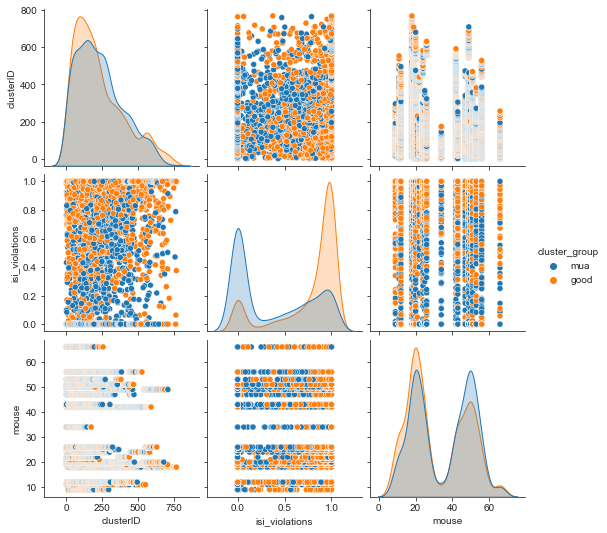

In [286]:
sns.pairplot(df_sq,
             diag_kind='kde',markers='o',hue='cluster_group')

choose metrics that best isolate good and multi-unit cluster groups and use clustering algorithms to evaluate separability 

In [33]:
#metrics = df_sq[['isi_violations',
#                                    'mahalanobis_contamination',
#                                    'FLDA_dprime']].to_numpy()
metrics = df_sq[['isi_violations',
                                    'mahalanobis_contamination'
                                    ]].to_numpy()

metrics = np.nan_to_num(metrics)

Text(0.5, 1.0, 'learning rate: 150   perplexity: 50')

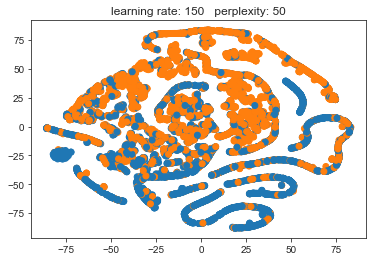

In [34]:
X_tsne = TSNE(learning_rate=80,perplexity=20).fit_transform(metrics)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=np.array(df_sq.color))
plt.gca().set_title('learning rate: '+str(150)+'   perplexity: '+str(50))

Text(0.5, 1.0, 'k=3')

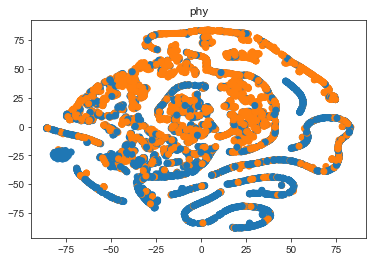

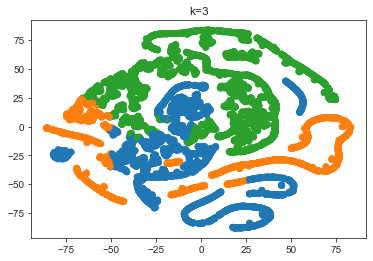

In [35]:
kn=3
km = kmeans2(metrics,
        kn, iter=300, thresh=5e-6,minit='random')
c2 = np.array([sns.color_palette()[k] for k in km[1]])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=np.array(df_sq.color))
plt.gca().set_title('phy')
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=c2)
plt.gca().set_title('k='+str(kn))

Use LDA to assign linear quality utilizing metrics that maximize separability

Text(0.5, 1.0, 'LDA projection of all quality metrics, based on phy labels')

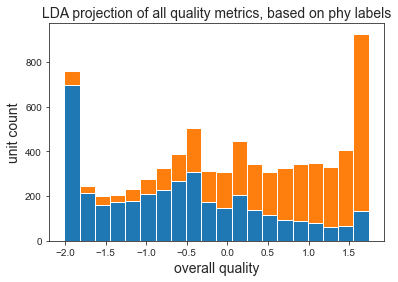

In [36]:
labels = np.zeros(np.shape(df_sq)[0])
labels[np.array(df_sq.cluster_group)=='good']=1
linear_quality = sq.project_linear_quality(metrics,labels)
lda_multi = linear_quality[labels==0]
lda_good = linear_quality[labels==1]
data = [lda_multi.flatten(), lda_good.flatten()]
d=plt.hist(data,bins=20,stacked=True)
plt.xlabel('overall quality',size=14);plt.ylabel('unit count',size=14);plt.title('LDA projection of all quality metrics, based on phy labels',size=14)

Assign numeric linear quality and rank linear quality for each unit

In [37]:
df_sq['linear_quality'] = linear_quality

In [38]:
df_sq = preprocessing.assign_sq_rank(df_sq)

In [40]:
np.shape(df_sq)

(7540, 11)

In [41]:
np.shape(df)

(7539, 18)

In [42]:
df_sq

clusterID  isi_violations  isolation_distance  \
8             11        0.000000            7.345088   
11            17        0.634366            6.739292   
14            21        0.910897            6.328294   
15            22        0.541493            7.871836   
16            23        0.887027            7.802152   
...          ...             ...                 ...   
11866        294        0.853017            4.343057   
11868        296        0.972936            4.521762   
11869        297        0.859742            3.033772   
11870        302        0.766456            3.833435   
11871        303        0.000000            1.320096   

       mahalanobis_contamination  FLDA_dprime cluster_group  \
8                       0.973654    -6.732319           mua   
11                      0.929524    -4.341325           mua   
14                      0.899090    -7.294461          good   
15                      0.979168    -6.372470          good   
16                      0.980564    -5.306345          good   
...                          ...          ...           ...   
11866                   0.575770    -5.340295          good   
11868                   0.519941    -6.097145          good   
11869                   0.106379    -3.300392          good   
11870                   0.346790    -4.141111          good   
11871                   0.000000    -1.444942           mua   

                                                   color  mouse cohort  \
8      (0.12156862745098039, 0.4666666666666667, 0.70...     18   NPCB   
11     (0.12156862745098039, 0.4666666666666667, 0.70...     18   NPCB   
14       (1.0, 0.4980392156862745, 0.054901960784313725)     18   NPCB   
15       (1.0, 0.4980392156862745, 0.054901960784313725)     18   NPCB   
16       (1.0, 0.4980392156862745, 0.054901960784313725)     18   NPCB   
...                                                  ...    ...    ...   
11866    (1.0, 0.4980392156862745, 0.054901960784313725)     71   NPCH   
11868    (1.0, 0.4980392156862745, 0.054901960784313725)     71   NPCH   
11869    (1.0, 0.4980392156862745, 0.054901960784313725)     71   NPCH   
11870    (1.0, 0.4980392156862745, 0.054901960784313725)     71   NPCH   
11871  (0.12156862745098039, 0.4666666666666667, 0.70...     71   NPCH   

       linear_quality  quality_rank  
8           -0.386700             5  
11           0.861617             3  
14           1.387104             2  
15           0.750885             3  
16           1.473253             2  
...               ...           ...  
11866        0.727222             3  
11868        0.883996             3  
11869       -0.041667             5  
11870        0.164923             4  
11871       -2.010669             8  

[7540 rows x 11 columns]

In [43]:
sq_clust = df_sq.clusterID
df_clust = df.cell


In [46]:
all_clust = np.append(sq_clust,df_clust)

In [47]:
np.shape(all_clust)

(15079,)

In [31]:
## or sort by cell and append columns for each mouse
## or just add column before the depth step in which the cells would be in same order
def add_quality(df,df_sq,mouseid):
    quals = []
    print('appending sorting quality for mouse ' +str(mouseid))
    for i in df.cell:
        i = int(i)
        ind = list(df_sq[df_sq.clusterID==i].index)
        qual = list(df_sq.linear_quality[ind])
        quals.append(str(qual))
    df['linear_quality'] = qual
    return df

In [32]:
dfs = [add_quality(df[df.mouse==mouseid],df_sq[df_sq.mouse==mouseid],mouseid) for mouseid in df_sq.mouse.unique()]
df = pd.concat(dfs,ignore_index=True)

appending sorting quality for mouse 18


ValueError: Length of values (1) does not match length of index (445)

# save it!!

In [104]:
save_path = r'C:\Users\16623\Desktop\kim_analysis\kimcode_02.2020\PIPELINE'
df.to_json(os.path.join(save_path,'df_DEPTHCORRECTED_11_11_21.json'))
#df_sq.to_json(os.path.join(save_path,'df_sq_all_mice_09_15_21.json'))


# summary plots - all mice

Just checkin stuff

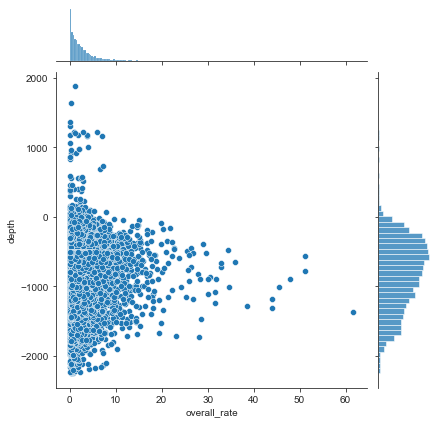

In [49]:
fig = sns.jointplot(x = df.overall_rate,y = df.depth)


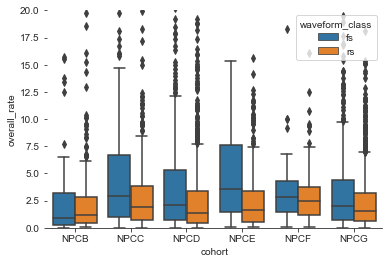

In [396]:
sns.boxplot(x="cohort", y="overall_rate", hue="waveform_class", 
                data=df[df.waveform_class!='axon'][df.waveform_class!='up'])
plt.ylim(0,20)
sns.despine(left=True)

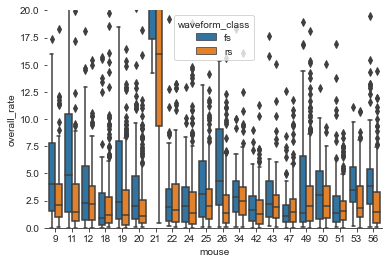

In [397]:
sns.boxplot(x="mouse", y="overall_rate", hue="waveform_class", 
                data=df[df.waveform_class!='axon'][df.waveform_class!='up'])
plt.ylim(0,20)
sns.despine(left=True)

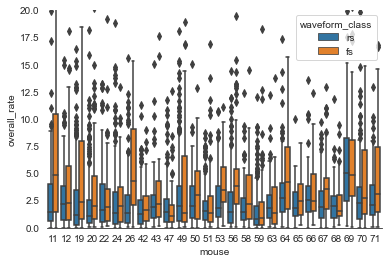

In [16]:
sns.boxplot(x="mouse", y="overall_rate", hue="waveform_class", 
                data=df[df.waveform_class!='axon'][df.waveform_class!='up'])
plt.ylim(0,20)
sns.despine(left=True)

In [ ]:
sns.boxplot(x="cohort", y="linear_quality", hue="waveform_class", 
                data=df[df.waveform_class!='axon'][df.waveform_class!='up'])
plt.ylim(0,20)
sns.despine(left=True)

In [ ]:
sns.displot(data=df, kind="bar", x="quality_rank", col="mouse" kde=True)

# summary plots - individual mice


saving figure in H:\Neuropixels Recordings\Sorted Data\open-ephys-neuropix_NPCB_018\2020-02-14_13-13-13\experiment1\recording1\continuous\Neuropix-PXI-100.0


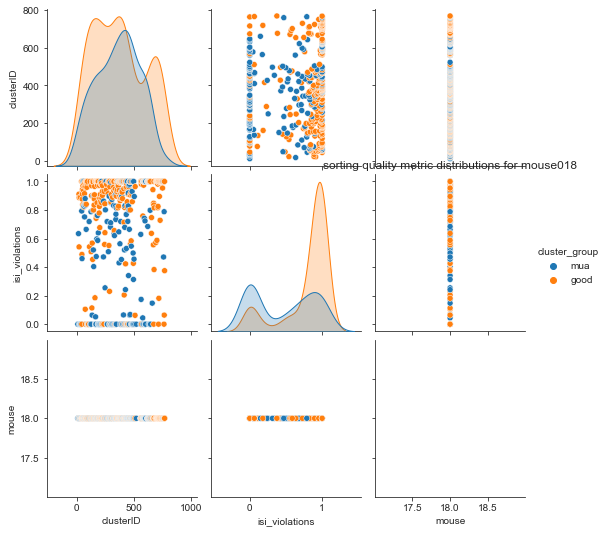

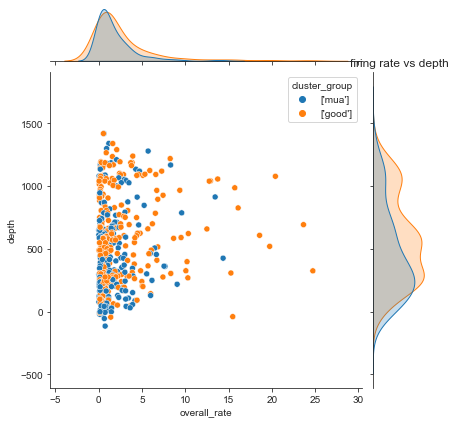

AttributeError: 'DataFrame' object has no attribute 'linear_quality'

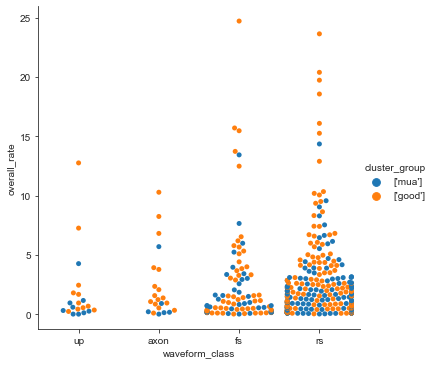

In [386]:
data_path = r'H:\Neuropixels Recordings\Sorted Data'
[utils.save_individual_mouse_pairplot(folder,df,df_sq) for folder in glob.glob(data_path+'/*')]

# Load curated behavior files

In [136]:
behavior_path = r'C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps'
dfs = [preprocessing.load_curated_behavior(folder) for folder in glob.glob(behavior_path+'/*')]
df_reaches = pd.concat(dfs,ignore_index=True)

loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20200226_unit00_session002_NPCC_011.csv
loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20200226_unit00_session003_NPCC_012.csv
loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20200302_unit00_session003_NPCD_022.csv
loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20200303_unit00_session002_NPCD_024.csv
loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20200304_unit00_session001_NPCD_019.csv
loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20200304_unit00_session002_NPCD_020.csv
loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20200804_unit00_session001_NPCE_026.csv
loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20200806_unit00_session001_NPCE_028.csv
loaded C:\Users\16623\Desktop\kim_analysis\Curated Video Timestamps\20201027_unit00_session001_NPCG_042.csv
loaded C:\Users\16623\Deskto

In [137]:
#remove irrelevant behaviors and nans
df_reaches = df_reaches.dropna(axis = 1 , how = 'all')
df_reaches = df_reaches.dropna(axis = 0 , how = 'any')
df_reaches = df_reaches[df_reaches.behaviors!='none'][df_reaches.behaviors!='arm_movement']

In [138]:
df_reaches.mouse.unique()

array([11, 12, 22, 24, 19, 20, 26, 28, 42, 43, 50, 51, 47, 59, 58, 49, 53,
       56, 63, 66, 69, 68, 70, 64, 71, 65, 67], dtype=int64)

In [139]:
save_path = r'C:\Users\16623\Desktop\kim_analysis\kimcode_02.2020\PIPELINE'
df_reaches.to_json(os.path.join(save_path,'df_reaches_all_mice.json'))

In [140]:
timestamp_path = r'C:\Users\16623\Desktop\kim_analysis\Video TTL Files'
ts = [preprocessing.load_timestamps(folder) for folder in glob.glob(timestamp_path+'/*')]
df_timestamps = pd.DataFrame(ts,columns=['mouse','timestamps'])
save_path = r'C:\Users\16623\Desktop\kim_analysis\kimcode_02.2020\PIPELINE'
df_timestamps.to_json(os.path.join(save_path,'df_timestamps.json'))

11
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\11_timestamps.npy
12
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\12_timestamps.npy
18
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\18_timestamps.npy
19
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\19_timestamps.npy
20
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\20_timestamps.npy
21
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\21_timestamps.npy
22
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\22_timestamps.npy
24
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\24_timestamps.npy
25
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\25_timestamps.npy
26
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\26_timestamps.npy
28
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\28_timestamps.npy
34
loadedC:\Users\16623\Desktop\kim_analysis\Video TTL Files\34_timestamps.npy
42
loadedC:\Users\16623\Desktop\kim_analysis\Video T